In [1]:
import time
import re
import pylab as pl
import numpy as np
import pylab as pl

from datetime import datetime, timedelta

import subprocess

import os
import pandas as pd

import concurrent.futures

import matplotlib.ticker as mticker

from joblib import Parallel, delayed
import shutil
import math


from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

In [2]:
SMALL_SIZE = 27
MEDIUM_SIZE = 45
BIGGER_SIZE = 22

pl.rc('font', size=BIGGER_SIZE)          # controls default text sizes
pl.rc('axes', titlesize=45)     # fontsize of the axes title
pl.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
pl.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
pl.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
pl.rc('legend', fontsize=45)    # legend fontsize
pl.rc('figure', titlesize=BIGGER_SIZE) 



formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 2)) 
formatter.set_useOffset(False)

In [3]:
import os

folder_path = "../../../Experiments/O2PRBC_b100_8node/dump_files/"  # Change this to your folder path
keywords = ["got", "send new cmd"]

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Check if it's a file
    if os.path.isfile(file_path):
        with open(file_path, "r") as file:
            lines = file.readlines()

        # Filter out lines containing keywords
        filtered_lines = [line for line in lines if not any(keyword in line for keyword in keywords)]

        # Overwrite the file with filtered content
        with open(file_path, "w") as file:
            file.writelines(filtered_lines)

print("Lines removed successfully!")

Lines removed successfully!


In [4]:

def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)
def getThroughput(experiment):
    
    temp_lines = []

    result = subprocess.check_output('cat ../'+experiment+'/dump_files/nohup_client_*', shell=True)


    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
#     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:
                temp_lines.append(line)
                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
                Times.append(time_item)        

                lats.append(float(m.group(2)))
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    
    # Get sorted indices
    sorted_indices = np.argsort(Times)

    # Apply sorting to both arrays
    
    
    Times = np.array(Times)[sorted_indices.astype(np.int)]
    lats_sorted = np.array(lats)[sorted_indices.astype(np.int)]
    
    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)

#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats_sorted, temp_lines, Times


In [5]:
# X

../../Experiments/O2PRBC_lc


/tmp/ipykernel_93599/2425067424.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Times = np.array(Times)[sorted_indices.astype(np.int)]
/tmp/ipykernel_93599/2425067424.py:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Dep

8319.4
folder is  O2PRBC_lc


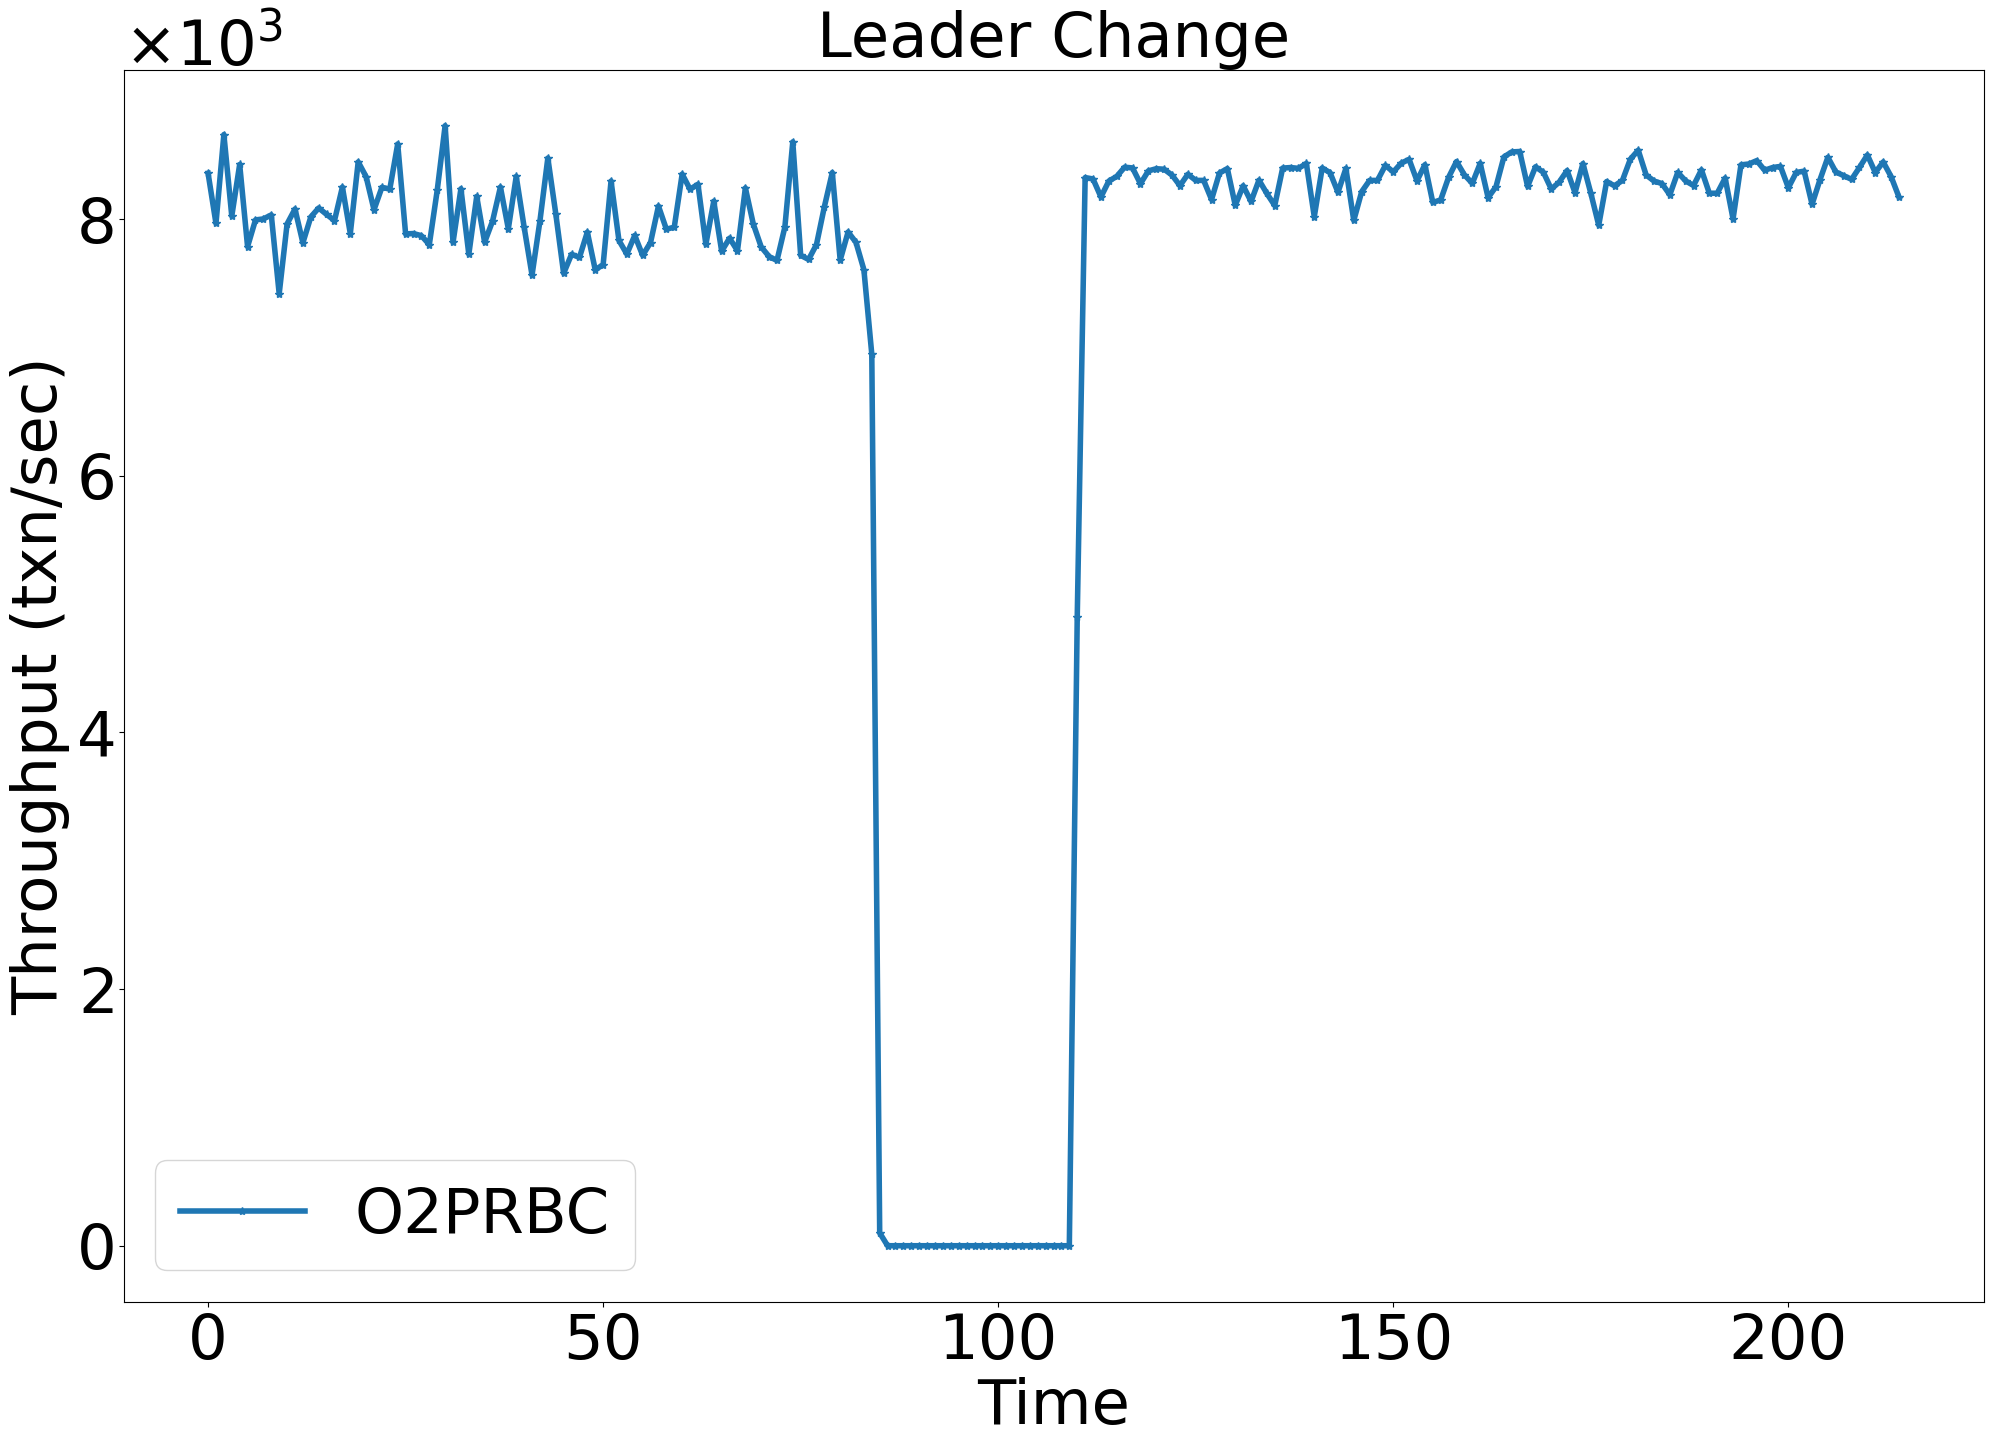

<Figure size 640x480 with 0 Axes>

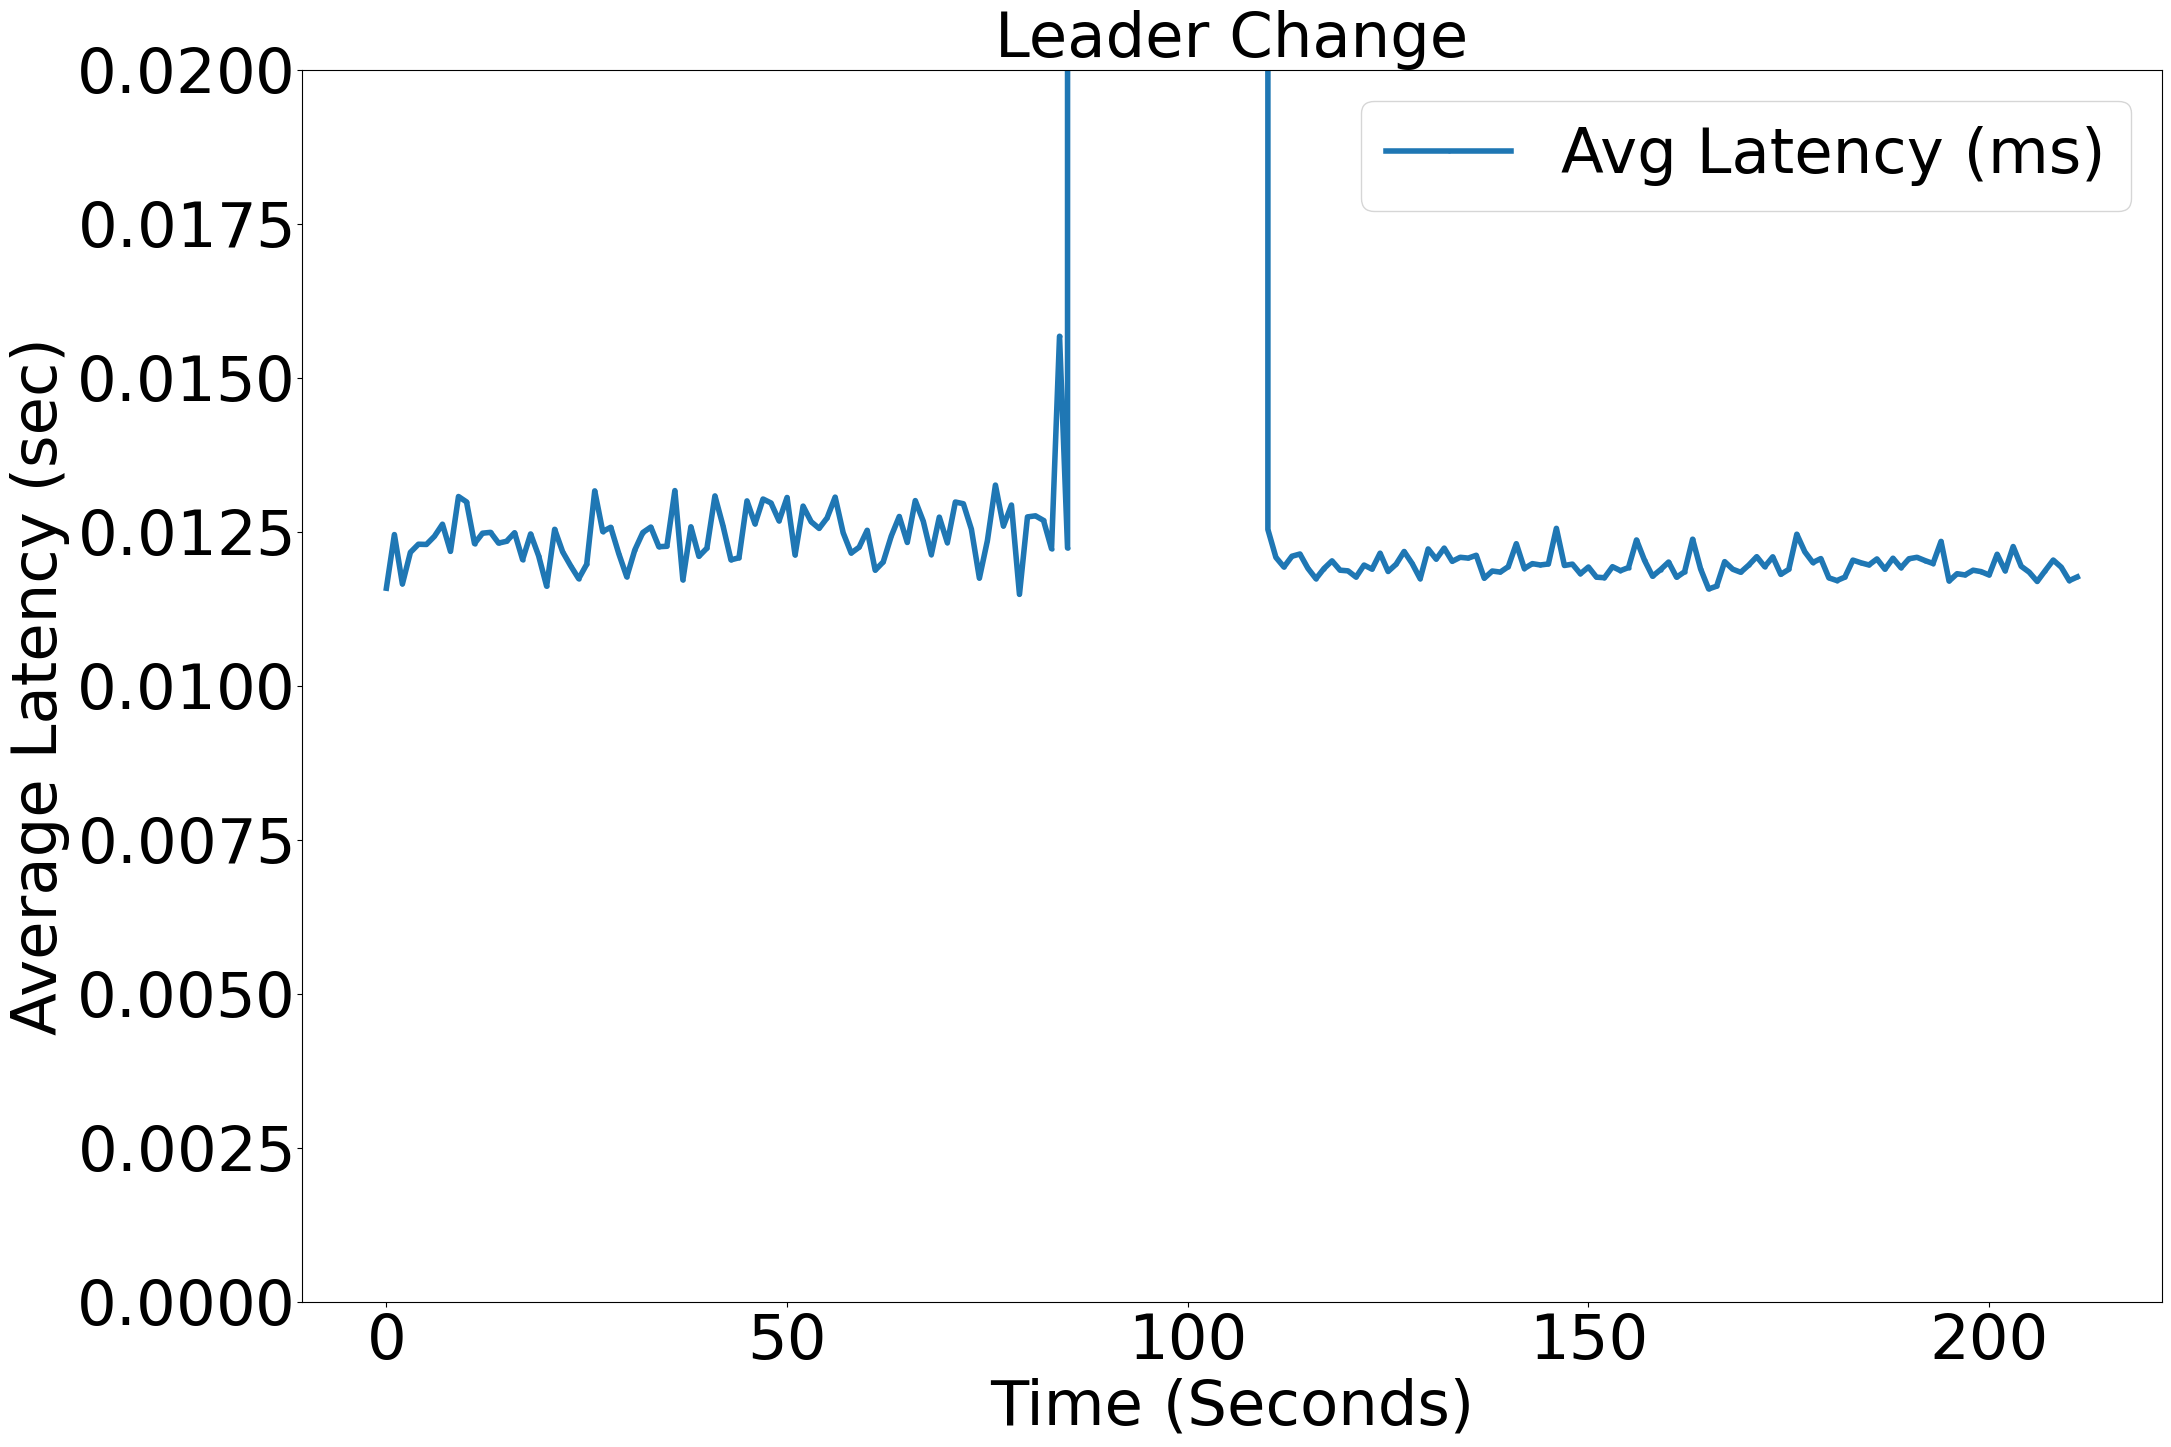

In [5]:
for folder in os.listdir('../../../Experiments/'):
    if   folder == 'O2PRBC_lc':
        
        
        
        experiment = '../../Experiments/' + folder 
        print(experiment)
        X,Y, lats, temp, Times = getThroughput(experiment)



#         cluster_number = 

        # Y = Y * cluster_number

        lats

        np.sum(Y)

        s1, s2 = X[:-2],Y[:-2]

        print(np.average(s2[-30:-5]))
        np.average(lats[-33:-3])

        len(lats)

        2*18923.433333333334


        experiment = folder
        print('folder is ', folder)

        if not os.path.exists('../../../Experiments/'+experiment):
            os.mkdir('../../../Experiments/'+experiment)


        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        fig.patch.set_facecolor('white')
        pl.plot(s1,s2, '-*', label = 'O2PRBC', linewidth = 4)
        ax.yaxis.set_major_formatter(formatter)

        pl.legend()
        pl.xlabel('Time')
        pl.ylabel('Throughput (txn/sec)')
        pl.title('Leader Change')
        pl.savefig('/home/tejas/Desktop/O2PRBC/lcthputs.png', dpi = 150, bbox_inches='tight' )

#         pl.ylim(7000,12000)
#         pl.savefig('../../../Experiments/hs_'+experiment+ '/thput.png', dpi =150, bbox_inches = 0 )
        pl.show()
        pl.clf()


        int_times = Times.astype(int)

        # Find the range of seconds
        min_time, max_time = int_times.min(), int_times.max()
        num_seconds = max_time - min_time + 1

        # Compute sum of latencies per second
        latency_sums = np.bincount(int_times - min_time, weights=lats, minlength=num_seconds)

        # Compute count per second
        counts = np.bincount(int_times - min_time, minlength=num_seconds)

        # Avoid division by zero and compute average latency per second
        avg_latency_per_sec = np.divide(latency_sums, counts, where=(counts > 0))

        # Generate second timestamps
        seconds = np.arange(min_time, max_time + 1)
        seconds = seconds - seconds[0]
        # Plot the results
        
        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        pl.plot(seconds[:-5], avg_latency_per_sec[:-5], marker='o', linestyle='-', markersize=2, \
                label="Avg Latency (ms)", linewidth = 4)
        
        ax.yaxis.set_major_formatter(formatter)

        pl.xlabel("Time (Seconds)")
        pl.ylabel("Average Latency (sec)")
        pl.ylim(0.,0.02)
        pl.title('Leader Change')
        pl.legend()
        pl.savefig('/home/tejas/Desktop/O2PRBC/lclats.png', dpi = 150, bbox_inches='tight' )

        # pl.grid()
        pl.show()

../../Experiments/O2PRBC_normaltxns


/tmp/ipykernel_5185/2425067424.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Times = np.array(Times)[sorted_indices.astype(np.int)]
/tmp/ipykernel_5185/2425067424.py:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depre

8633.28
folder is  O2PRBC_normaltxns


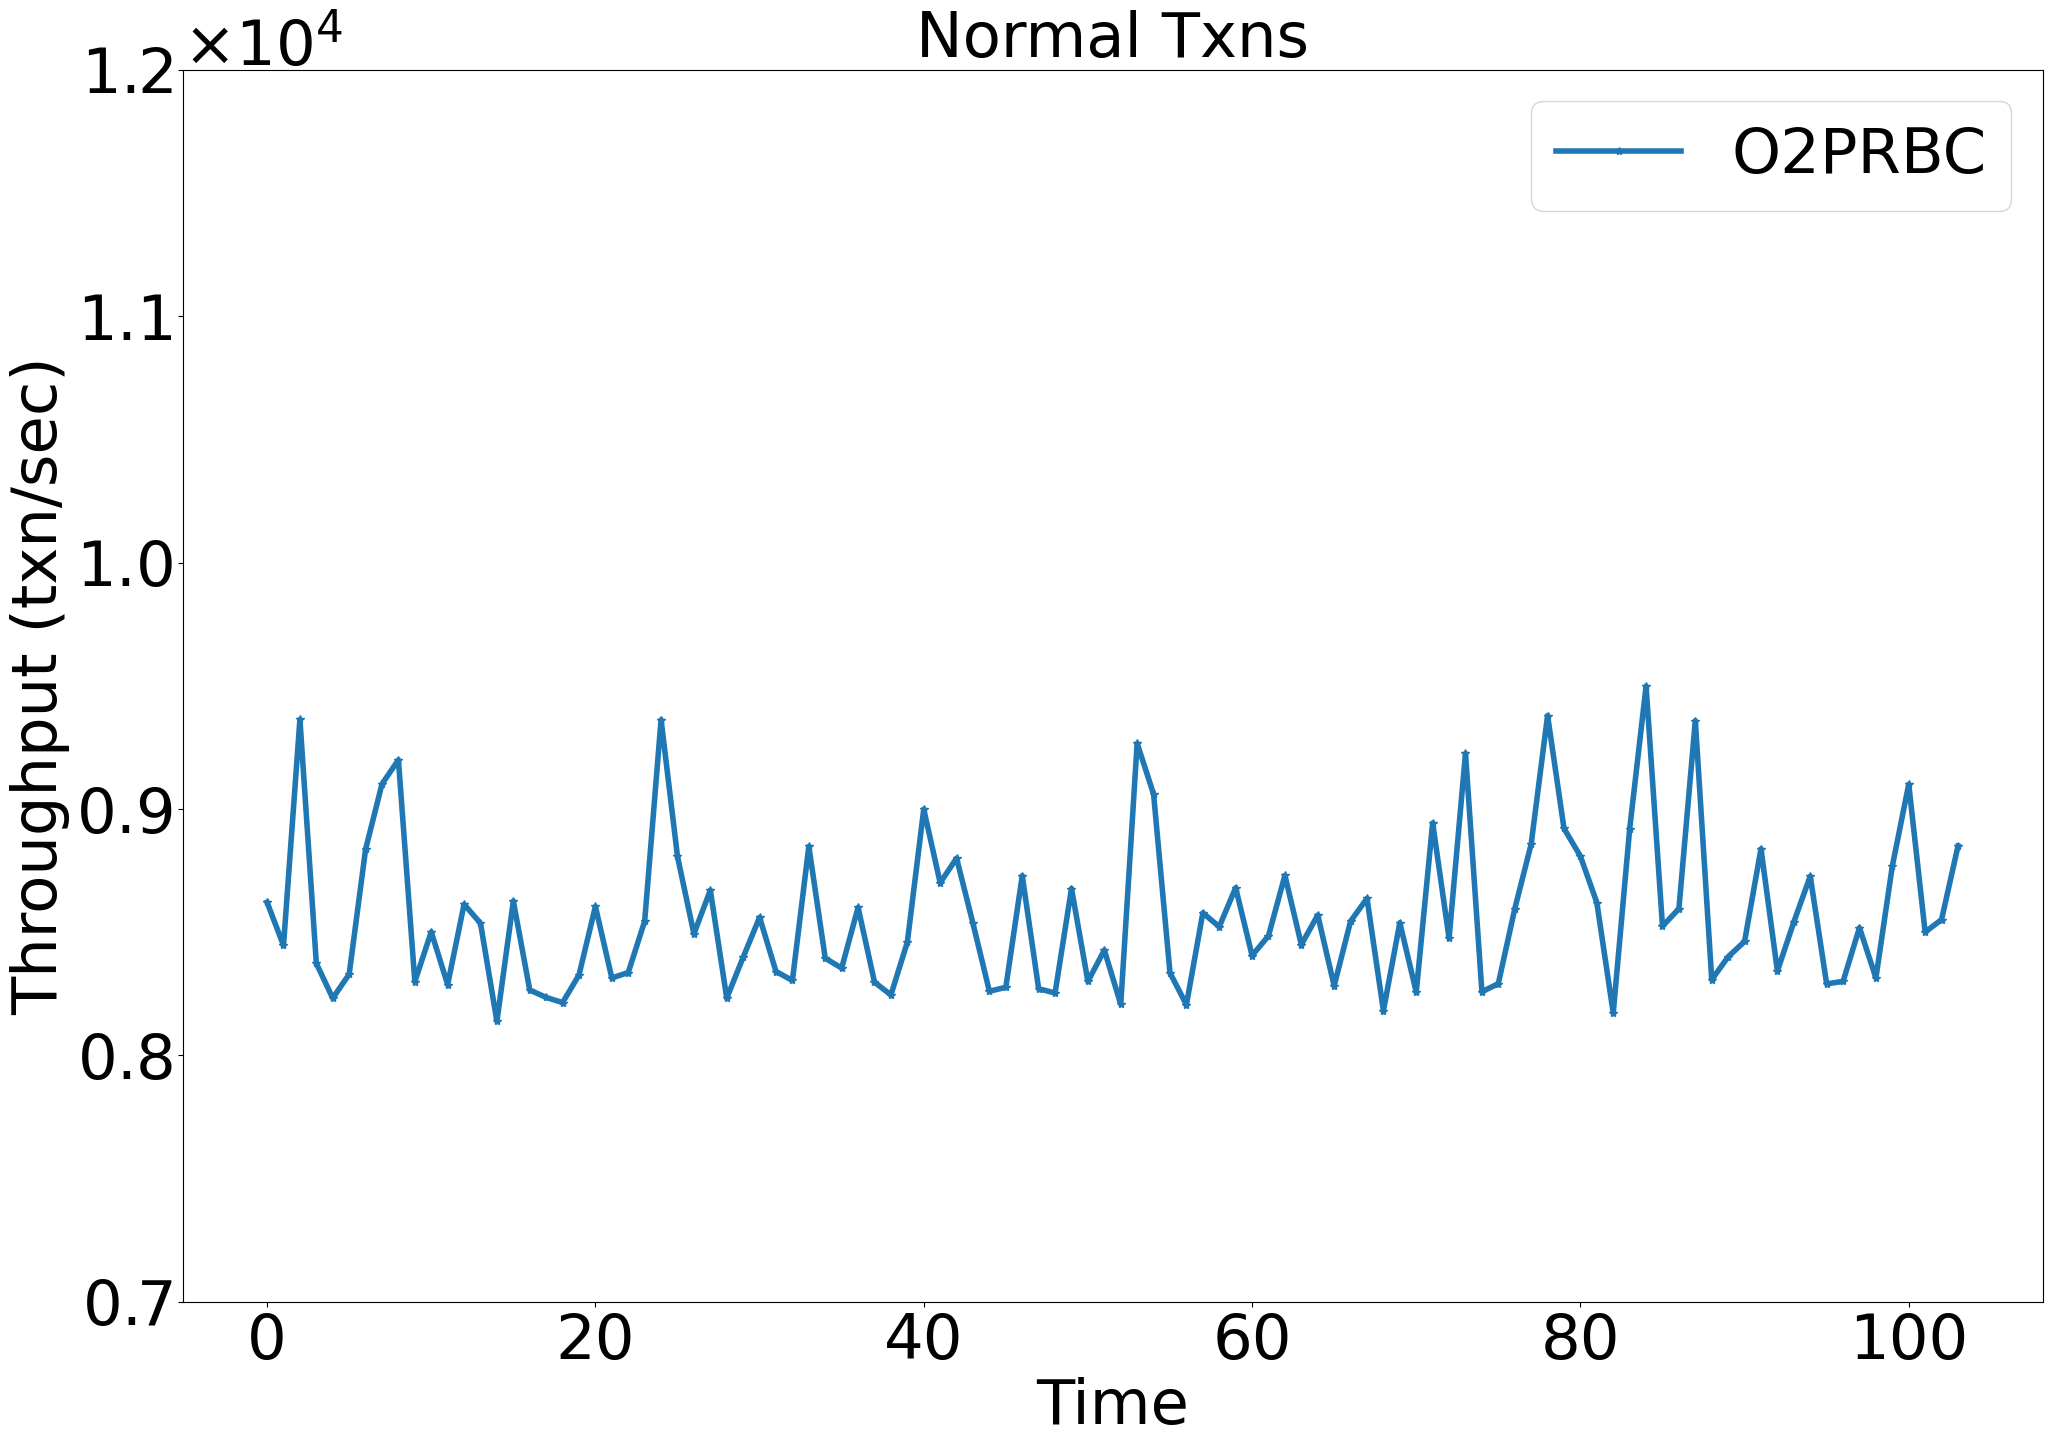

<Figure size 640x480 with 0 Axes>

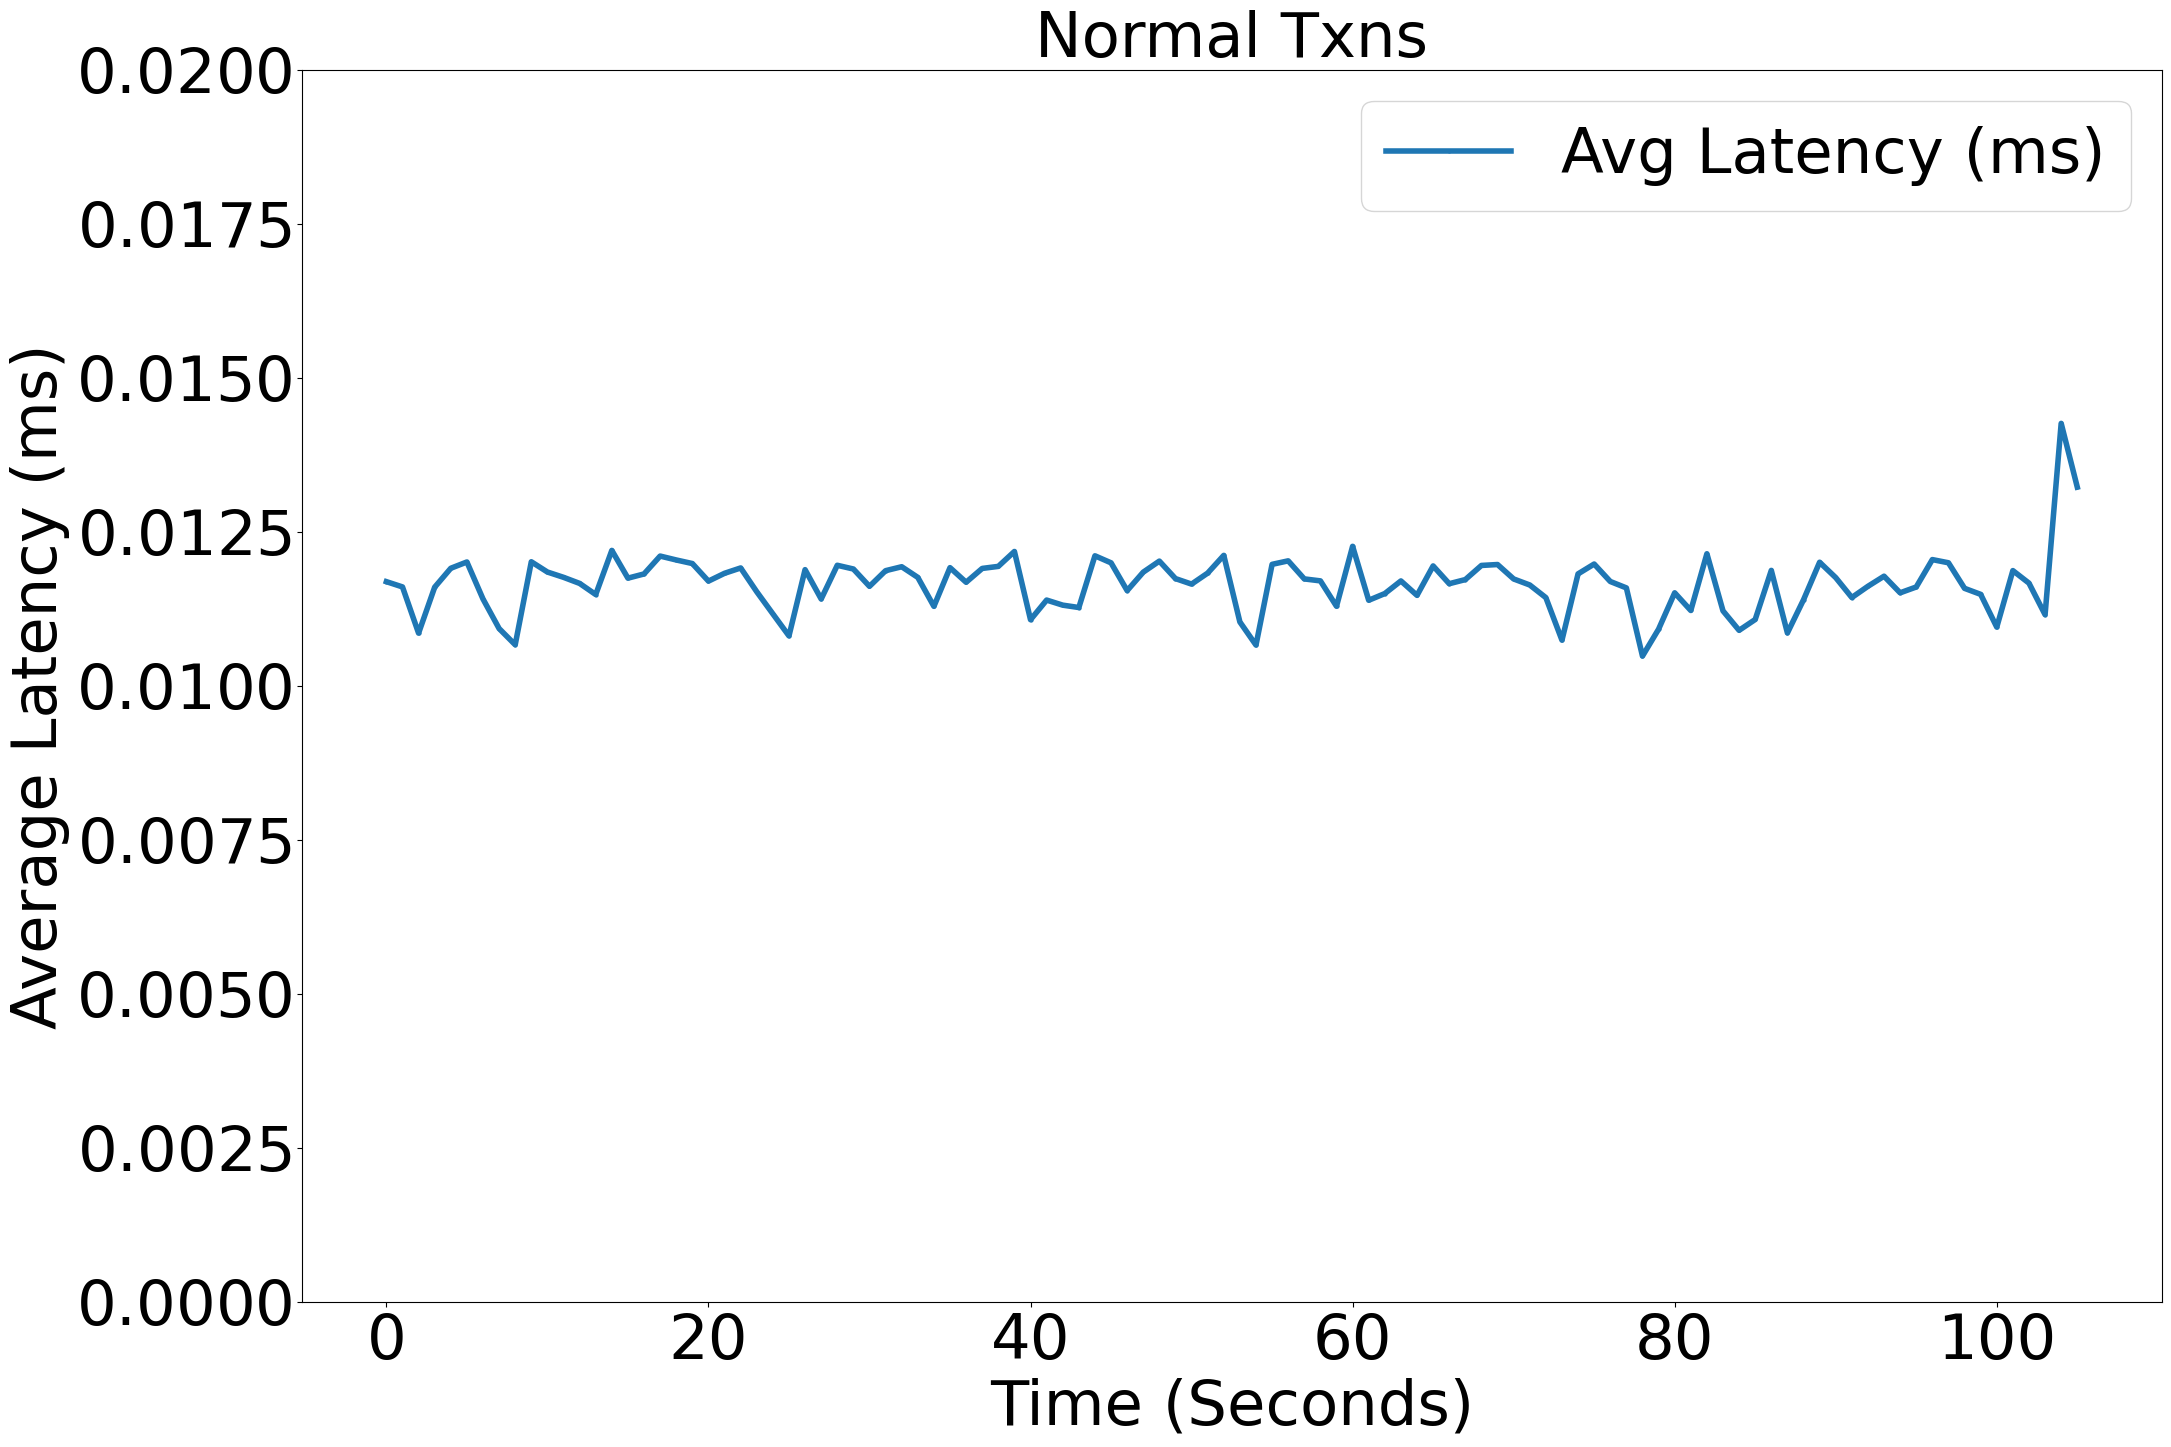

In [9]:
# for folder in os.listdir('../../../Experiments/'):
#     if   folder == 'O2PRBC_normaltxns':
        
        
        
#         experiment = '../../Experiments/' + folder 
#         print(experiment)
#         X,Y, lats, temp, Times = getThroughput(experiment)



# #         cluster_number = 

#         # Y = Y * cluster_number

#         lats

#         np.sum(Y)

#         s1, s2 = X[:-2],Y[:-2]

#         print(np.average(s2[-30:-5]))
#         np.average(lats[-33:-3])

#         len(lats)

#         2*18923.433333333334


#         experiment = folder
#         print('folder is ', folder)

#         if not os.path.exists('../../../Experiments/'+experiment):
#             os.mkdir('../../../Experiments/'+experiment)


#         fig,ax = pl.subplots(figsize = (24, 16))
#         fig.patch.set_facecolor('white')
#         fig.patch.set_facecolor('white')
#         pl.plot(s1,s2, '-*', label = 'O2PRBC', linewidth = 4)
#         ax.yaxis.set_major_formatter(formatter)

#         pl.legend()
#         pl.xlabel('Time')
#         pl.ylabel('Throughput (txn/sec)')
#         pl.title('Normal Txns')

#         pl.ylim(7000,12000)
#         pl.savefig('/home/tejas/Desktop/O2PRBC/nthputs.png', dpi = 150, bbox_inches='tight' )
#         pl.show()
#         pl.clf()


#         int_times = Times.astype(int)

#         # Find the range of seconds
#         min_time, max_time = int_times.min(), int_times.max()
#         num_seconds = max_time - min_time + 1

#         # Compute sum of latencies per second
#         latency_sums = np.bincount(int_times - min_time, weights=lats, minlength=num_seconds)

#         # Compute count per second
#         counts = np.bincount(int_times - min_time, minlength=num_seconds)

#         # Avoid division by zero and compute average latency per second
#         avg_latency_per_sec = np.divide(latency_sums, counts, where=(counts > 0))

#         # Generate second timestamps
#         seconds = np.arange(min_time, max_time + 1)
#         seconds = seconds - seconds[0]
#         # Plot the results
#         fig,ax = pl.subplots(figsize = (24, 16))
#         fig.patch.set_facecolor('white')
#         pl.plot(seconds, avg_latency_per_sec, marker='o', linestyle='-', markersize=2, \
#                 label="Avg Latency (ms)", linewidth = 4)
        
#         ax.yaxis.set_major_formatter(formatter)

#         pl.xlabel("Time (Seconds)")
#         pl.ylabel("Average Latency (ms)")
#         pl.ylim(0,0.02)
#         pl.title('Normal Txns')
#         pl.legend()
#         pl.savefig('/home/tejas/Desktop/O2PRBC/nlats.png', dpi = 150, bbox_inches='tight' )

#         pl.show()

../../Experiments/O2PRBC_test


/tmp/ipykernel_80866/2425067424.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Times = np.array(Times)[sorted_indices.astype(np.int)]
/tmp/ipykernel_80866/2425067424.py:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Dep

10098.6
folder is  O2PRBC_test


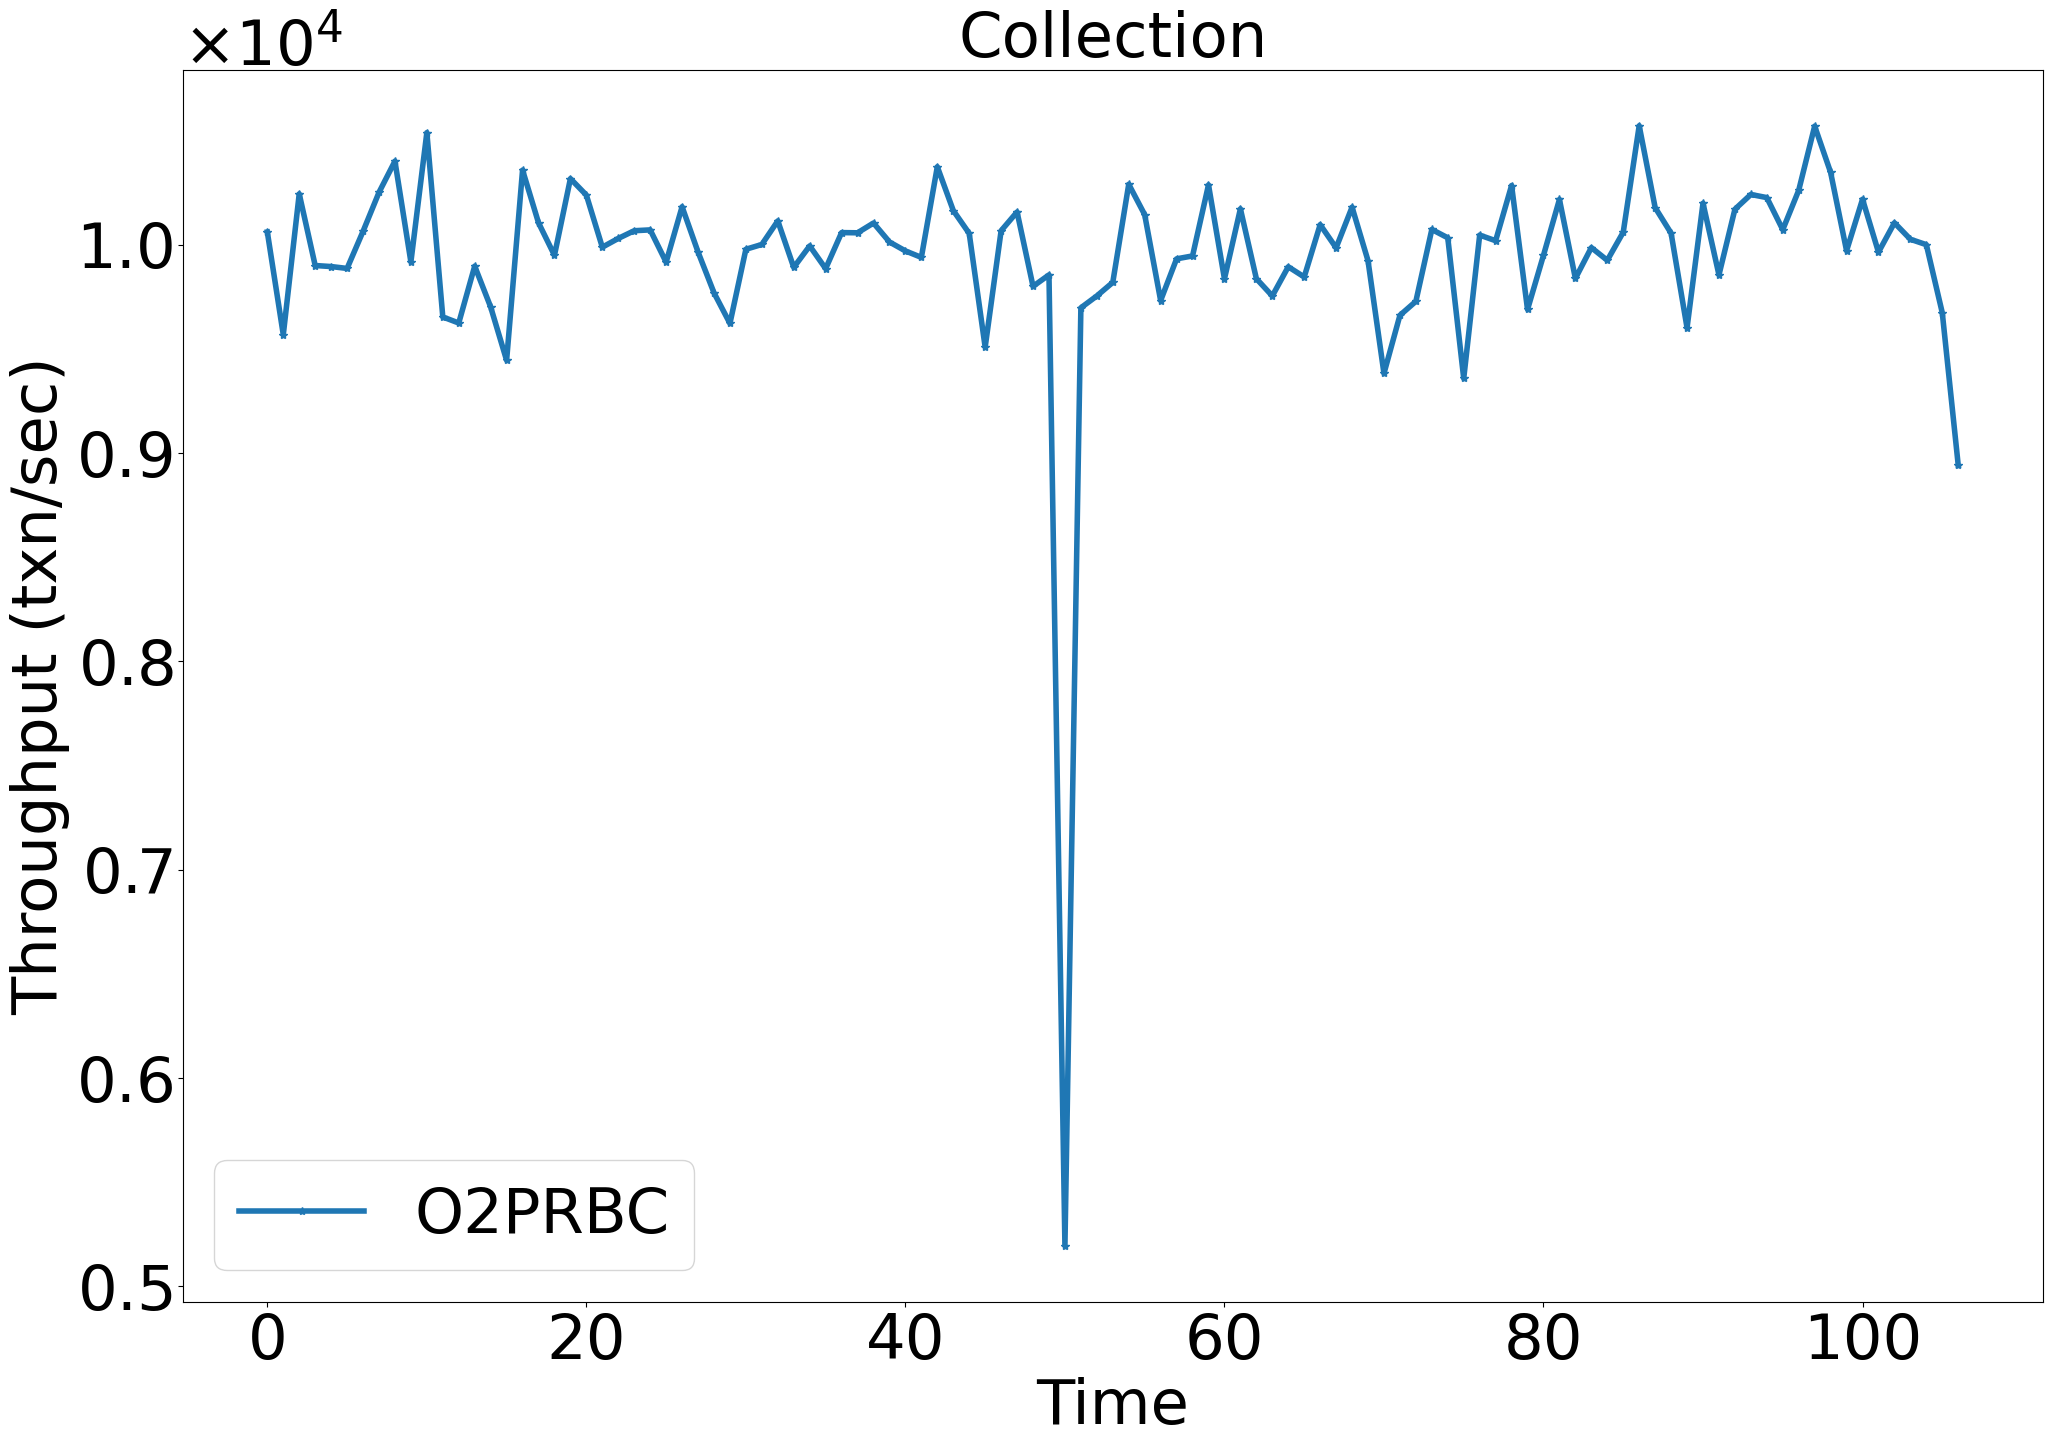

<Figure size 640x480 with 0 Axes>

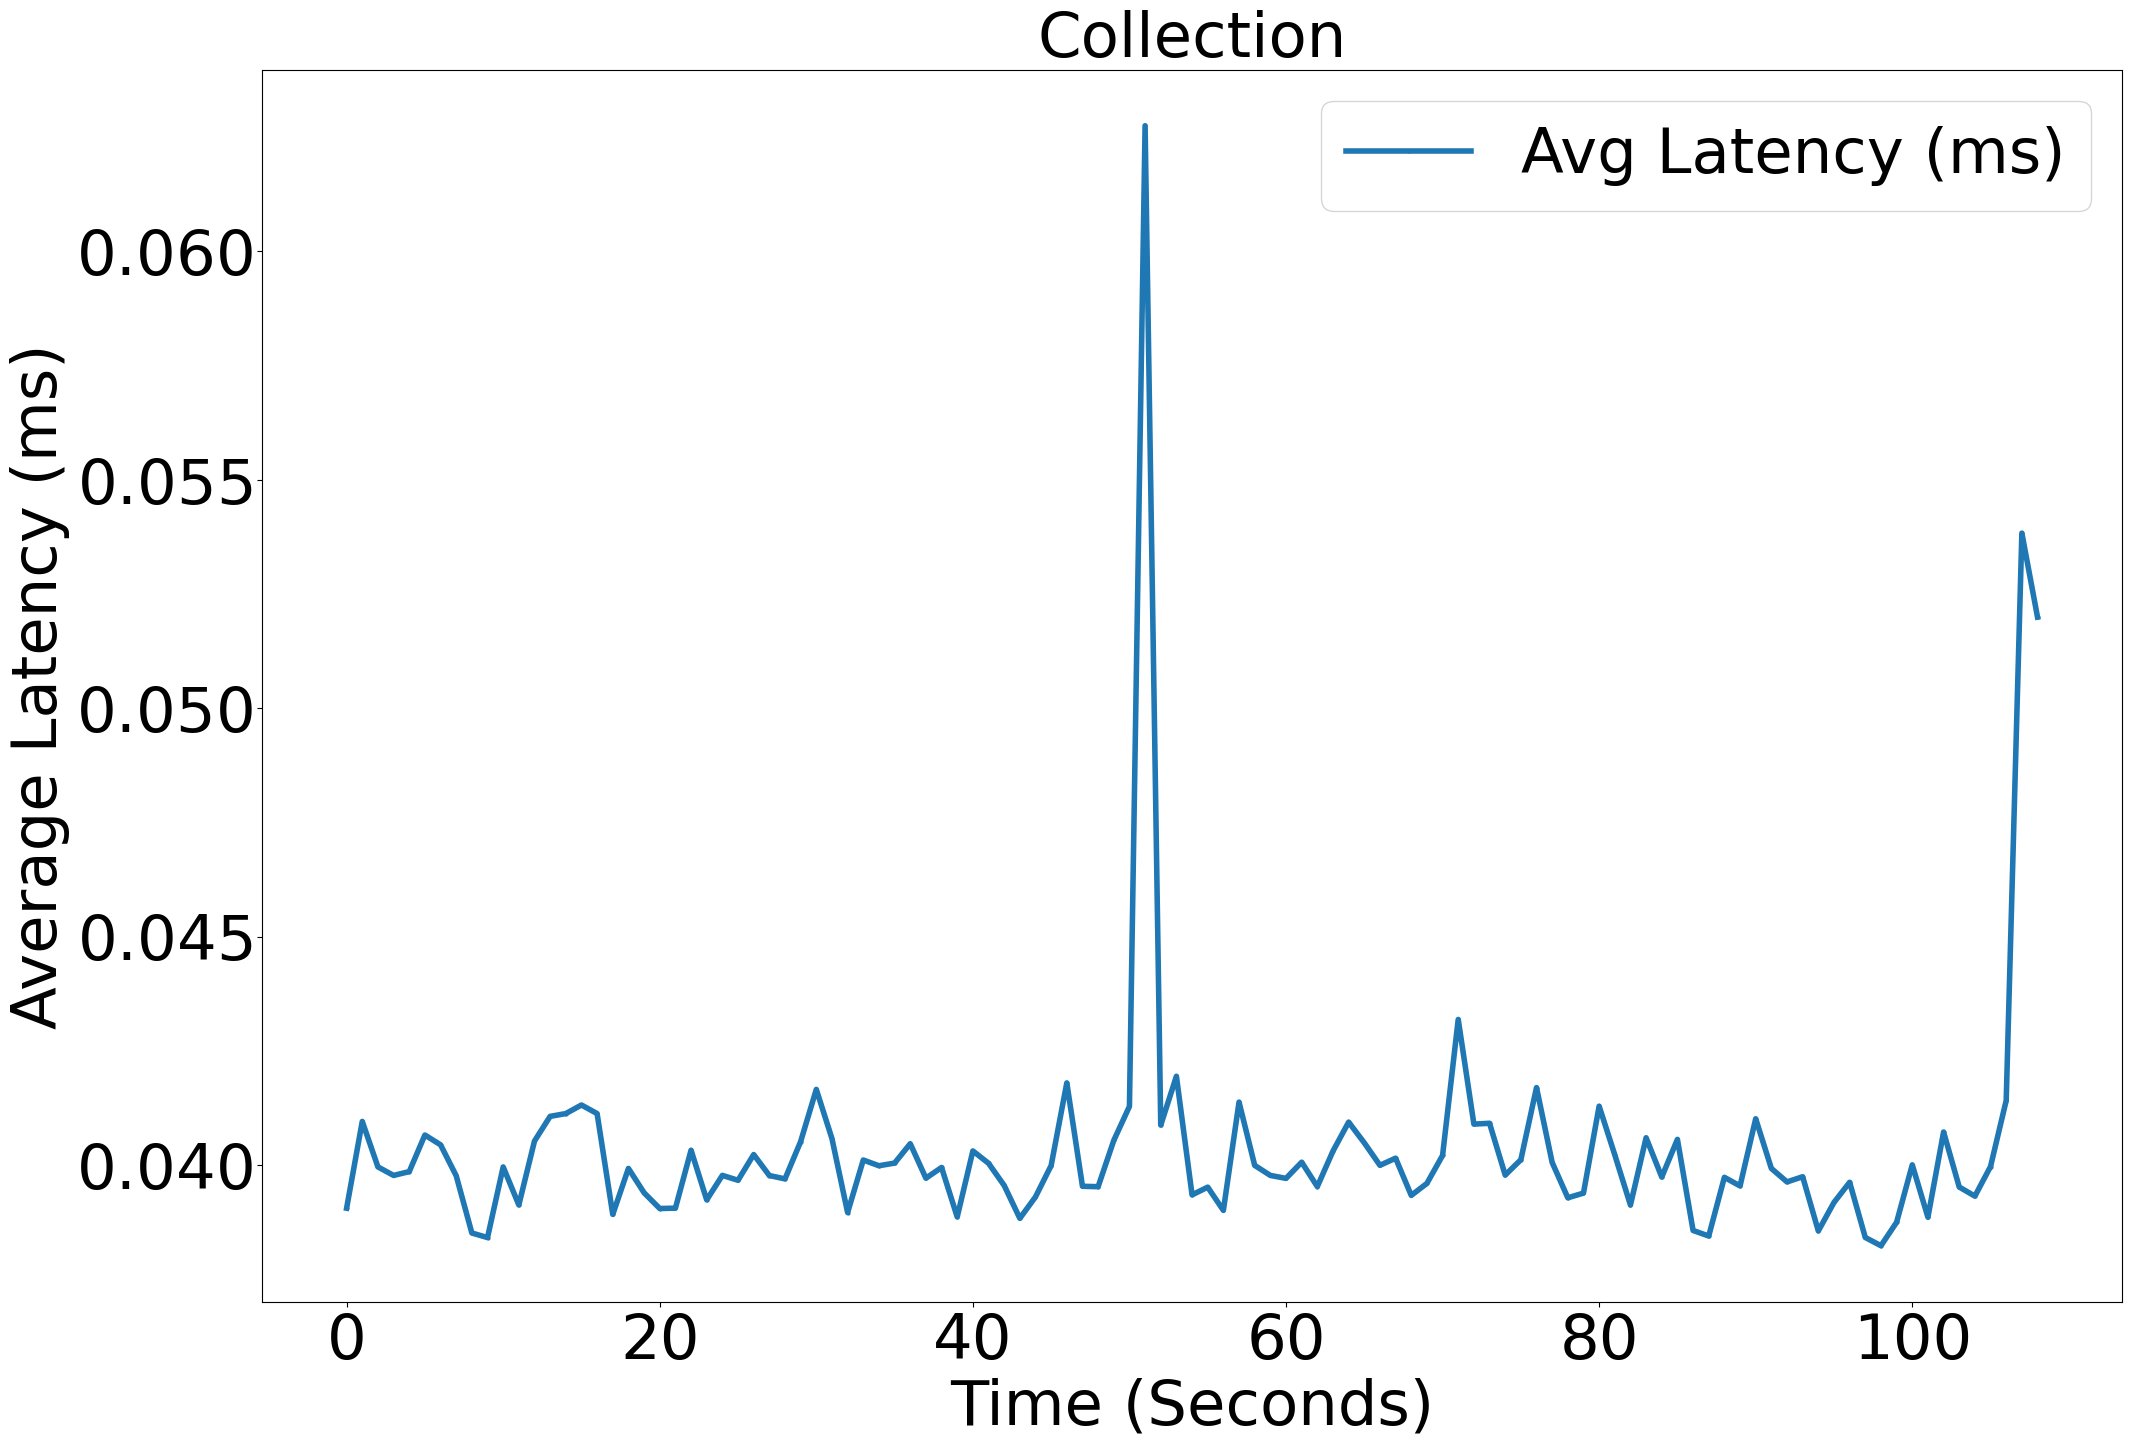

In [12]:
for folder in os.listdir('../../../Experiments/'):
    if   folder == 'O2PRBC_test':
        
        
        
        experiment = '../../Experiments/' + folder 
        print(experiment)
        X,Y, lats, temp, Times = getThroughput(experiment)



#         cluster_number = 

        # Y = Y * cluster_number

        lats

        np.sum(Y)

        s1, s2 = X[:-2],Y[:-2]

        print(np.average(s2[-30:-5]))
        np.average(lats[-33:-3])

        len(lats)

        2*18923.433333333334


        experiment = folder
        print('folder is ', folder)

        if not os.path.exists('../../../Experiments/'+experiment):
            os.mkdir('../../../Experiments/'+experiment)


        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        fig.patch.set_facecolor('white')
        pl.plot(s1,s2, '-*', label = 'O2PRBC', linewidth = 4)
        ax.yaxis.set_major_formatter(formatter)

        pl.legend()
        pl.xlabel('Time')
        pl.ylabel('Throughput (txn/sec)')
        pl.title('Collection')

#         pl.ylim(8000,14000)
        pl.savefig('/home/tejas/Desktop/O2PRBC/collectthputsV2.png', dpi = 150, bbox_inches='tight' )
        pl.show()
        pl.clf()


        int_times = Times.astype(int)

        # Find the range of seconds
        min_time, max_time = int_times.min(), int_times.max()
        num_seconds = max_time - min_time + 1

        # Compute sum of latencies per second
        latency_sums = np.bincount(int_times - min_time, weights=lats, minlength=num_seconds)

        # Compute count per second
        counts = np.bincount(int_times - min_time, minlength=num_seconds)

        # Avoid division by zero and compute average latency per second
        avg_latency_per_sec = np.divide(latency_sums, counts, where=(counts > 0))

        # Generate second timestamps
        seconds = np.arange(min_time, max_time + 1)
        seconds = seconds - seconds[0]
        # Plot the results
        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        pl.plot(seconds, avg_latency_per_sec, marker='o', linestyle='-', markersize=2, \
                label="Avg Latency (ms)", linewidth = 4)
        
        ax.yaxis.set_major_formatter(formatter)

        pl.xlabel("Time (Seconds)")
        pl.ylabel("Average Latency (ms)")
#         pl.ylim(0,0.02)
        pl.title('Collection')
        pl.legend()
#         pl.savefig('/home/tejas/Desktop/O2PRBC/collectlatsV2.png', dpi = 150, bbox_inches='tight' )

        pl.show()

../../Experiments/O2PRBC_test


/tmp/ipykernel_80866/2425067424.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Times = np.array(Times)[sorted_indices.astype(np.int)]
/tmp/ipykernel_80866/2425067424.py:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Dep

9932.4
folder is  O2PRBC_test


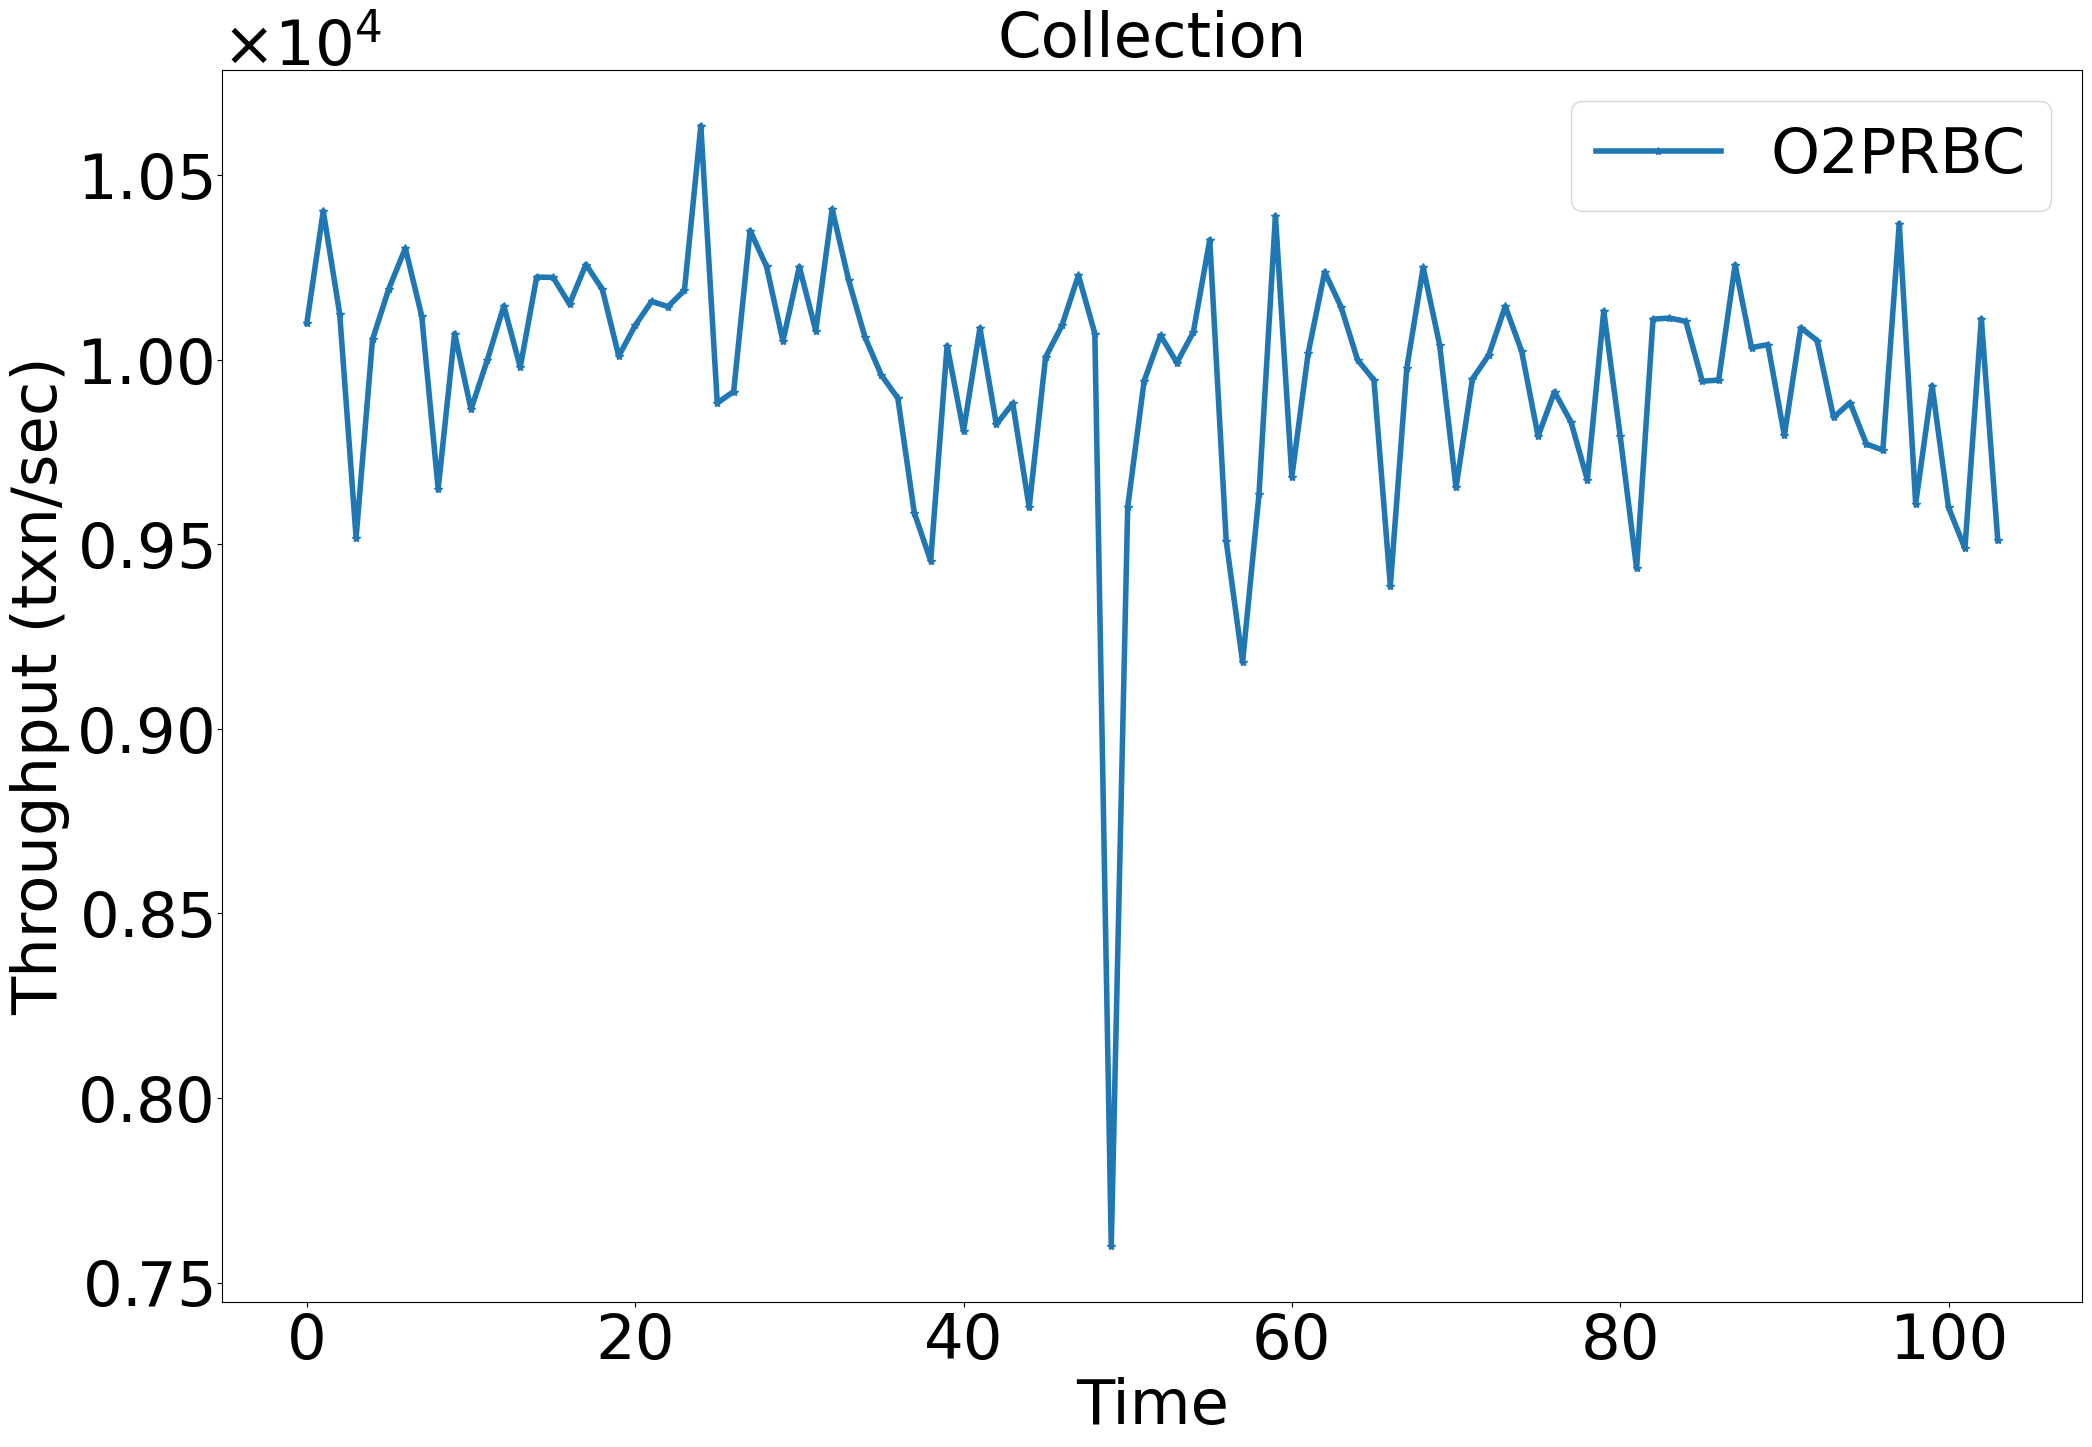

<Figure size 640x480 with 0 Axes>

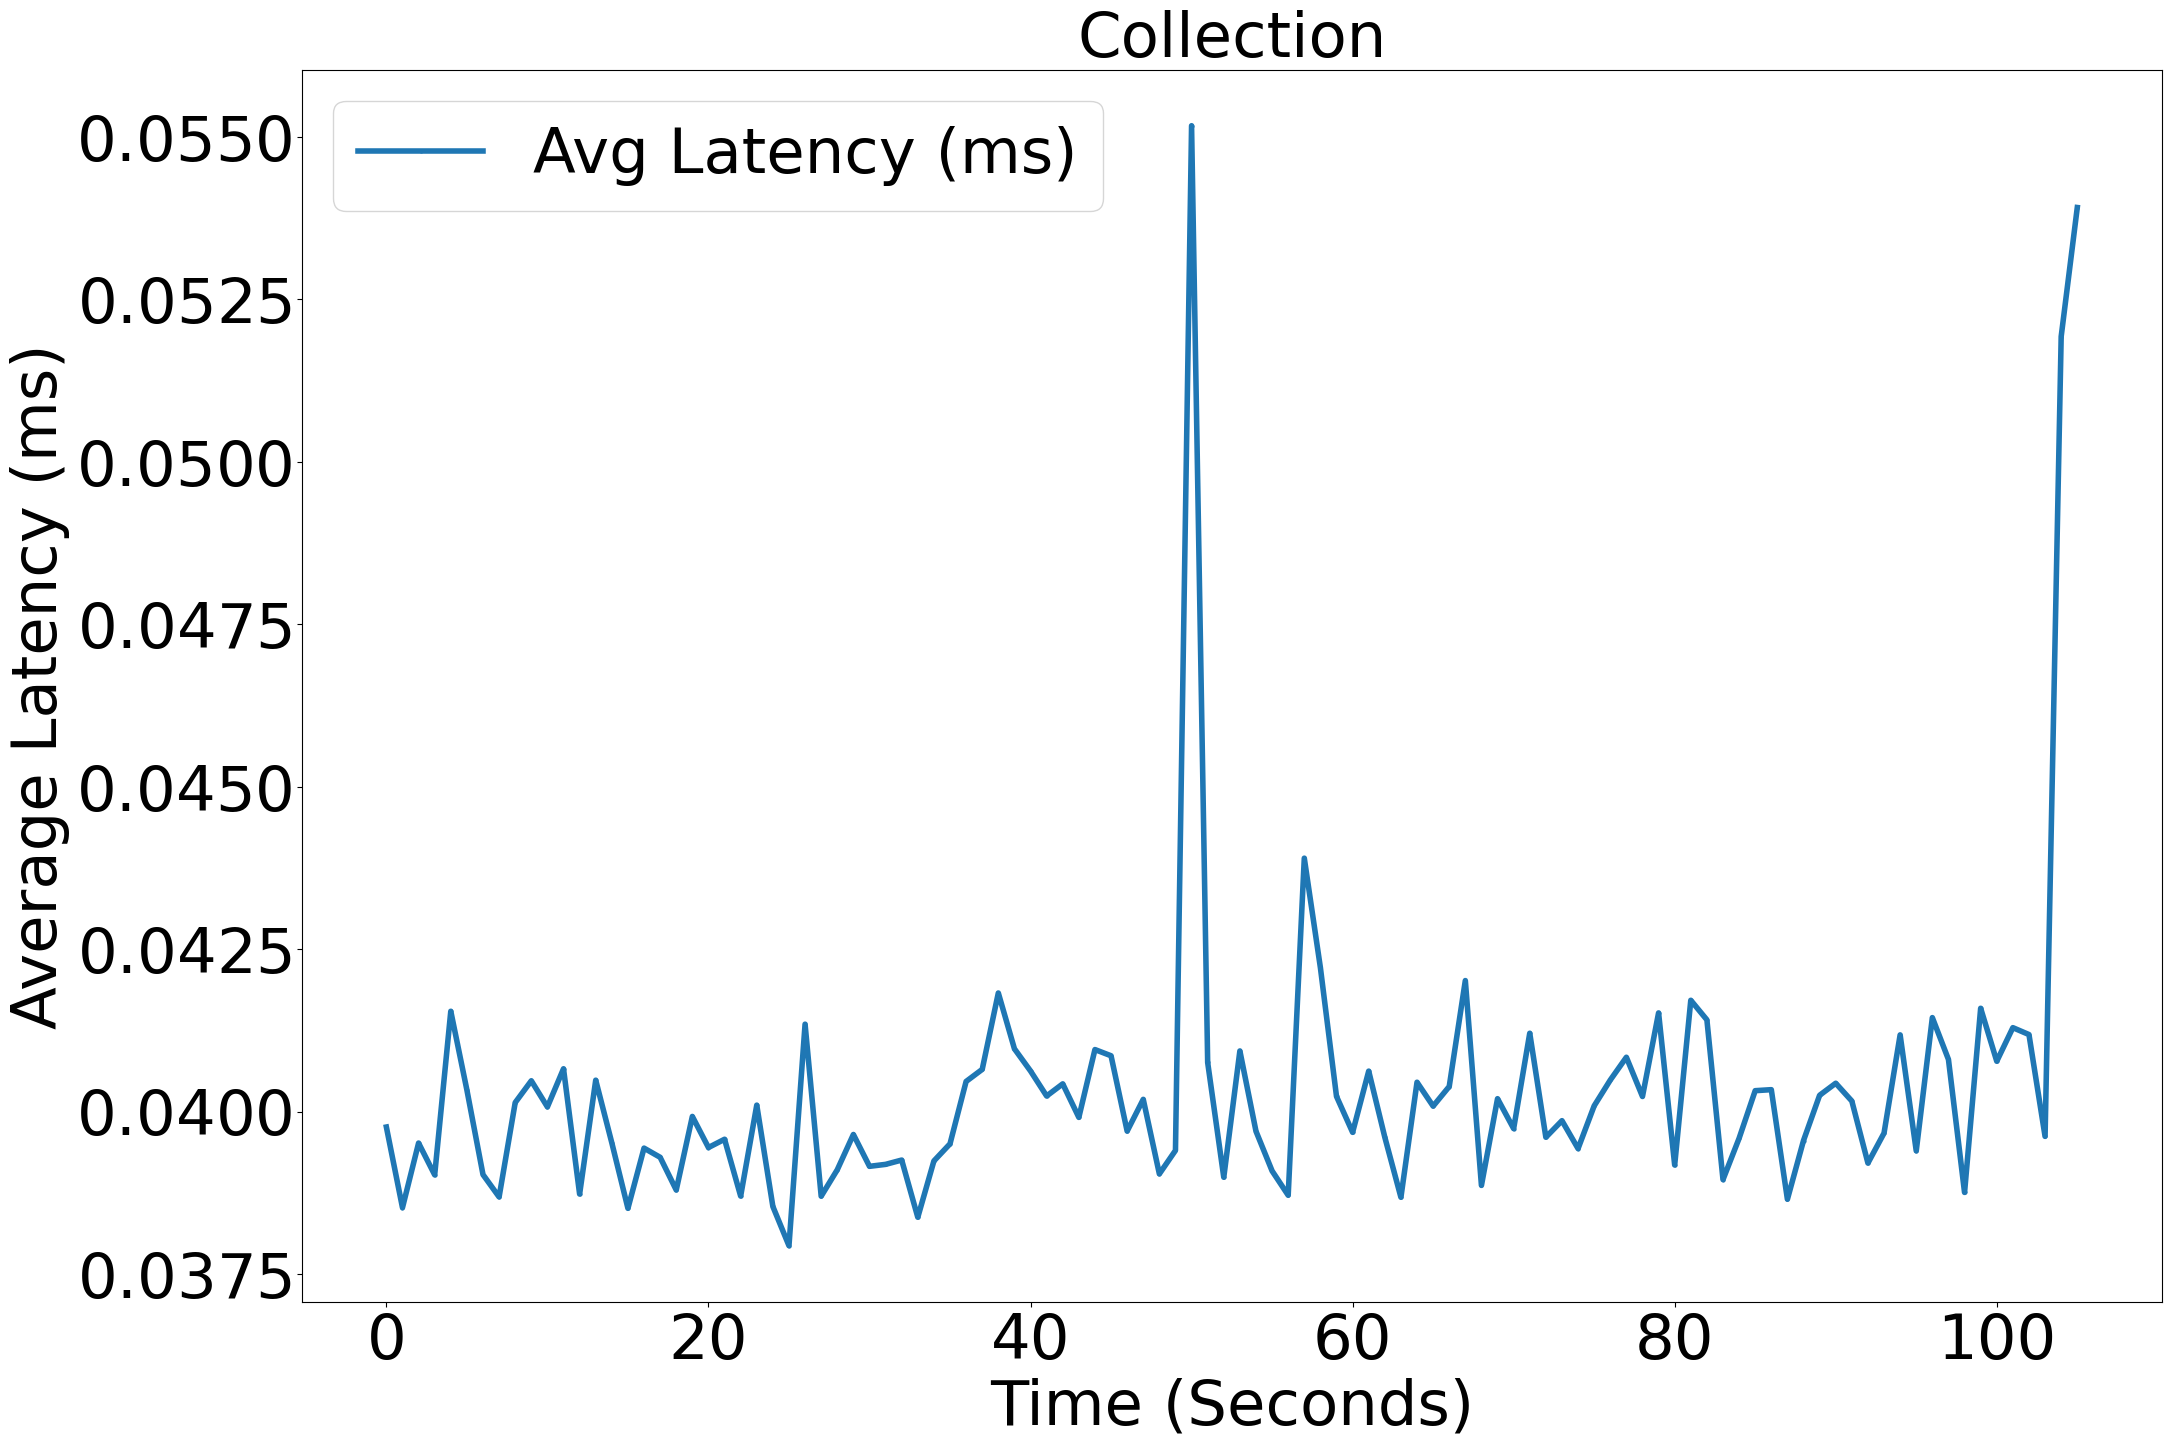

In [13]:
for folder in os.listdir('../../../Experiments/'):
    if   folder == 'O2PRBC_test':
        
        
        
        experiment = '../../Experiments/' + folder 
        print(experiment)
        X,Y, lats, temp, Times = getThroughput(experiment)



#         cluster_number = 

        # Y = Y * cluster_number

        lats

        np.sum(Y)

        s1, s2 = X[:-2],Y[:-2]

        print(np.average(s2[-30:-5]))
        np.average(lats[-33:-3])

        len(lats)

        2*18923.433333333334


        experiment = folder
        print('folder is ', folder)

        if not os.path.exists('../../../Experiments/'+experiment):
            os.mkdir('../../../Experiments/'+experiment)


        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        fig.patch.set_facecolor('white')
        pl.plot(s1,s2, '-*', label = 'O2PRBC', linewidth = 4)
        ax.yaxis.set_major_formatter(formatter)

        pl.legend()
        pl.xlabel('Time')
        pl.ylabel('Throughput (txn/sec)')
        pl.title('Collection')

#         pl.ylim(8000,14000)
        pl.savefig('/home/tejas/Desktop/O2PRBC/collectthputsV2.png', dpi = 150, bbox_inches='tight' )
        pl.show()
        pl.clf()


        int_times = Times.astype(int)

        # Find the range of seconds
        min_time, max_time = int_times.min(), int_times.max()
        num_seconds = max_time - min_time + 1

        # Compute sum of latencies per second
        latency_sums = np.bincount(int_times - min_time, weights=lats, minlength=num_seconds)

        # Compute count per second
        counts = np.bincount(int_times - min_time, minlength=num_seconds)

        # Avoid division by zero and compute average latency per second
        avg_latency_per_sec = np.divide(latency_sums, counts, where=(counts > 0))

        # Generate second timestamps
        seconds = np.arange(min_time, max_time + 1)
        seconds = seconds - seconds[0]
        # Plot the results
        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        pl.plot(seconds, avg_latency_per_sec, marker='o', linestyle='-', markersize=2, \
                label="Avg Latency (ms)", linewidth = 4)
        
        ax.yaxis.set_major_formatter(formatter)

        pl.xlabel("Time (Seconds)")
        pl.ylabel("Average Latency (ms)")
#         pl.ylim(0,0.02)
        pl.title('Collection')
        pl.legend()
#         pl.savefig('/home/tejas/Desktop/O2PRBC/collectlatsV2.png', dpi = 150, bbox_inches='tight' )

        pl.show()

../../Experiments/O2PRBC_4node


/tmp/ipykernel_43122/2425067424.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Times = np.array(Times)[sorted_indices.astype(np.int)]
/tmp/ipykernel_43122/2425067424.py:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Dep

folder is  O2PRBC_4node


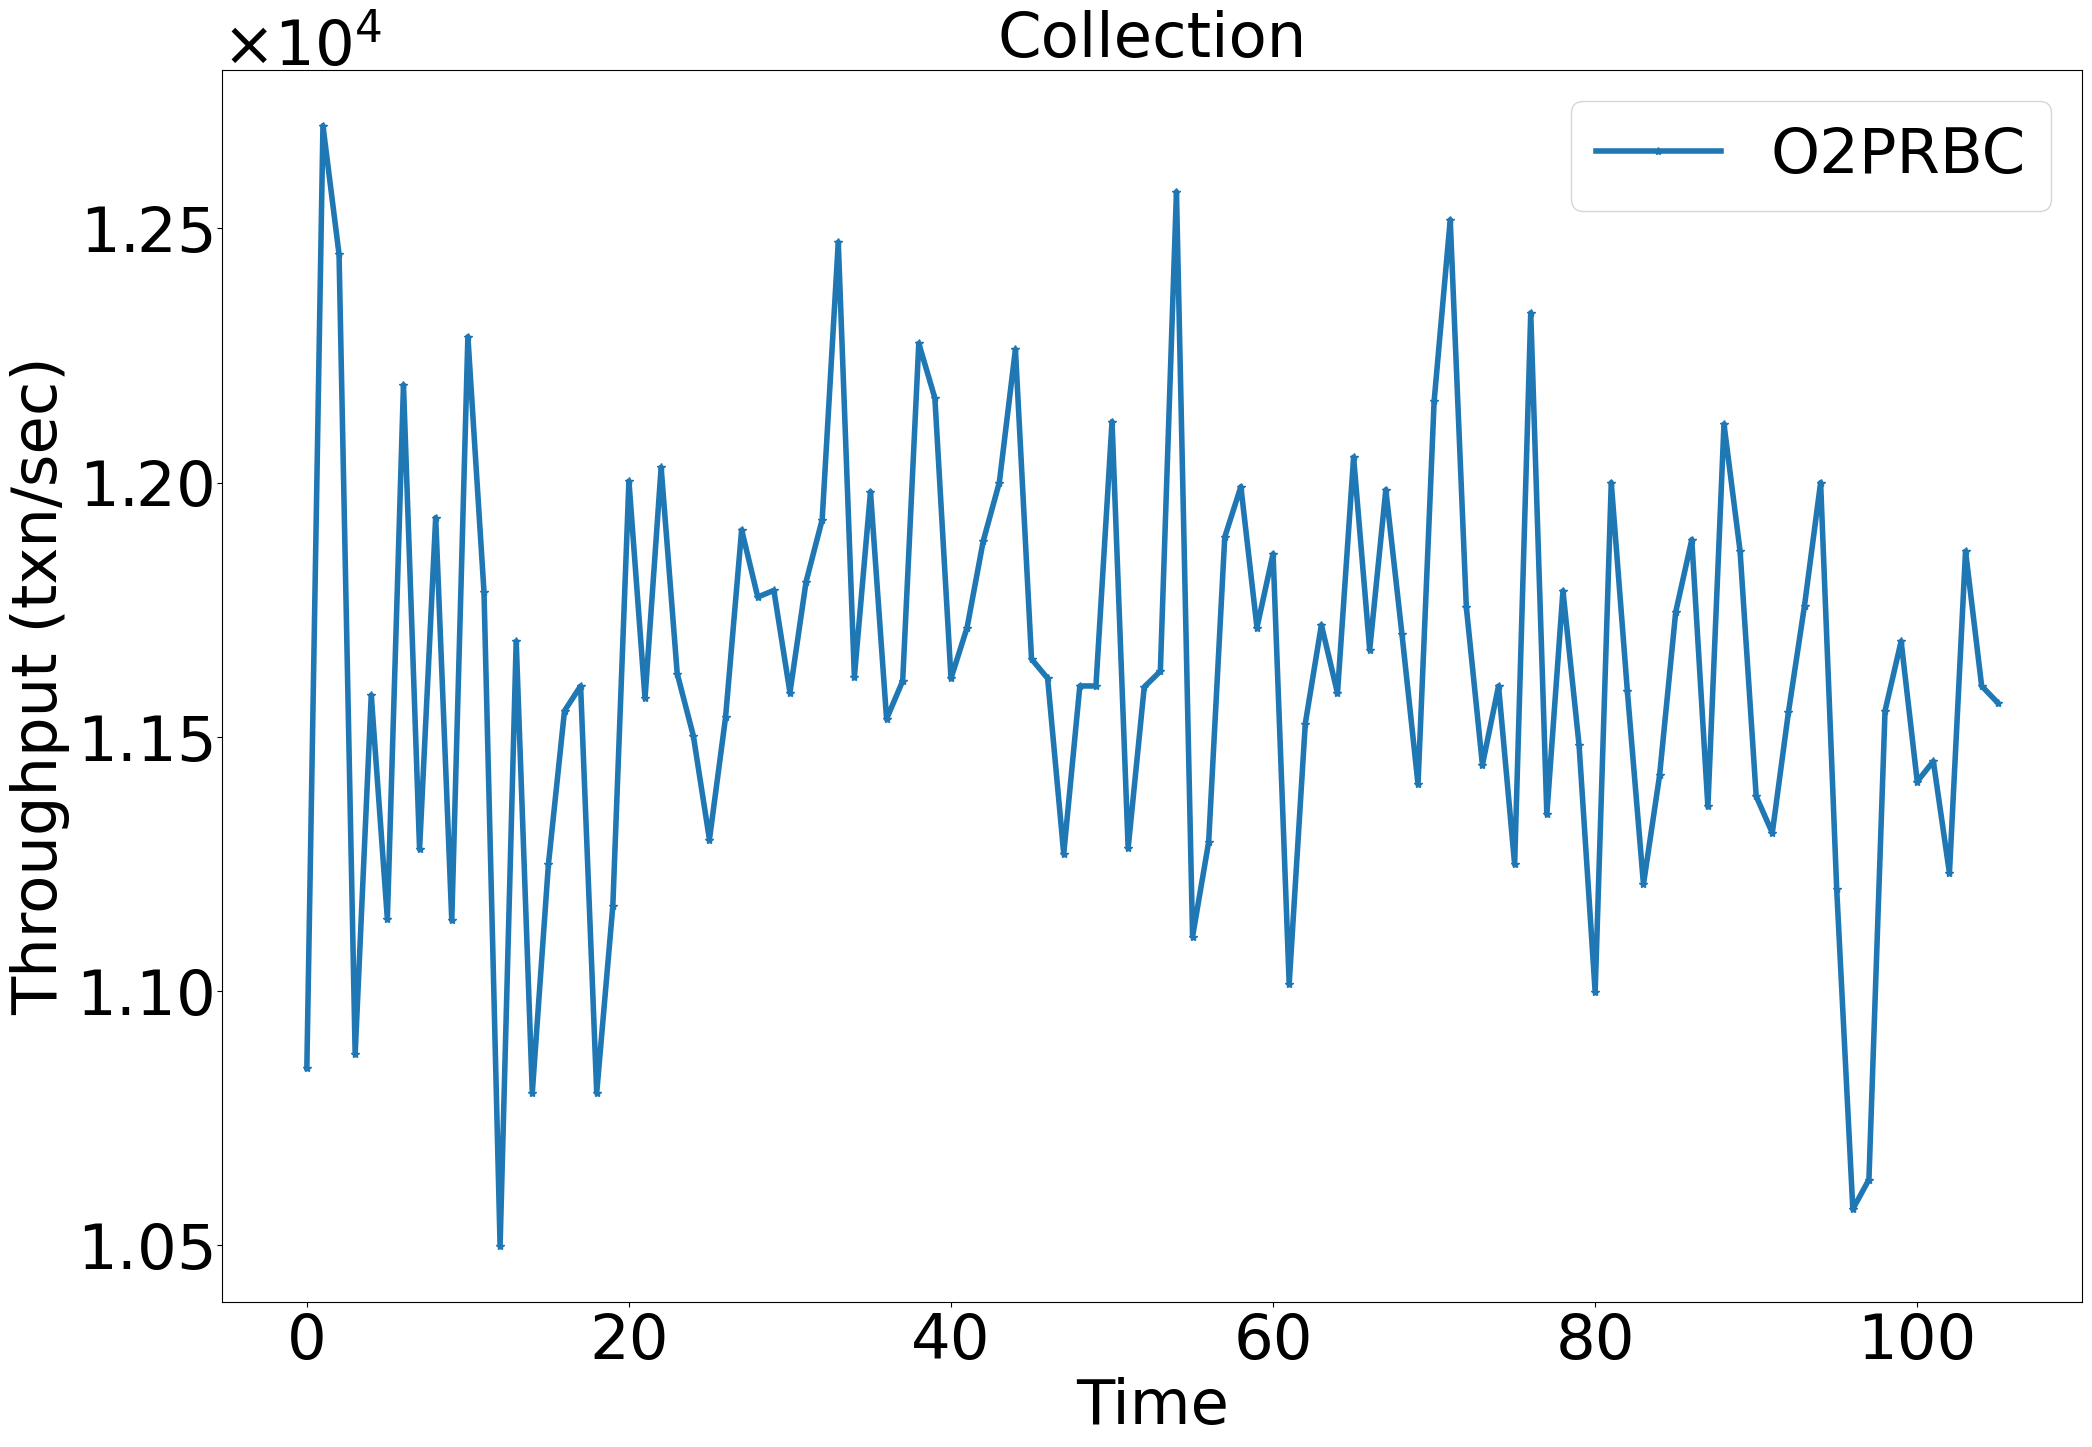

<Figure size 640x480 with 0 Axes>

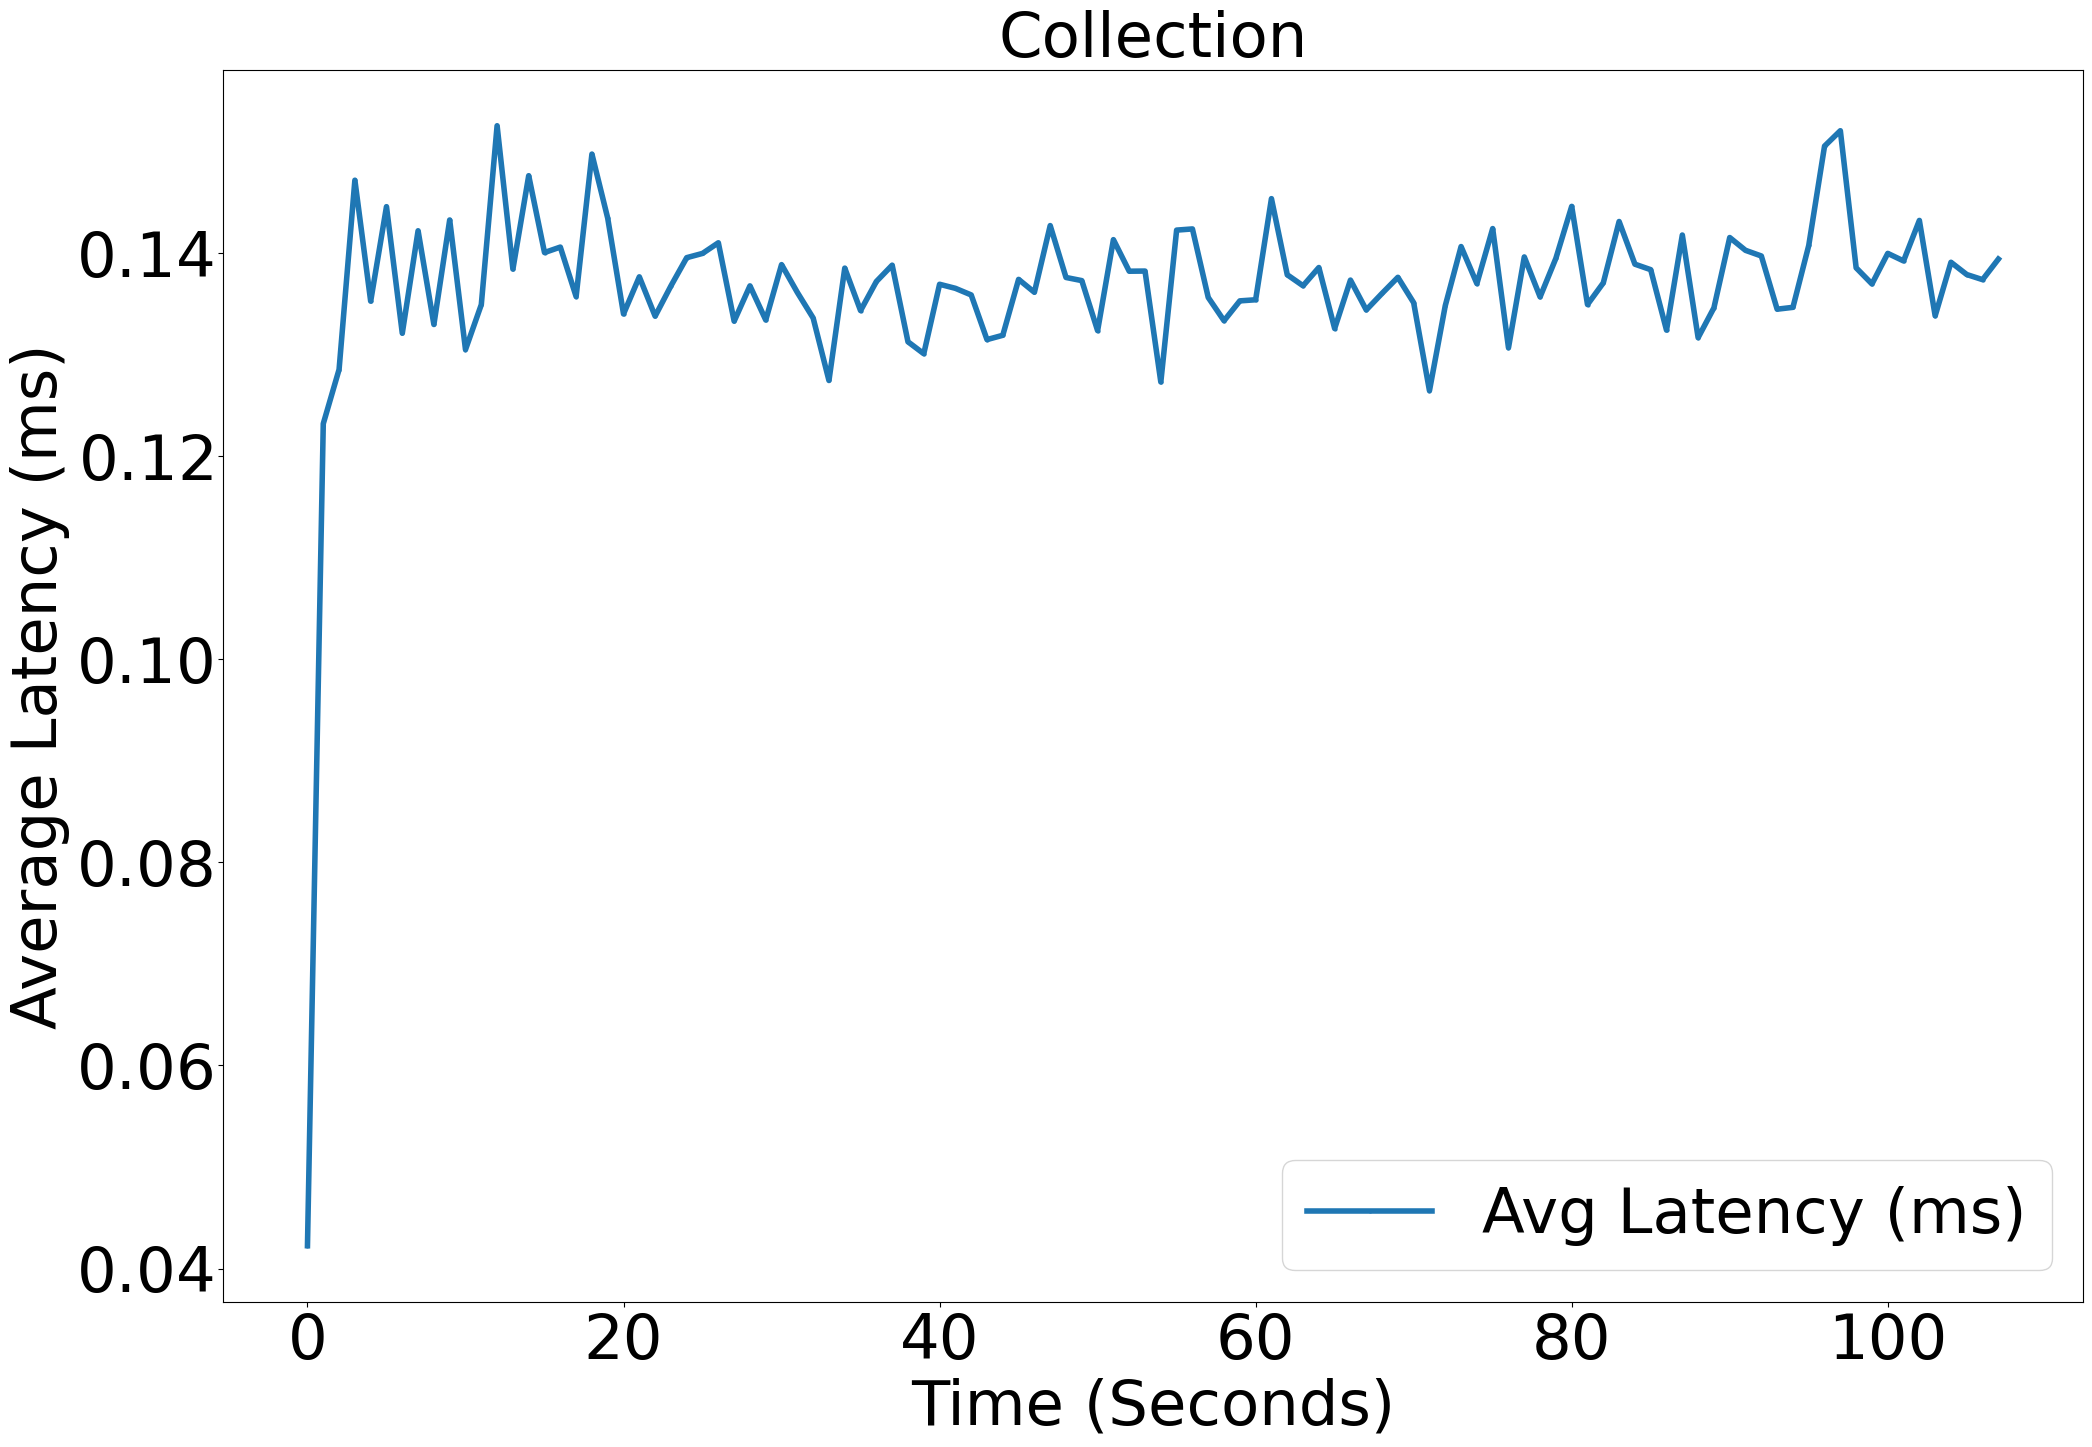

11613.381818181819 0.1378778749677145


In [10]:
for folder in os.listdir('../../../Experiments/'):
    if   folder == 'O2PRBC_4node':
        
        
        
        experiment = '../../Experiments/' + folder 
        print(experiment)
        X,Y, lats, temp, Times = getThroughput(experiment)



#         cluster_number = 

        # Y = Y * cluster_number

        lats

        np.sum(Y)

        s1, s2 = X[:-2],Y[:-2]

        

        len(lats)

        2*18923.433333333334


        experiment = folder
        print('folder is ', folder)

        if not os.path.exists('../../../Experiments/'+experiment):
            os.mkdir('../../../Experiments/'+experiment)


        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        fig.patch.set_facecolor('white')
        pl.plot(s1,s2, '-*', label = 'O2PRBC', linewidth = 4)
        ax.yaxis.set_major_formatter(formatter)

        pl.legend()
        pl.xlabel('Time')
        pl.ylabel('Throughput (txn/sec)')
        pl.title('Collection')

#         pl.ylim(8000,14000)
        pl.savefig('/home/tejas/Desktop/O2PRBC/collectthputsV2.png', dpi = 150, bbox_inches='tight' )
        pl.show()
        pl.clf()


        int_times = Times.astype(int)

        # Find the range of seconds
        min_time, max_time = int_times.min(), int_times.max()
        num_seconds = max_time - min_time + 1

        # Compute sum of latencies per second
        latency_sums = np.bincount(int_times - min_time, weights=lats, minlength=num_seconds)

        # Compute count per second
        counts = np.bincount(int_times - min_time, minlength=num_seconds)

        # Avoid division by zero and compute average latency per second
        avg_latency_per_sec = np.divide(latency_sums, counts, where=(counts > 0))

        # Generate second timestamps
        seconds = np.arange(min_time, max_time + 1)
        seconds = seconds - seconds[0]
        # Plot the results
        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        pl.plot(seconds, avg_latency_per_sec, marker='o', linestyle='-', markersize=2, \
                label="Avg Latency (ms)", linewidth = 4)
        
        ax.yaxis.set_major_formatter(formatter)

        pl.xlabel("Time (Seconds)")
        pl.ylabel("Average Latency (ms)")
#         pl.ylim(0,0.02)
        pl.title('Collection')
        pl.legend()
#         pl.savefig('/home/tejas/Desktop/O2PRBC/collectlatsV2.png', dpi = 150, bbox_inches='tight' )

        pl.show()
    
        print(np.average(s2[-60:-5]), np.average(avg_latency_per_sec[-60:-5]))
    

../../Experiments/O2PRBC_single_collect_test48


/tmp/ipykernel_93599/2425067424.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Times = np.array(Times)[sorted_indices.astype(np.int)]
/tmp/ipykernel_93599/2425067424.py:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Dep

3368.0
folder is  O2PRBC_single_collect_test48


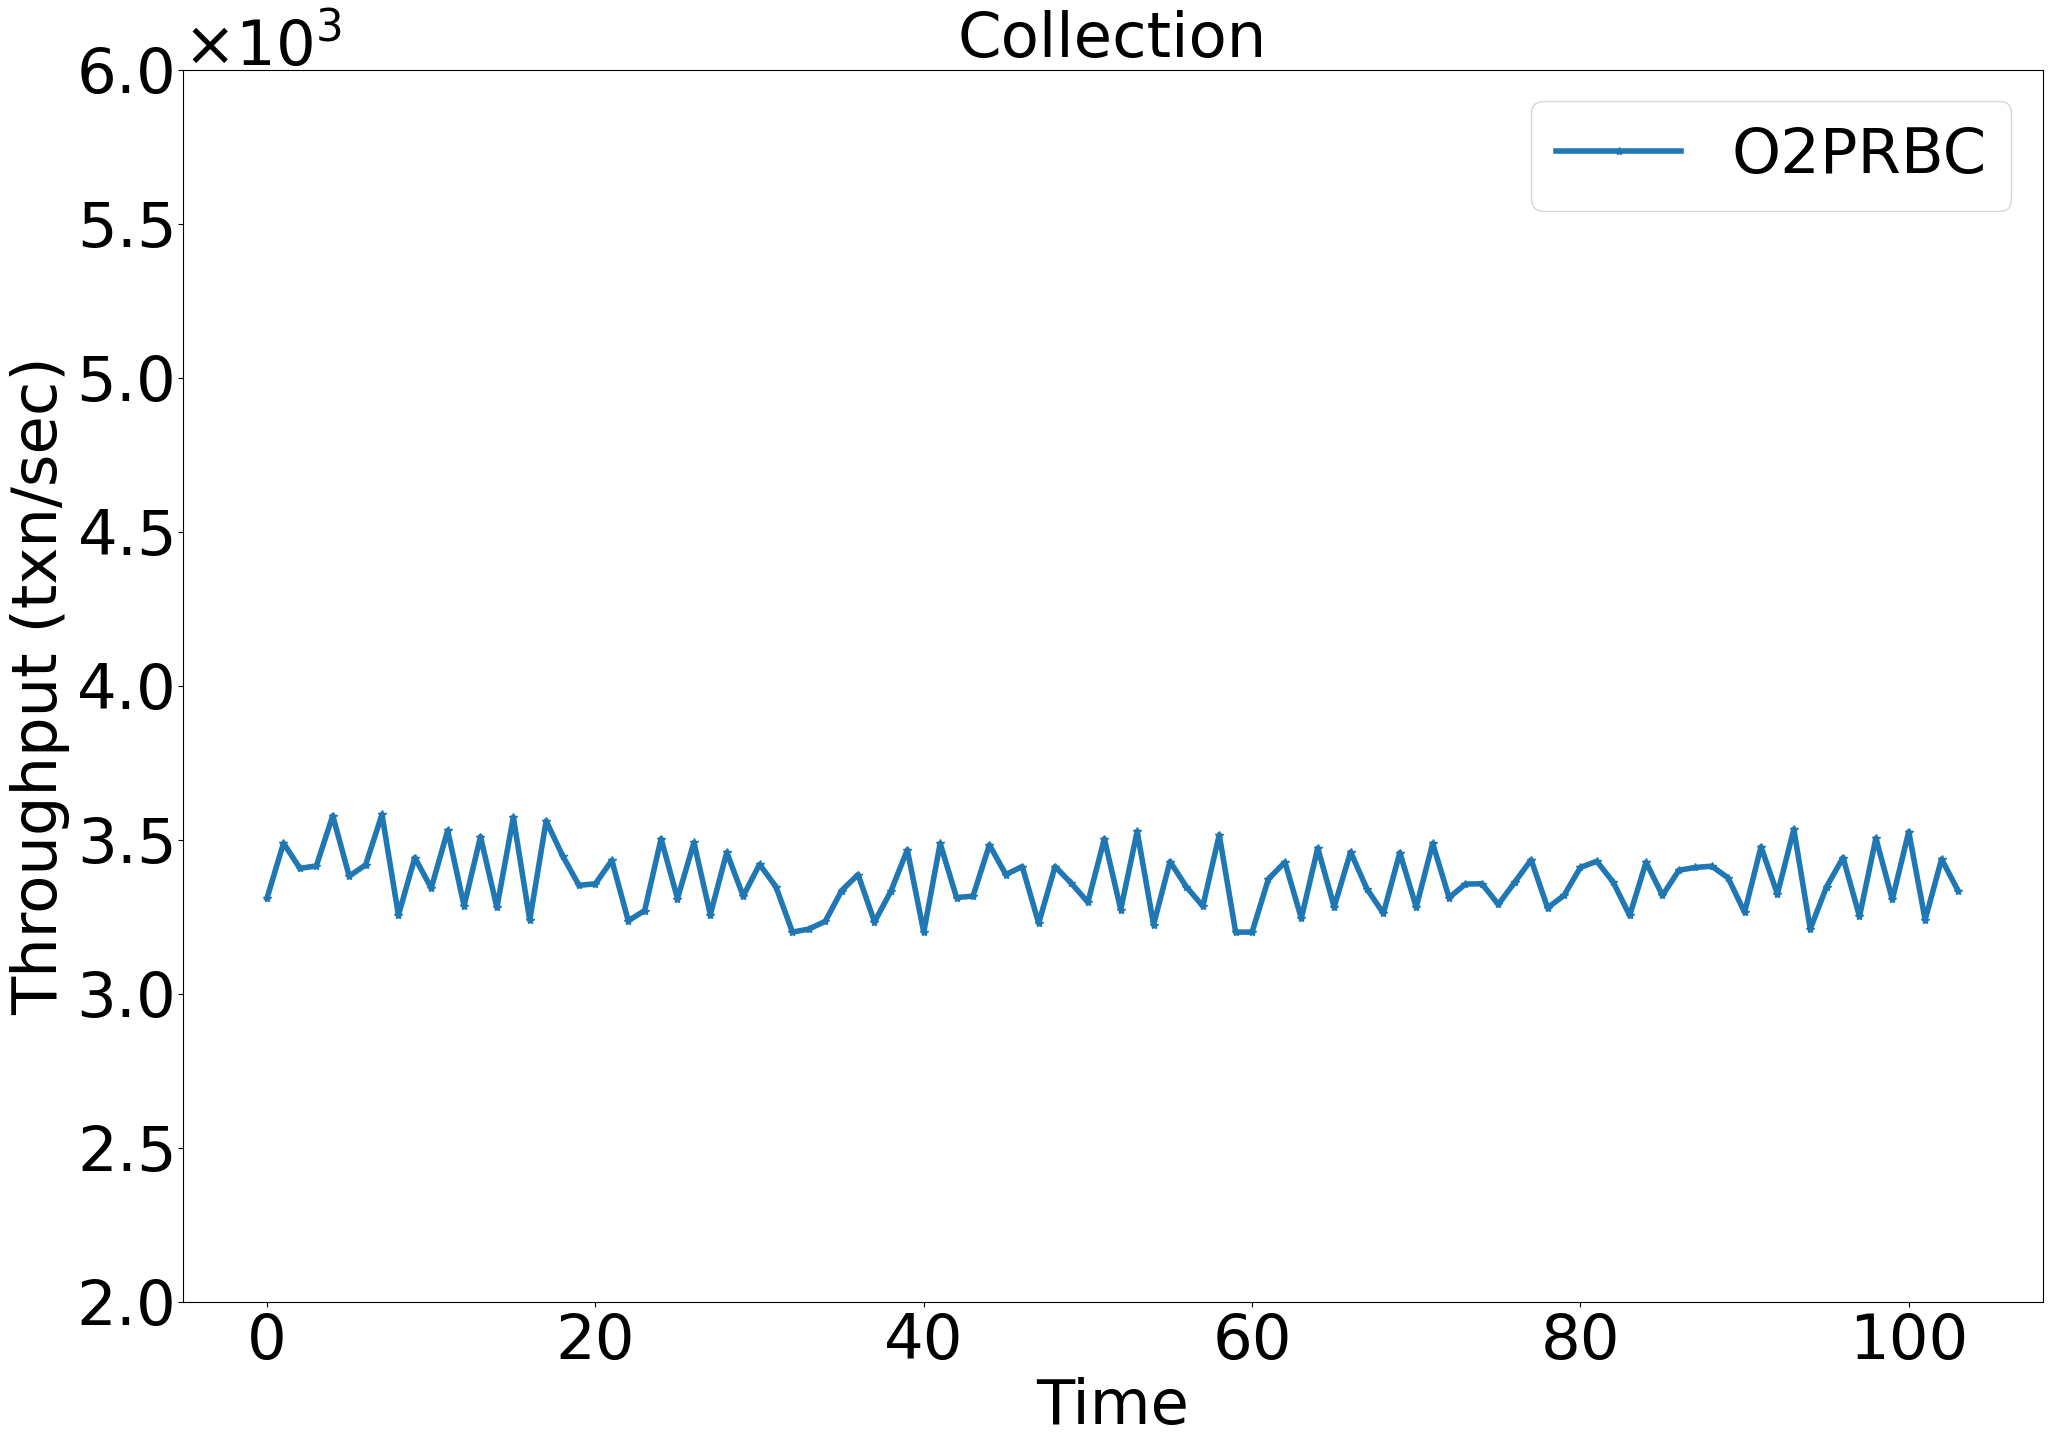

<Figure size 640x480 with 0 Axes>

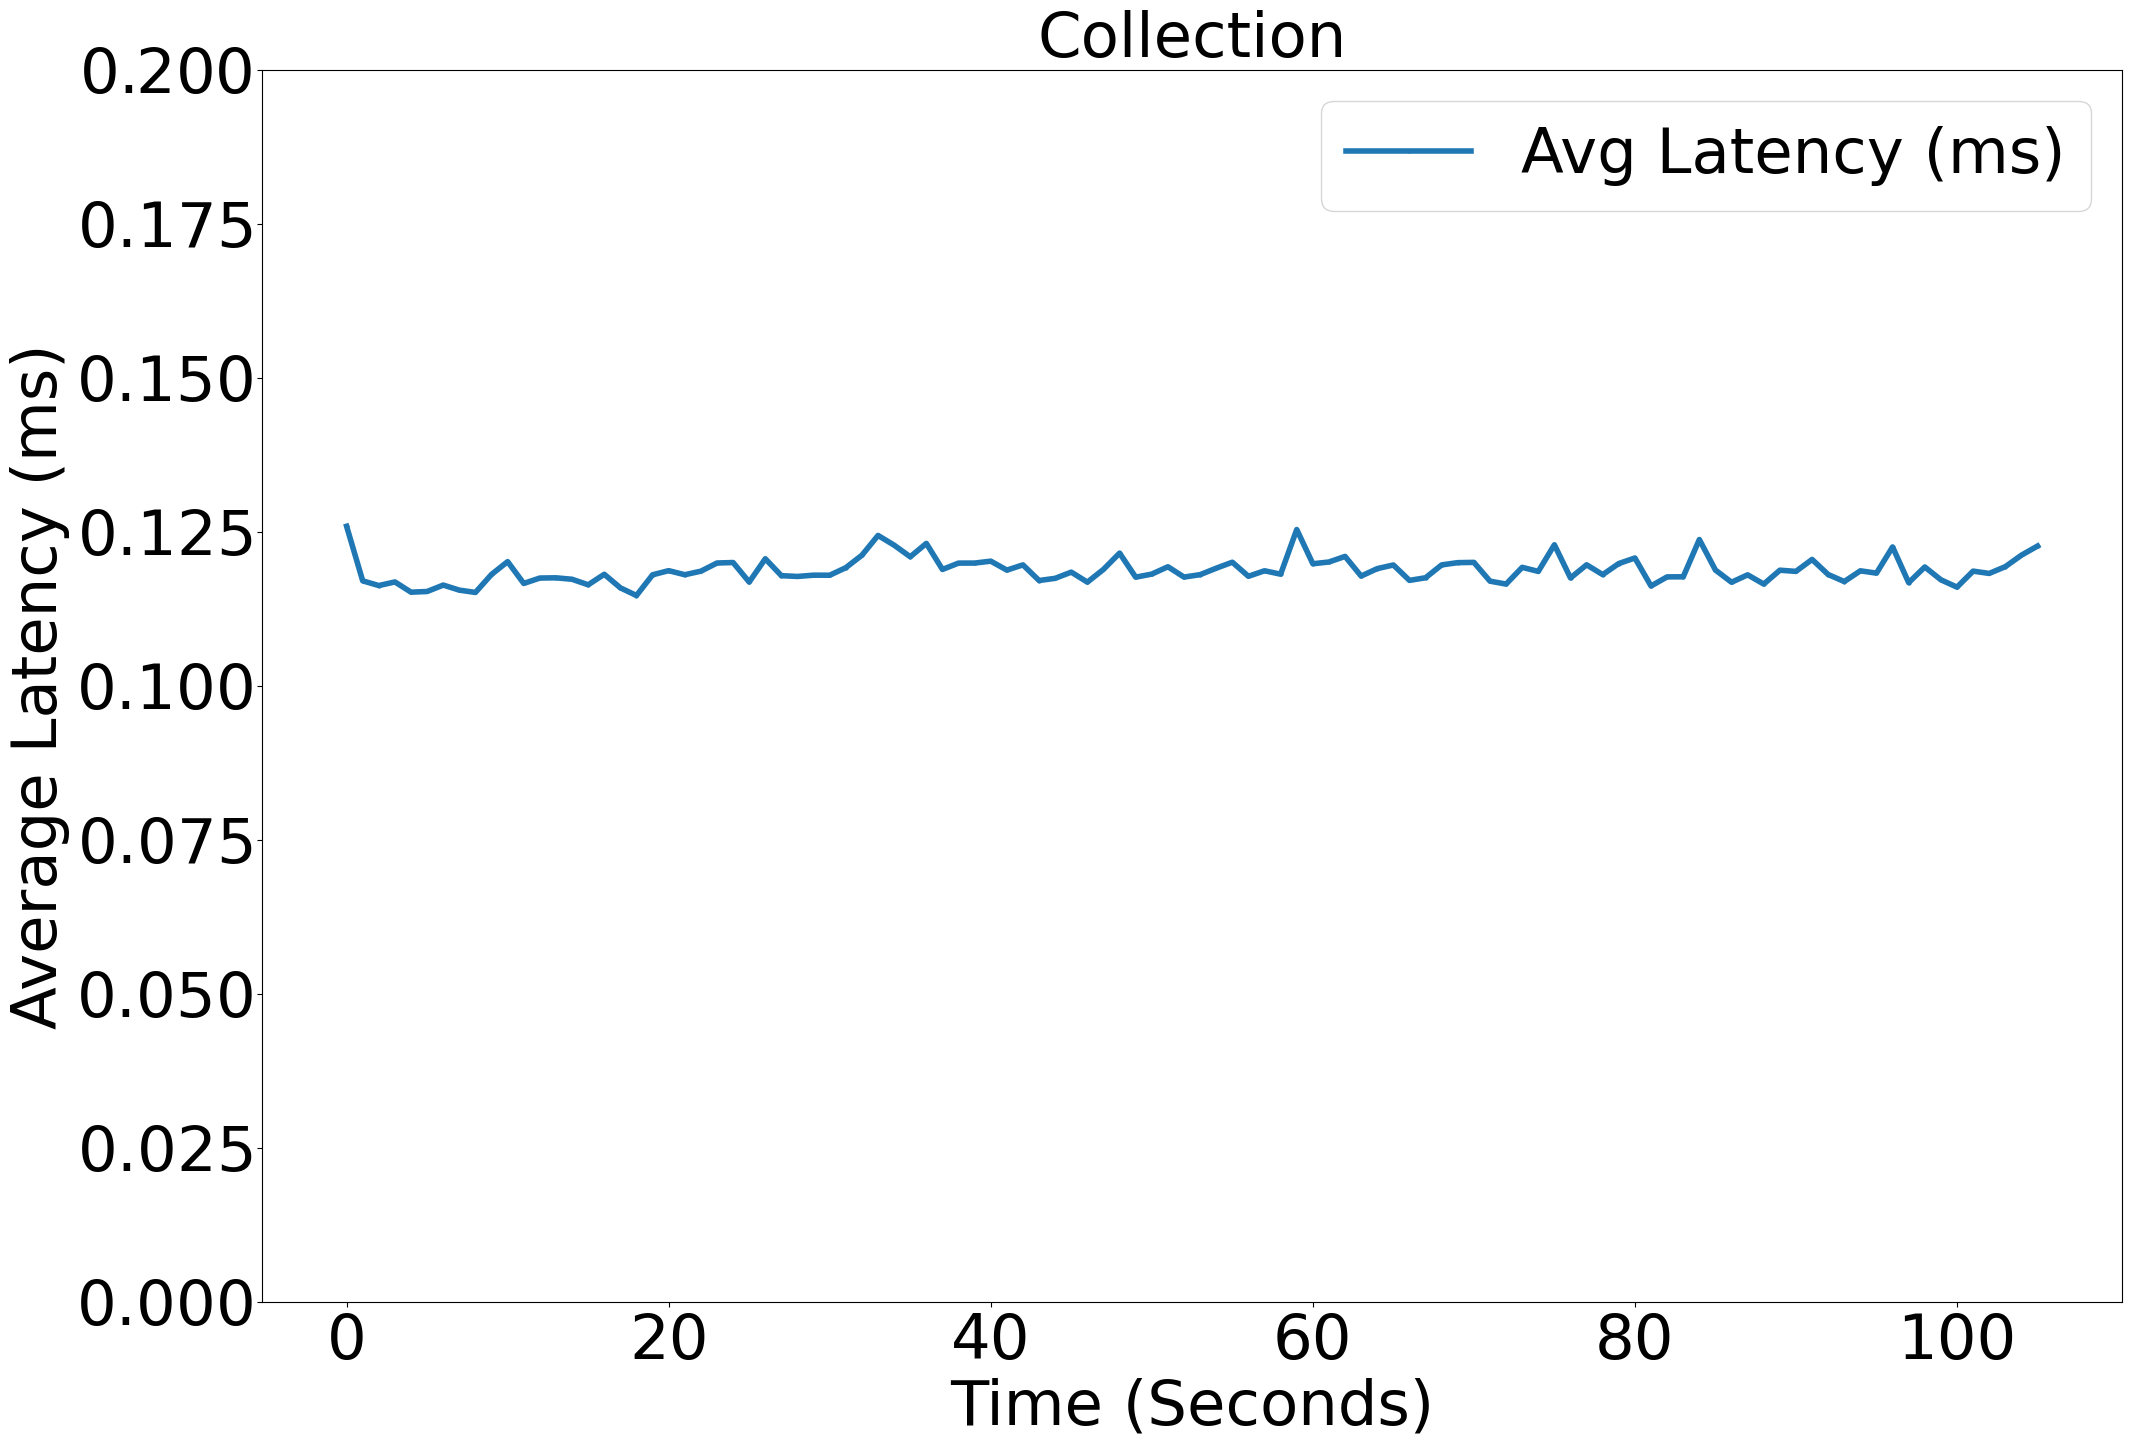

3364.3454545454547 0.11882083035646451


In [17]:
for folder in os.listdir('../../../Experiments/'):
    if   folder == 'O2PRBC_single_collect_test48':
        
        
        
        experiment = '../../Experiments/' + folder 
        print(experiment)
        X,Y, lats, temp, Times = getThroughput(experiment)



#         cluster_number = 

        # Y = Y * cluster_number

        lats

        np.sum(Y)

        s1, s2 = X[:-2],Y[:-2]

        print(np.average(s2[-30:-5]))
        np.average(lats[-33:-3])

        len(lats)

        2*18923.433333333334


        experiment = folder
        print('folder is ', folder)

        if not os.path.exists('../../../Experiments/'+experiment):
            os.mkdir('../../../Experiments/'+experiment)


        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        fig.patch.set_facecolor('white')
        pl.plot(s1,s2, '-*', label = 'O2PRBC', linewidth = 4)
        ax.yaxis.set_major_formatter(formatter)

        pl.legend()
        pl.xlabel('Time')
        pl.ylabel('Throughput (txn/sec)')
        pl.title('Collection')

        pl.ylim(2000,6000)
        pl.savefig('/home/tejas/Desktop/O2PRBC/singlecollect48t.pdf', dpi = 150, bbox_inches='tight' )
        pl.show()
        pl.clf()


        int_times = Times.astype(int)

        # Find the range of seconds
        min_time, max_time = int_times.min(), int_times.max()
        num_seconds = max_time - min_time + 1

        # Compute sum of latencies per second
        latency_sums = np.bincount(int_times - min_time, weights=lats, minlength=num_seconds)

        # Compute count per second
        counts = np.bincount(int_times - min_time, minlength=num_seconds)

        # Avoid division by zero and compute average latency per second
        avg_latency_per_sec = np.divide(latency_sums, counts, where=(counts > 0))

        # Generate second timestamps
        seconds = np.arange(min_time, max_time + 1)
        seconds = seconds - seconds[0]
        # Plot the results
        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        pl.plot(seconds, avg_latency_per_sec, marker='o', linestyle='-', markersize=2, \
                label="Avg Latency (ms)", linewidth = 4)
        
        ax.yaxis.set_major_formatter(formatter)

        pl.xlabel("Time (Seconds)")
        pl.ylabel("Average Latency (ms)")
        pl.ylim(0,0.2)
        pl.title('Collection')
        pl.legend()
        pl.savefig('/home/tejas/Desktop/O2PRBC/singlecollect48l.pdf', dpi = 150, bbox_inches='tight' )

        pl.show()
        print(np.average(s2[-60:-5]), np.average(avg_latency_per_sec[-60:-5]))
    

../../Experiments/ho_16node


/tmp/ipykernel_43122/2425067424.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Times = np.array(Times)[sorted_indices.astype(np.int)]
/tmp/ipykernel_43122/2425067424.py:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Dep

5665.24
folder is  ho_16node


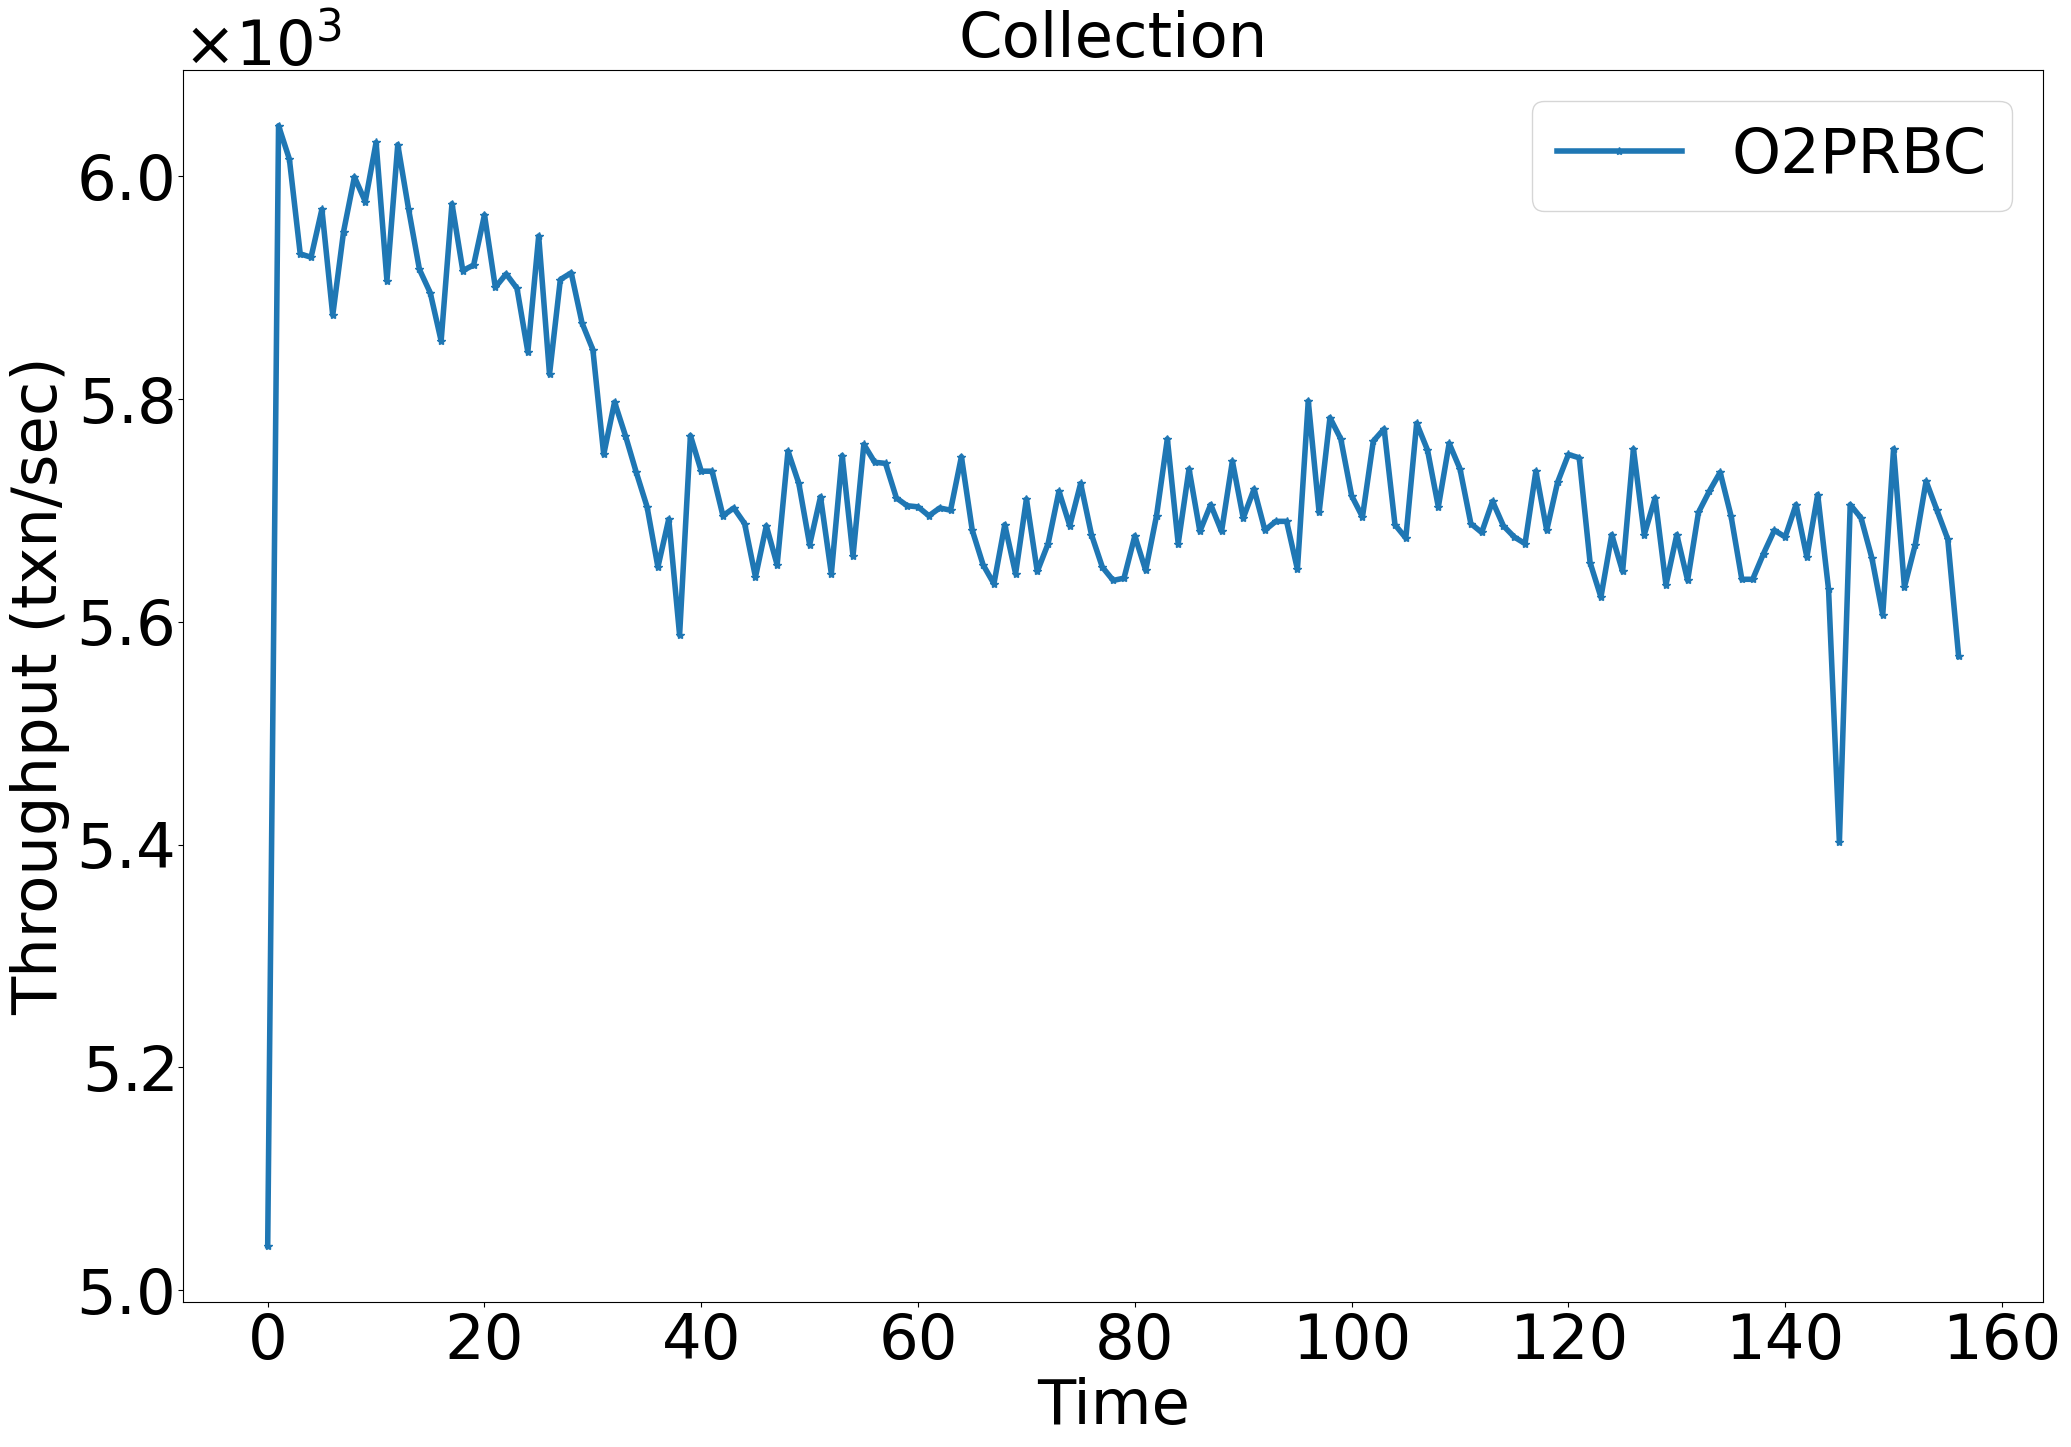

<Figure size 640x480 with 0 Axes>

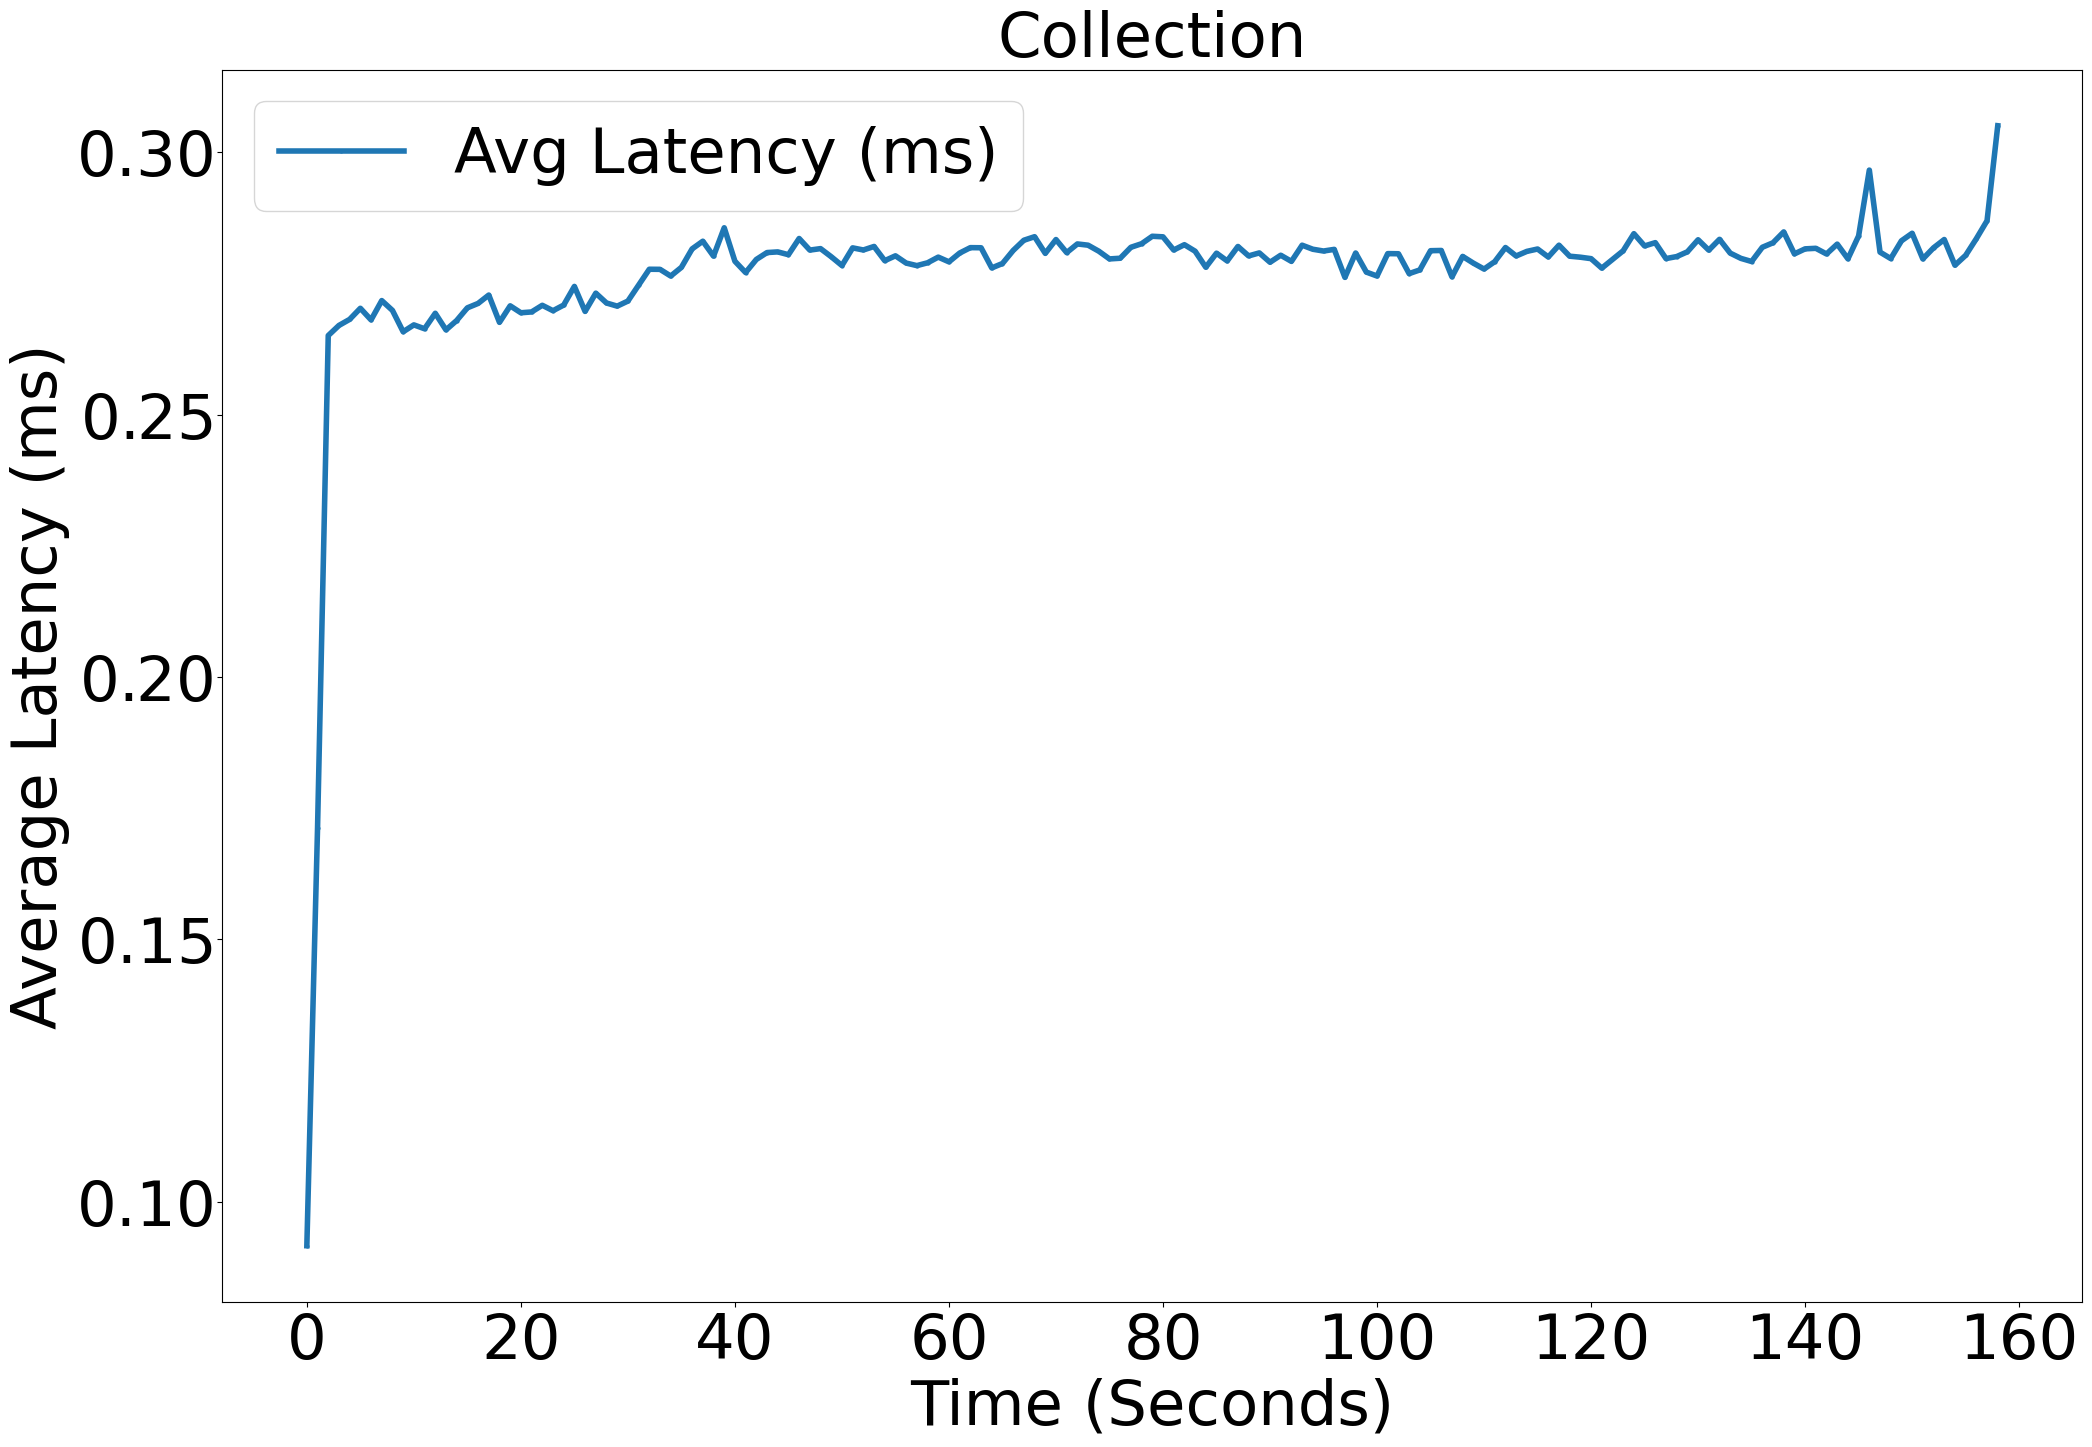

5691.127272727273 0.2810727256440502


In [34]:
for folder in os.listdir('../../../Experiments/'):
    if   folder == 'ho_16node':
        
        
        
        experiment = '../../Experiments/' + folder 
        print(experiment)
        X,Y, lats, temp, Times = getThroughput(experiment)



#         cluster_number = 

        # Y = Y * cluster_number

        lats

        np.sum(Y)

        s1, s2 = X[:-2],Y[:-2]

        print(np.average(s2[-30:-5]))
        np.average(lats[-33:-3])

        len(lats)

        2*18923.433333333334


        experiment = folder
        print('folder is ', folder)

        if not os.path.exists('../../../Experiments/'+experiment):
            os.mkdir('../../../Experiments/'+experiment)


        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        fig.patch.set_facecolor('white')
        pl.plot(s1,s2, '-*', label = 'O2PRBC', linewidth = 4)
        ax.yaxis.set_major_formatter(formatter)

        pl.legend()
        pl.xlabel('Time')
        pl.ylabel('Throughput (txn/sec)')
        pl.title('Collection')

#         pl.ylim(8000,14000)
        pl.savefig('/home/tejas/Desktop/O2PRBC/collectthputsV2.png', dpi = 150, bbox_inches='tight' )
        pl.show()
        pl.clf()


        int_times = Times.astype(int)

        # Find the range of seconds
        min_time, max_time = int_times.min(), int_times.max()
        num_seconds = max_time - min_time + 1

        # Compute sum of latencies per second
        latency_sums = np.bincount(int_times - min_time, weights=lats, minlength=num_seconds)

        # Compute count per second
        counts = np.bincount(int_times - min_time, minlength=num_seconds)

        # Avoid division by zero and compute average latency per second
        avg_latency_per_sec = np.divide(latency_sums, counts, where=(counts > 0))

        # Generate second timestamps
        seconds = np.arange(min_time, max_time + 1)
        seconds = seconds - seconds[0]
        # Plot the results
        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        pl.plot(seconds, avg_latency_per_sec, marker='o', linestyle='-', markersize=2, \
                label="Avg Latency (ms)", linewidth = 4)
        
        ax.yaxis.set_major_formatter(formatter)

        pl.xlabel("Time (Seconds)")
        pl.ylabel("Average Latency (ms)")
#         pl.ylim(0,0.02)
        pl.title('Collection')
        pl.legend()
#         pl.savefig('/home/tejas/Desktop/O2PRBC/collectlatsV2.png', dpi = 150, bbox_inches='tight' )

        pl.show()
    
        print(np.average(s2[-60:-5]), np.average(avg_latency_per_sec[-60:-5]))
    

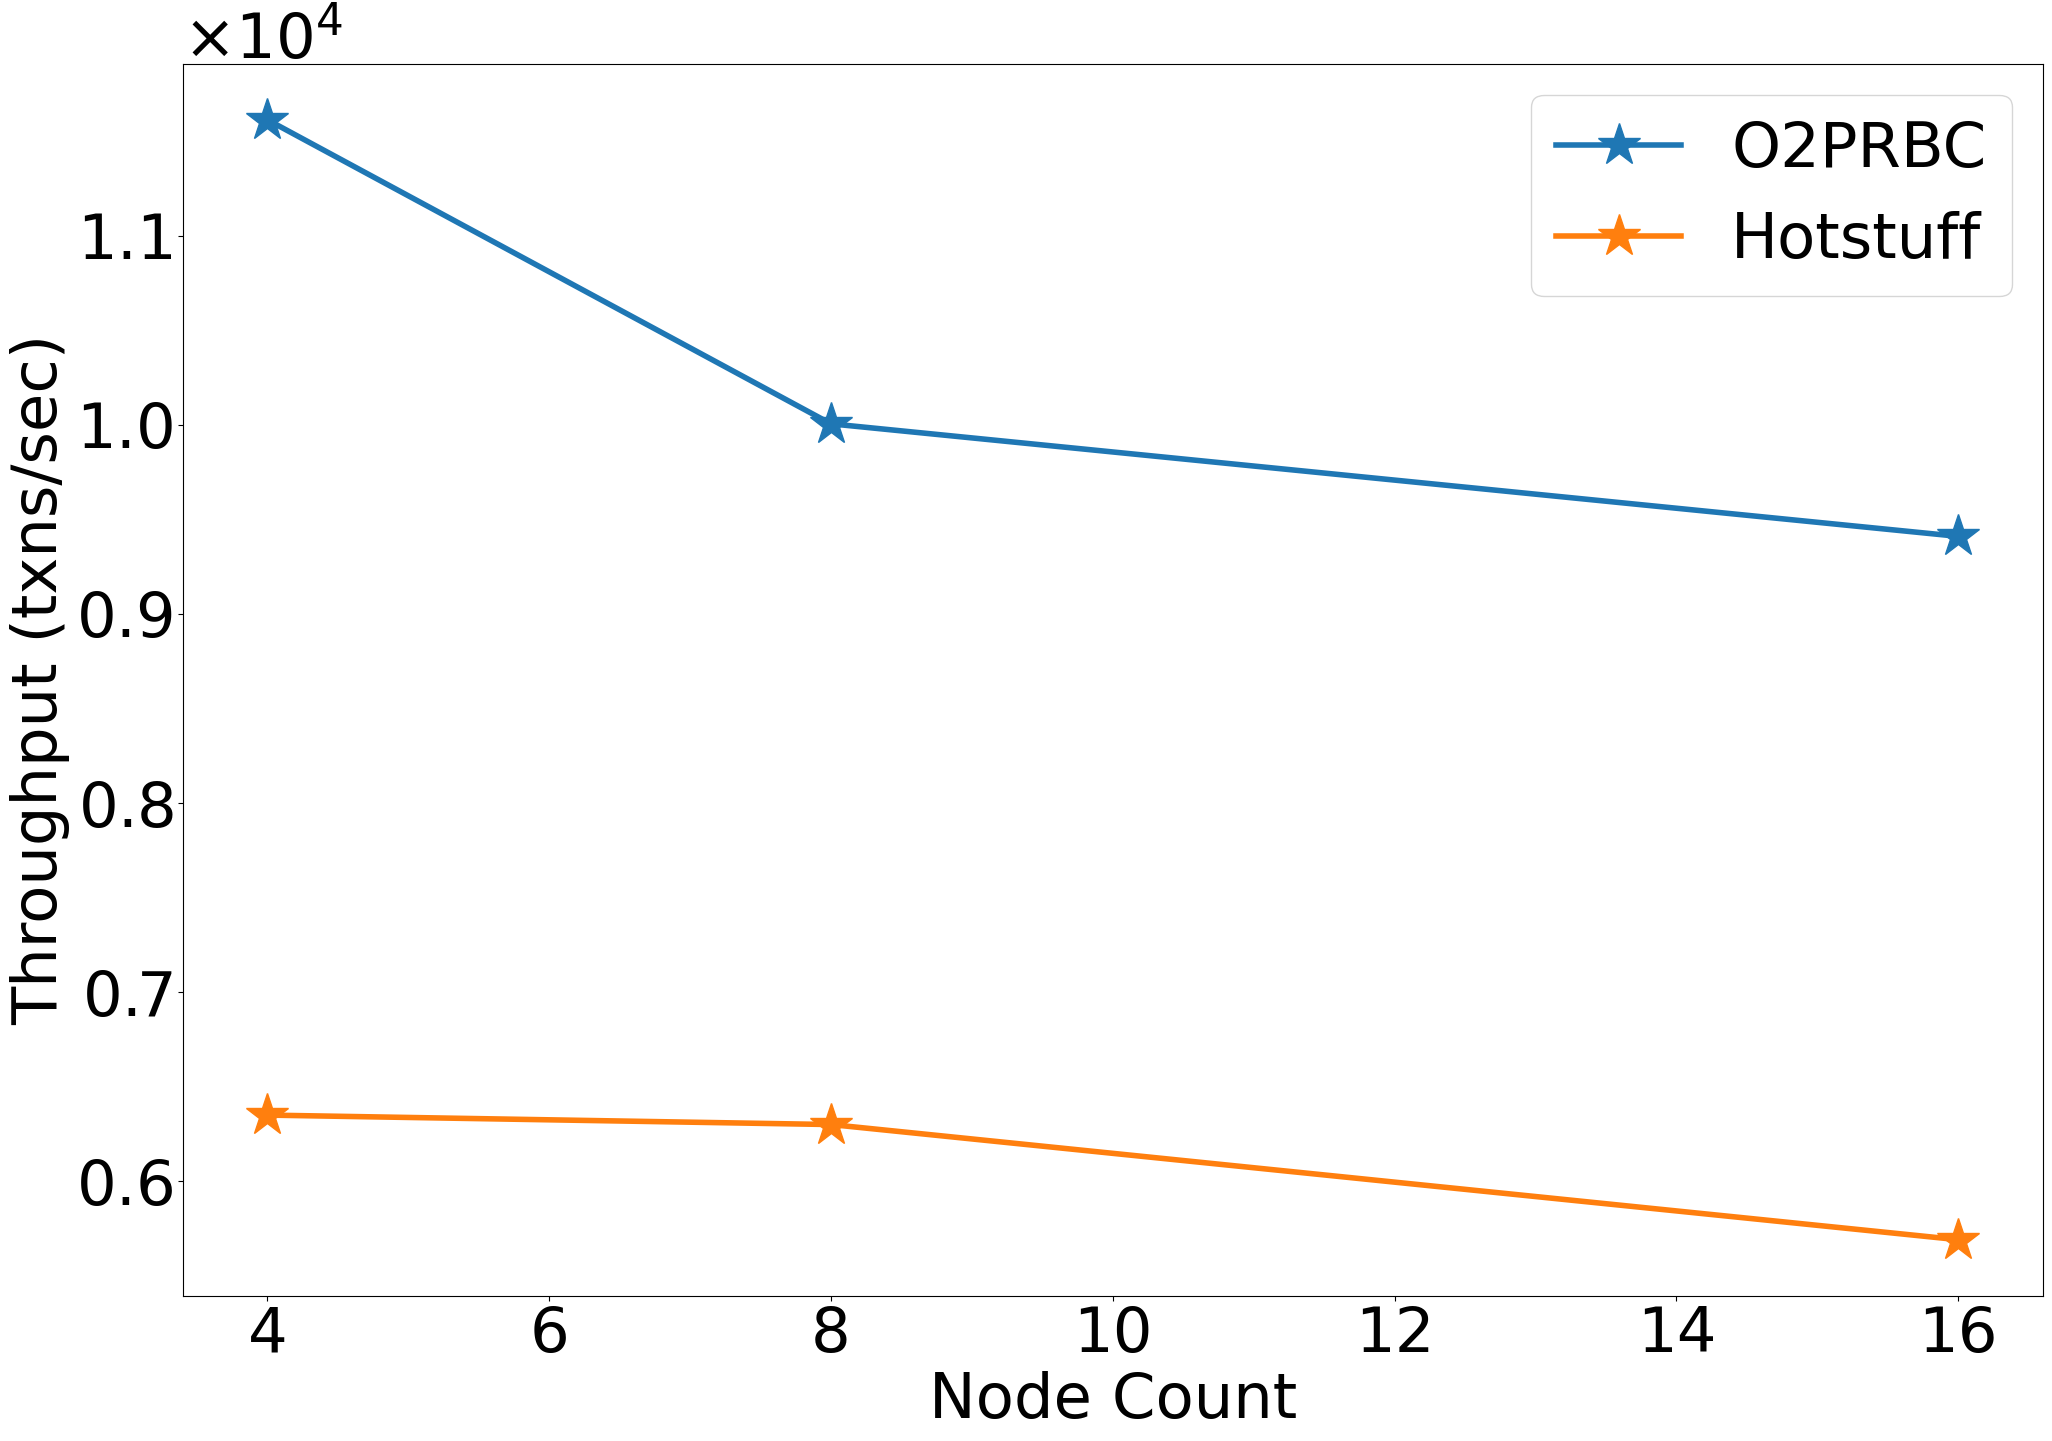

<Figure size 640x480 with 0 Axes>

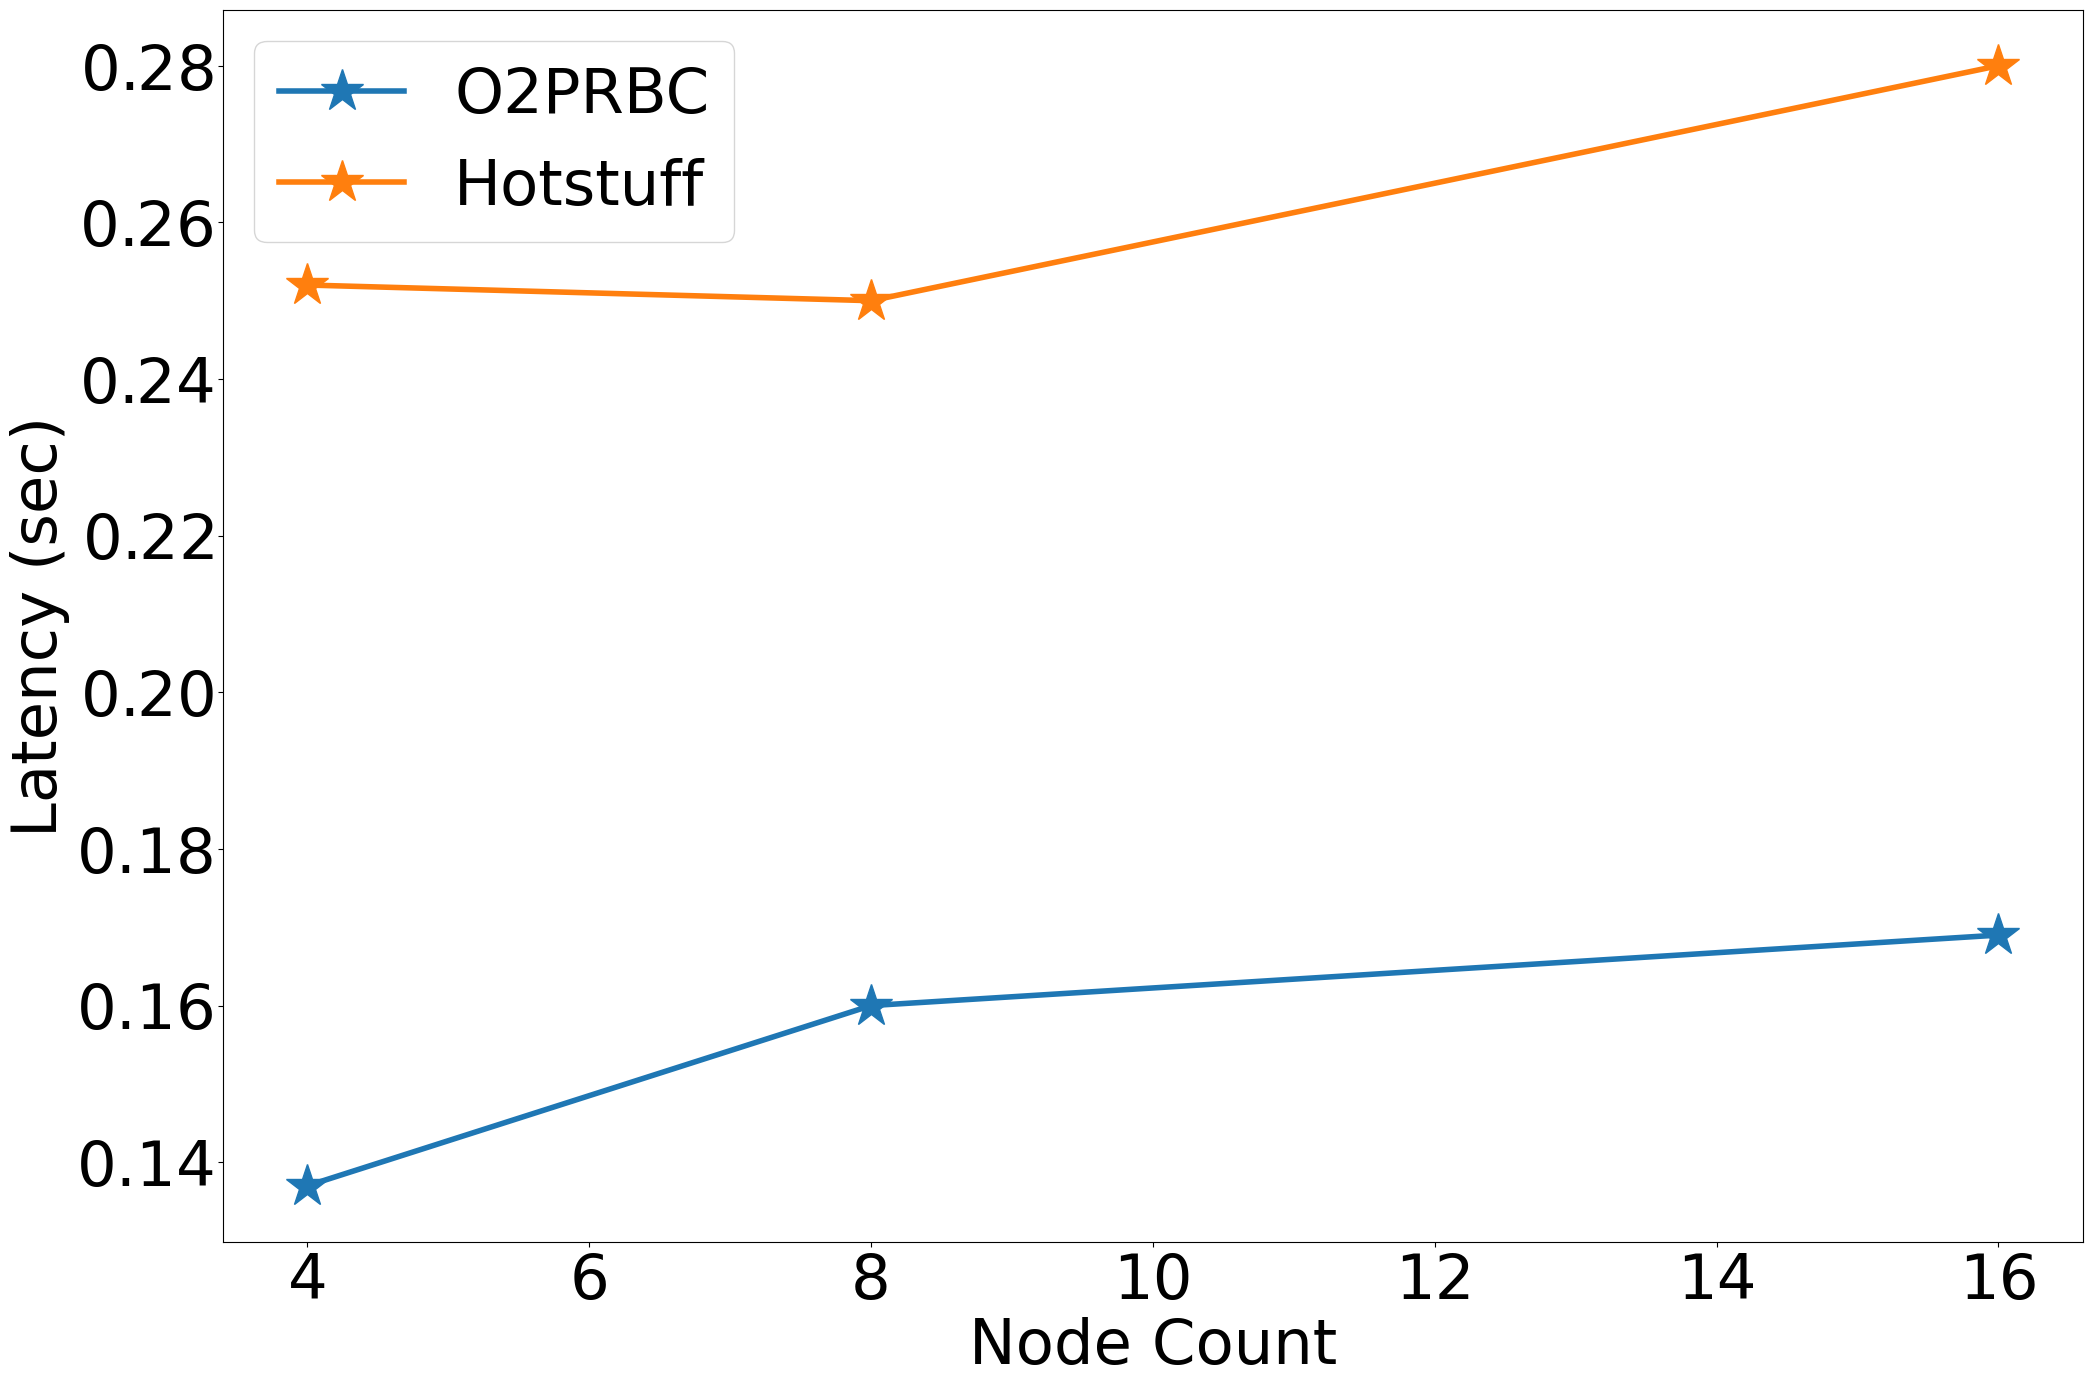

<Figure size 640x480 with 0 Axes>

In [36]:
node_count = [4, 8, 16]
thputs = [11613,10005,9410]
lats = [0.137,0.16, 0.169]
node_count_ho = [4,8, 16]
thputs_ho = [6350,6300, 5691]
lats_ho = [0.252, 0.25, 0.28]

fig,ax = pl.subplots(figsize = (24, 16))
pl.plot(node_count, thputs, '-*', linewidth = 4, markersize = 32, label = 'O2PRBC')
pl.plot(node_count_ho, thputs_ho, '-*', linewidth = 4, markersize = 32, label = 'Hotstuff')

ax.yaxis.set_major_formatter(formatter)
pl.ylabel('Throughput (txns/sec)')
pl.xlabel('Node Count')
pl.legend()

pl.savefig('/home/tejas/Desktop/O2PRBC/thputs_vs_nodecount.pdf', dpi = 150, bbox_inches='tight')
pl.show()
pl.clf()



fig,ax = pl.subplots(figsize = (24, 16))
pl.plot(node_count, lats, '-*', linewidth = 4, markersize = 32, label = 'O2PRBC')
pl.plot(node_count_ho, lats_ho, '-*', linewidth = 4, markersize = 32, label = 'Hotstuff')

ax.yaxis.set_major_formatter(formatter)
pl.ylabel('Latency (sec)')
pl.xlabel('Node Count')
pl.legend()
pl.savefig('/home/tejas/Desktop/O2PRBC/lats_vs_nodecount.pdf', dpi = 150, bbox_inches='tight')

pl.show()
pl.clf()



../../Experiments/O2PRBC_b100_8node


/tmp/ipykernel_7093/2425067424.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Times = np.array(Times)[sorted_indices.astype(np.int)]
/tmp/ipykernel_7093/2425067424.py:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depre

7384.52
folder is  O2PRBC_b100_8node


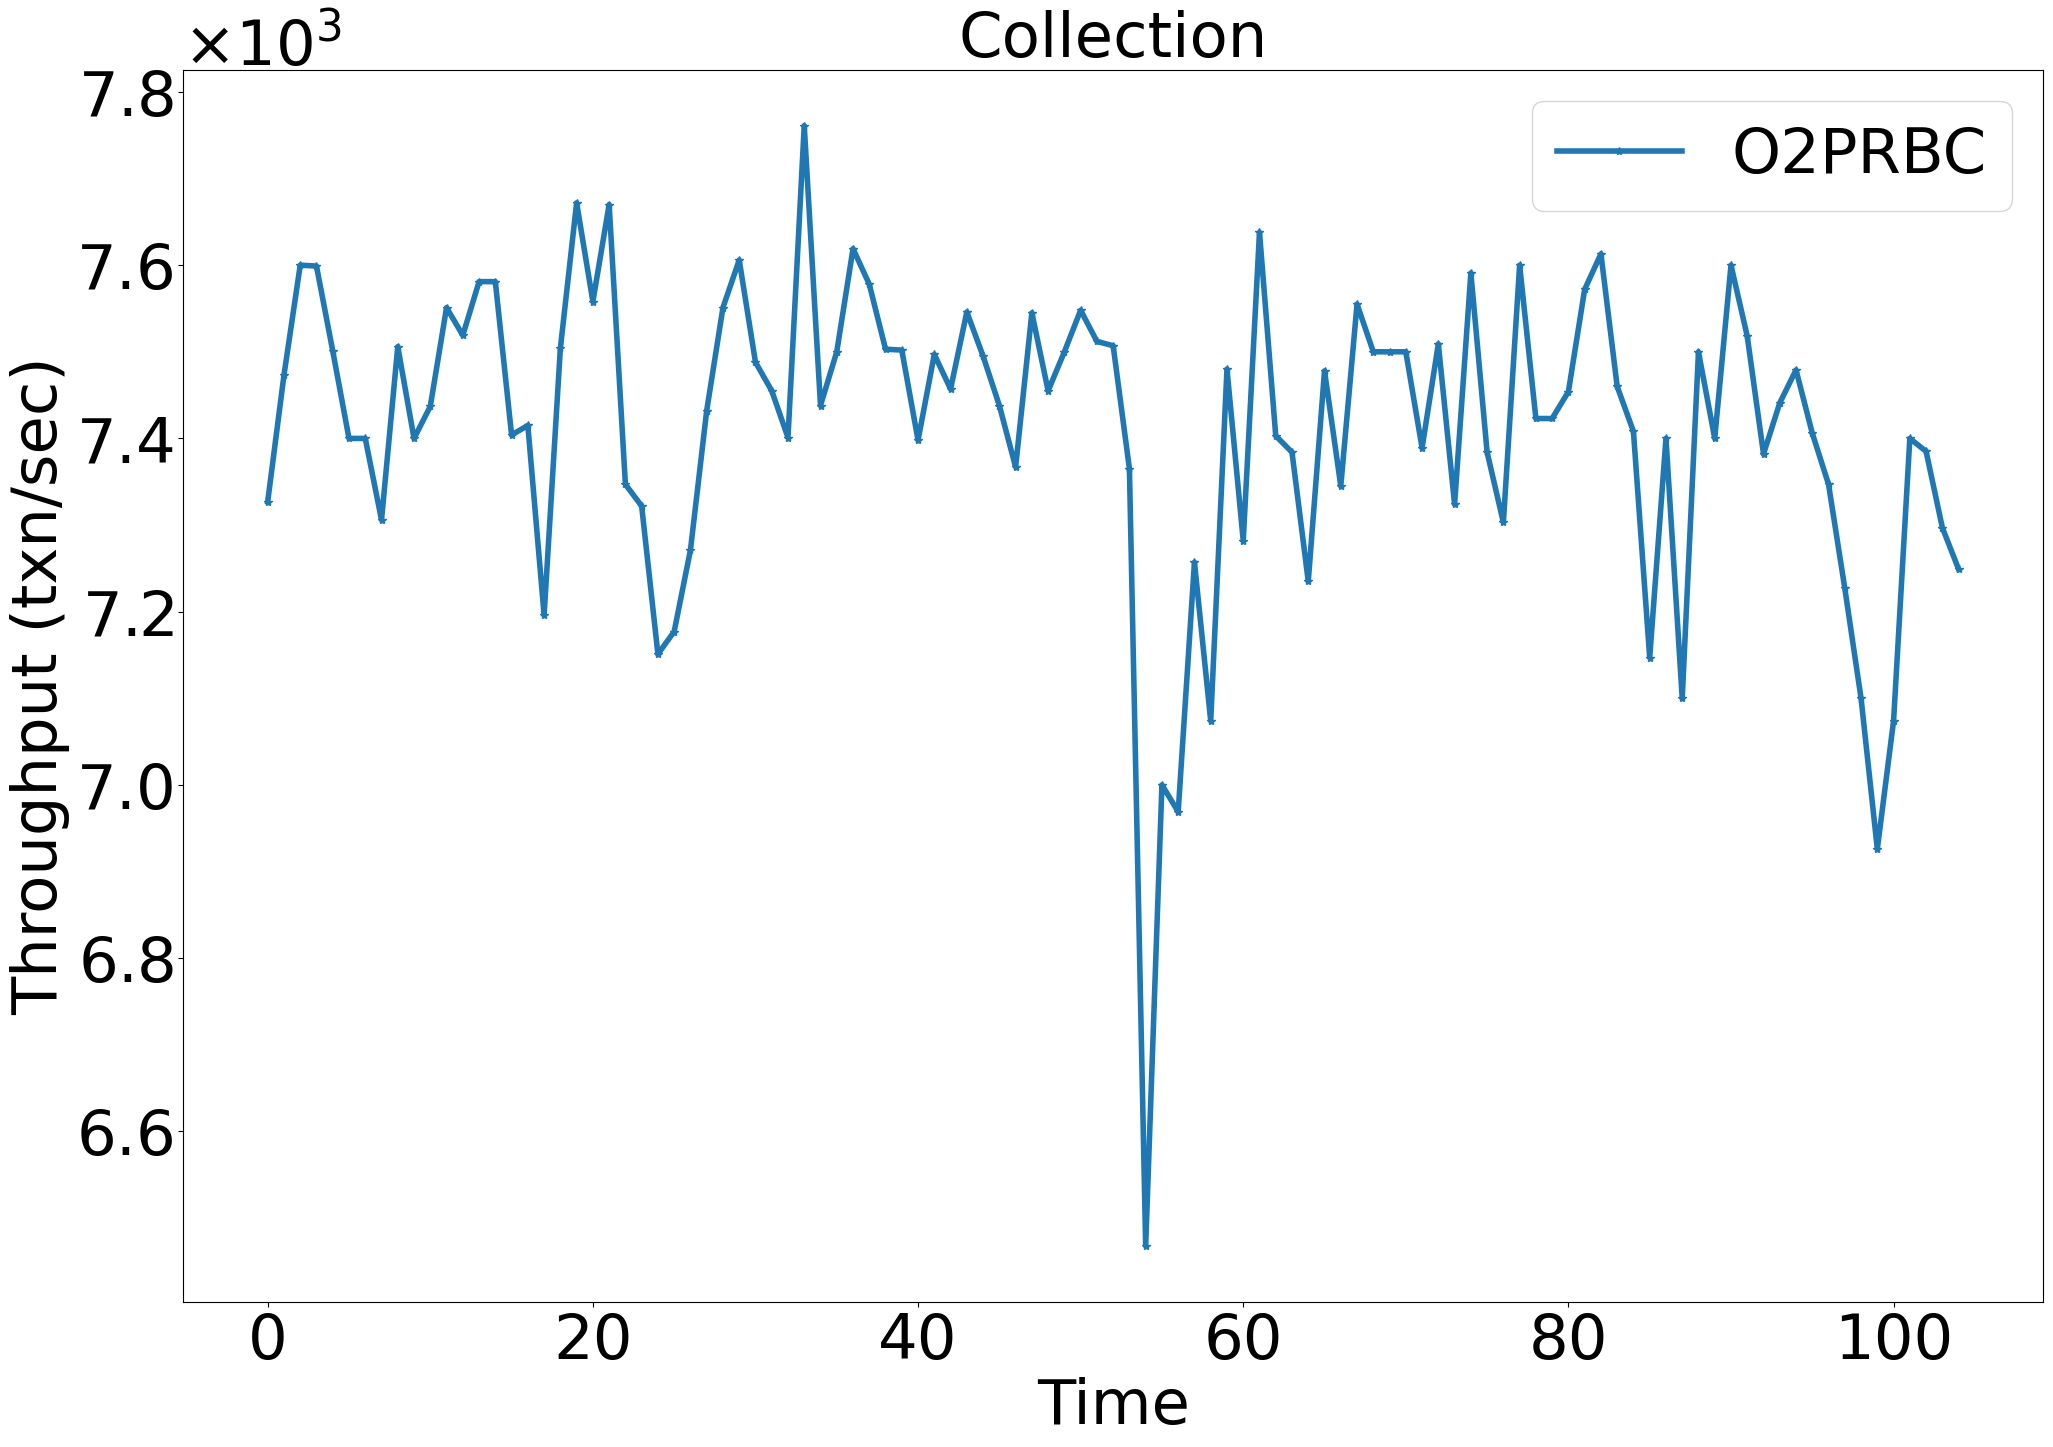

<Figure size 640x480 with 0 Axes>

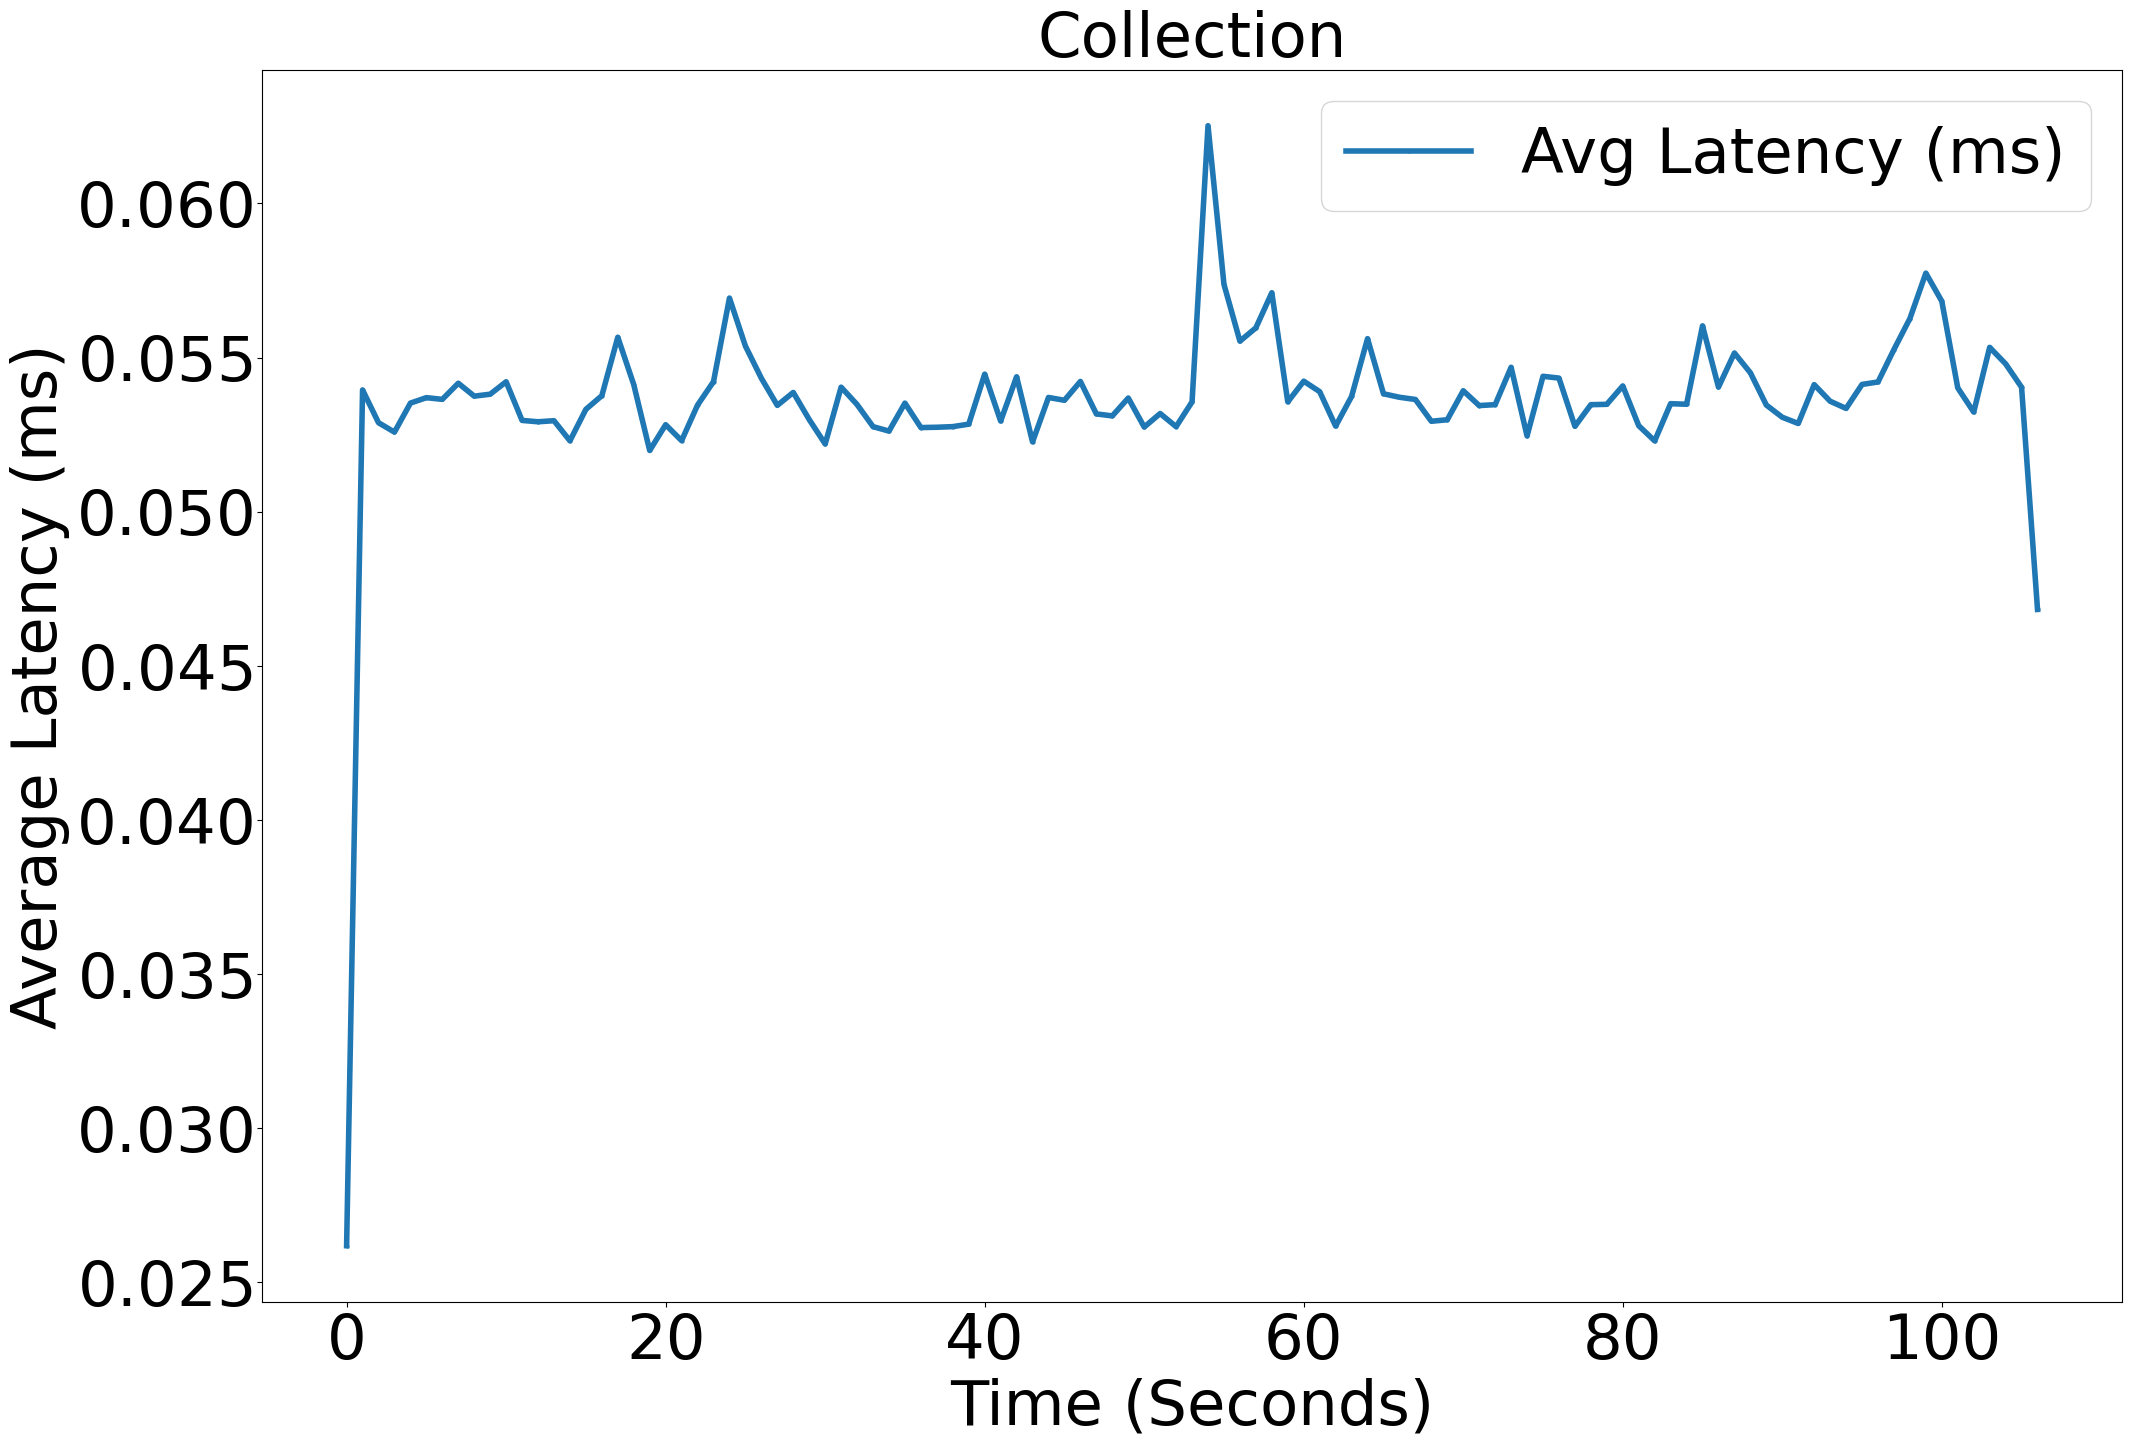

7376.927272727273 0.054231672406912276
../../Experiments/O2PRBC_b100_4node
7362.92
folder is  O2PRBC_b100_4node


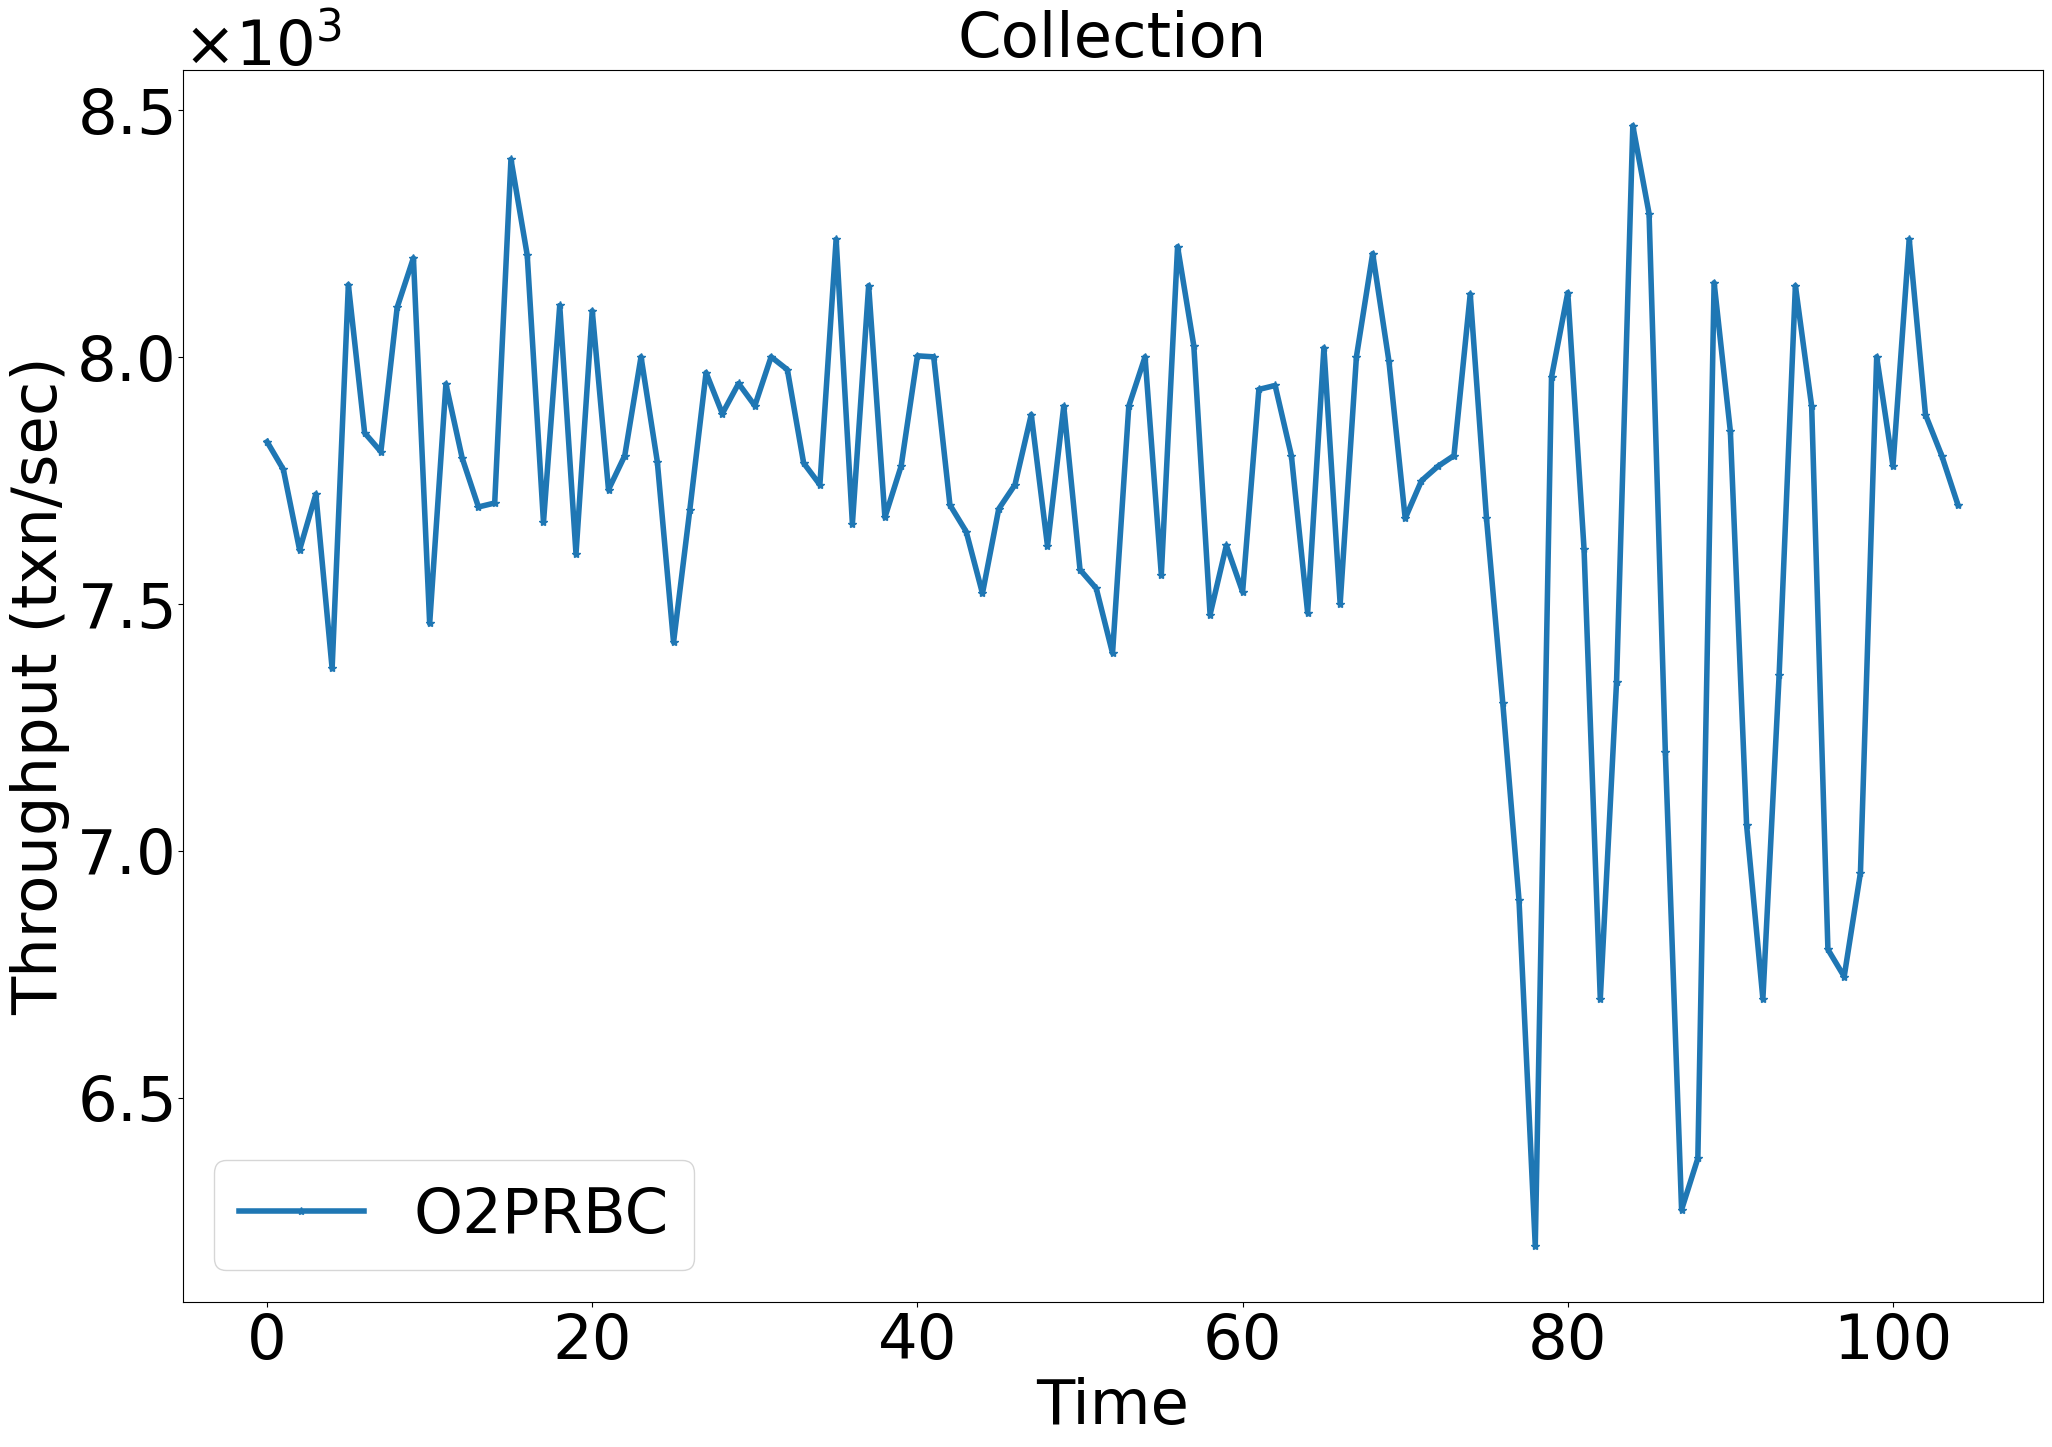

<Figure size 640x480 with 0 Axes>

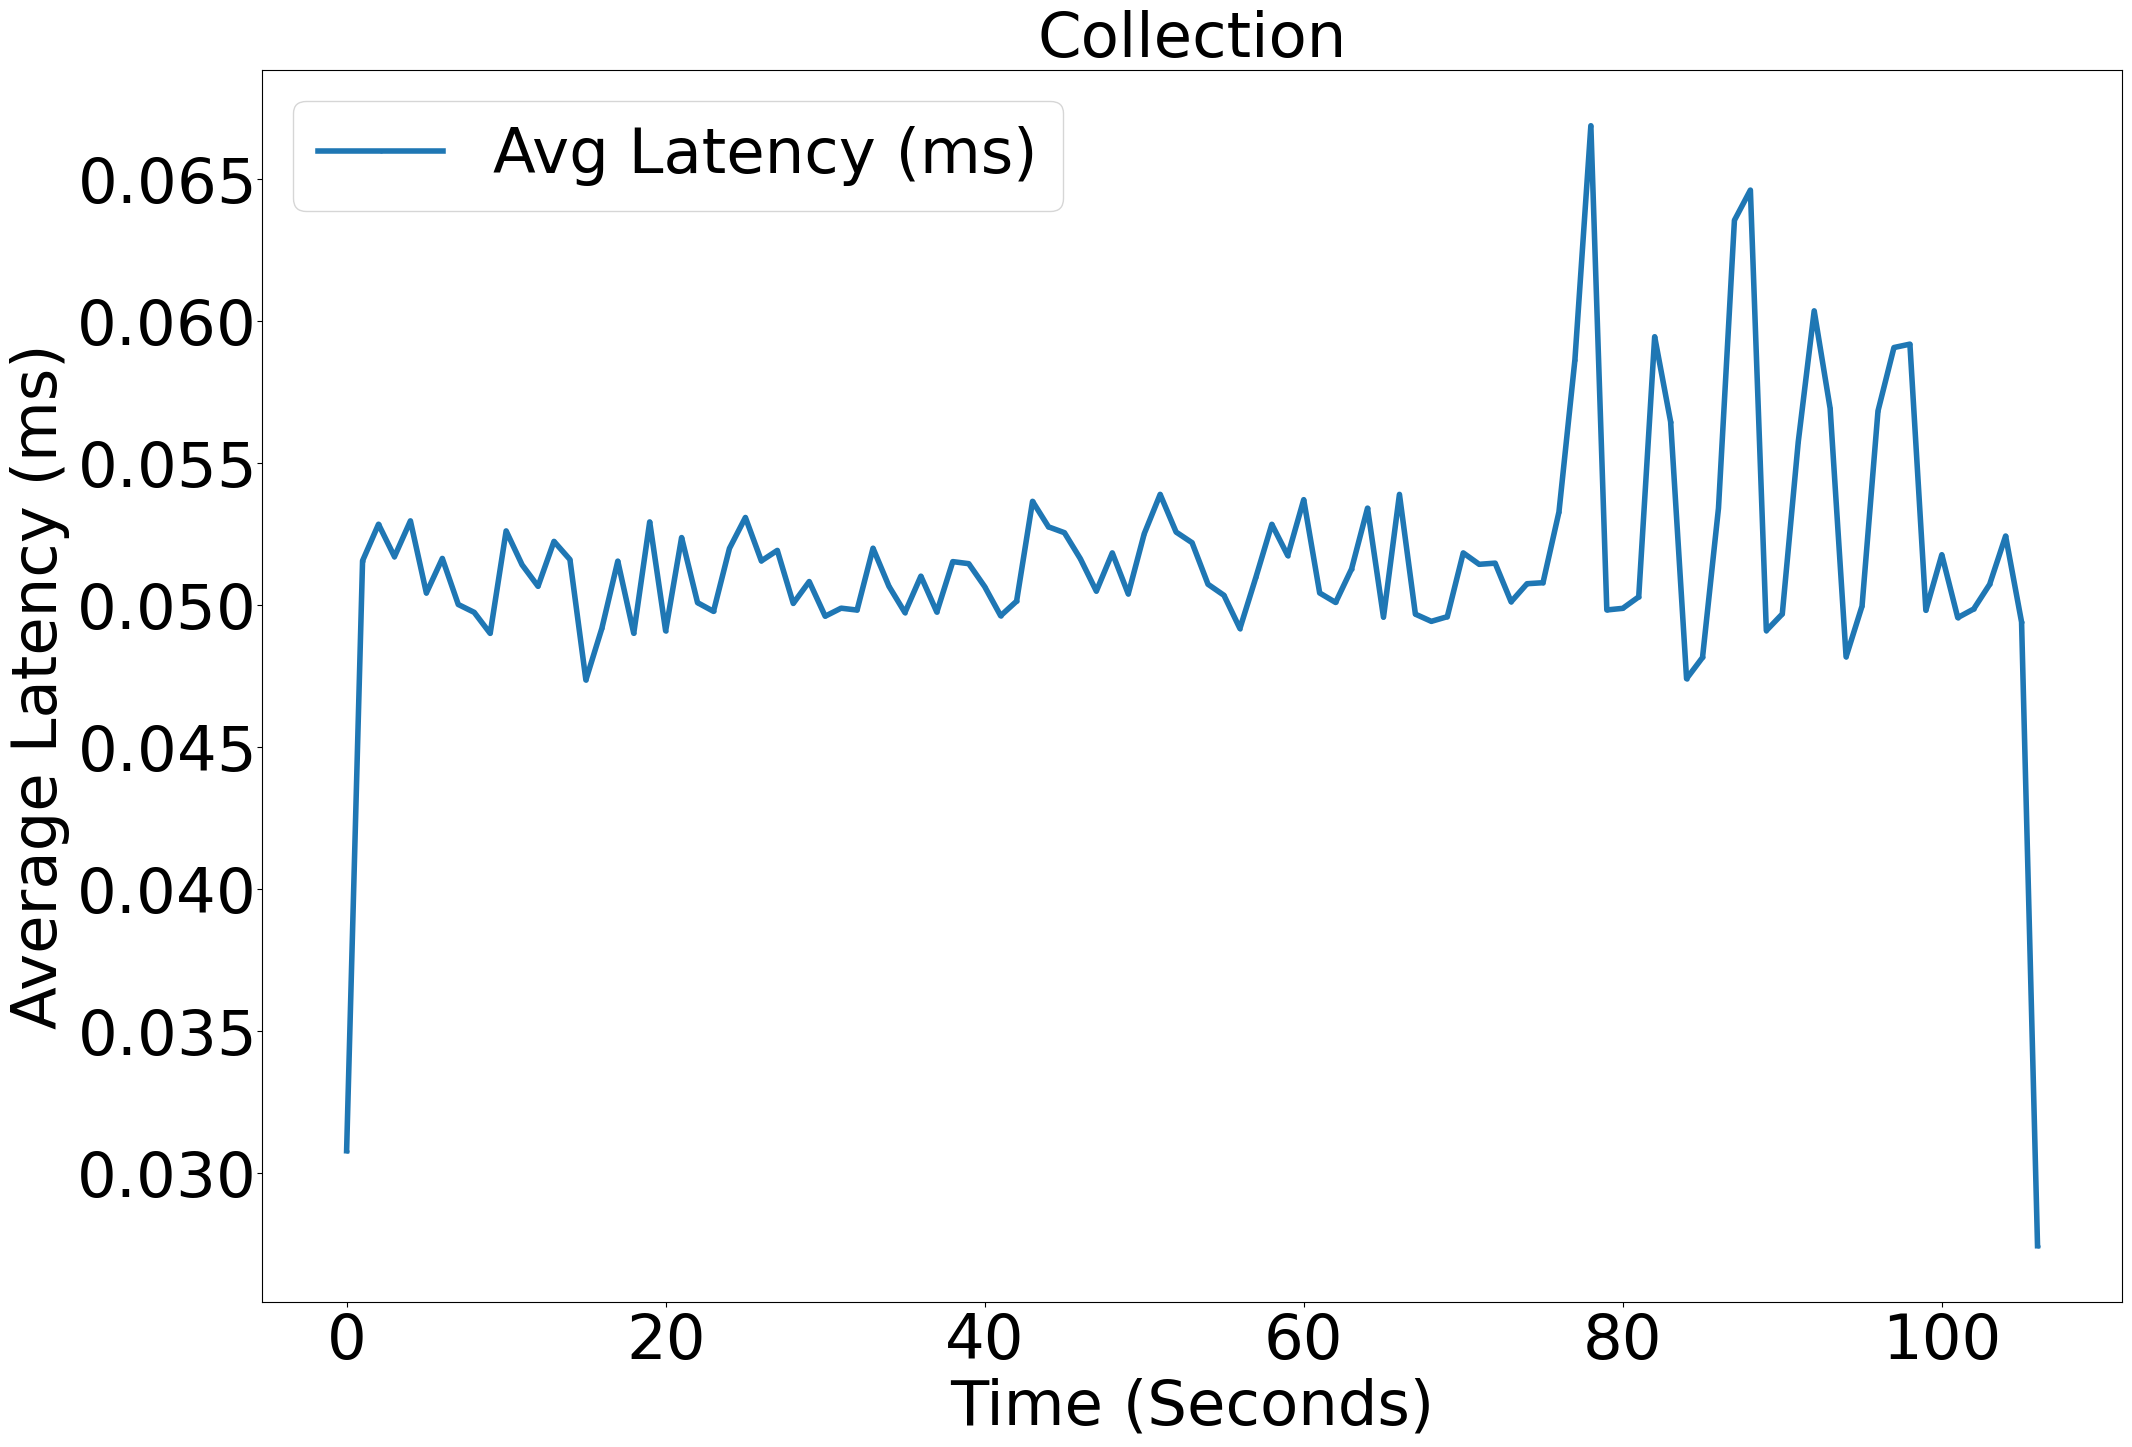

7595.145454545454 0.052826954495155724
../../Experiments/O2PRBC_b100_16node
7372.0
folder is  O2PRBC_b100_16node


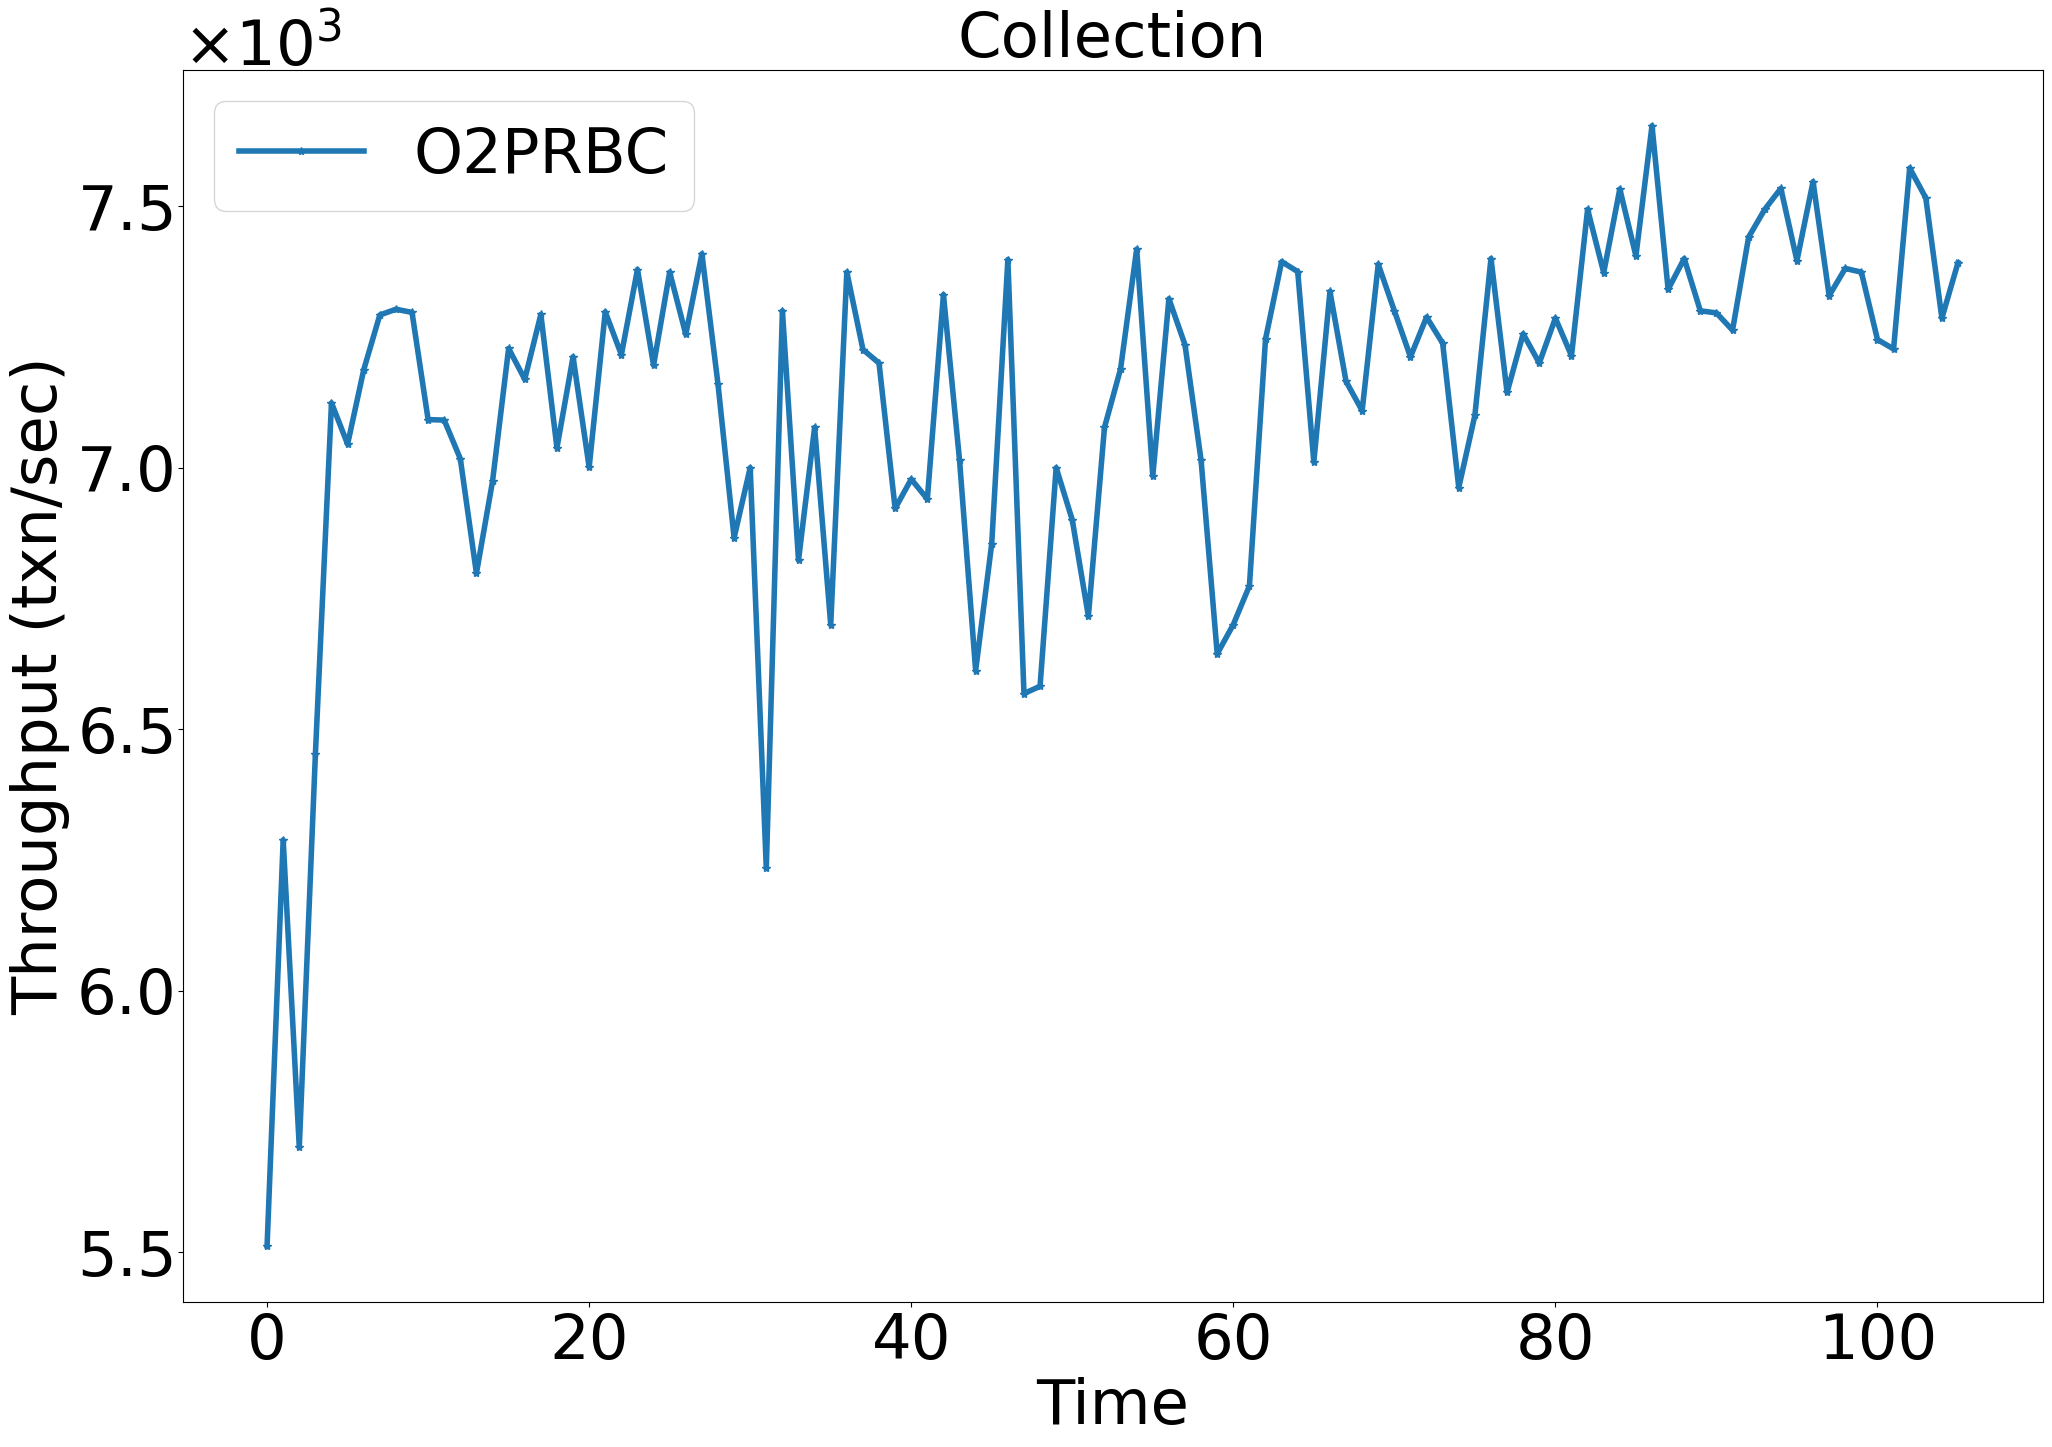

<Figure size 640x480 with 0 Axes>

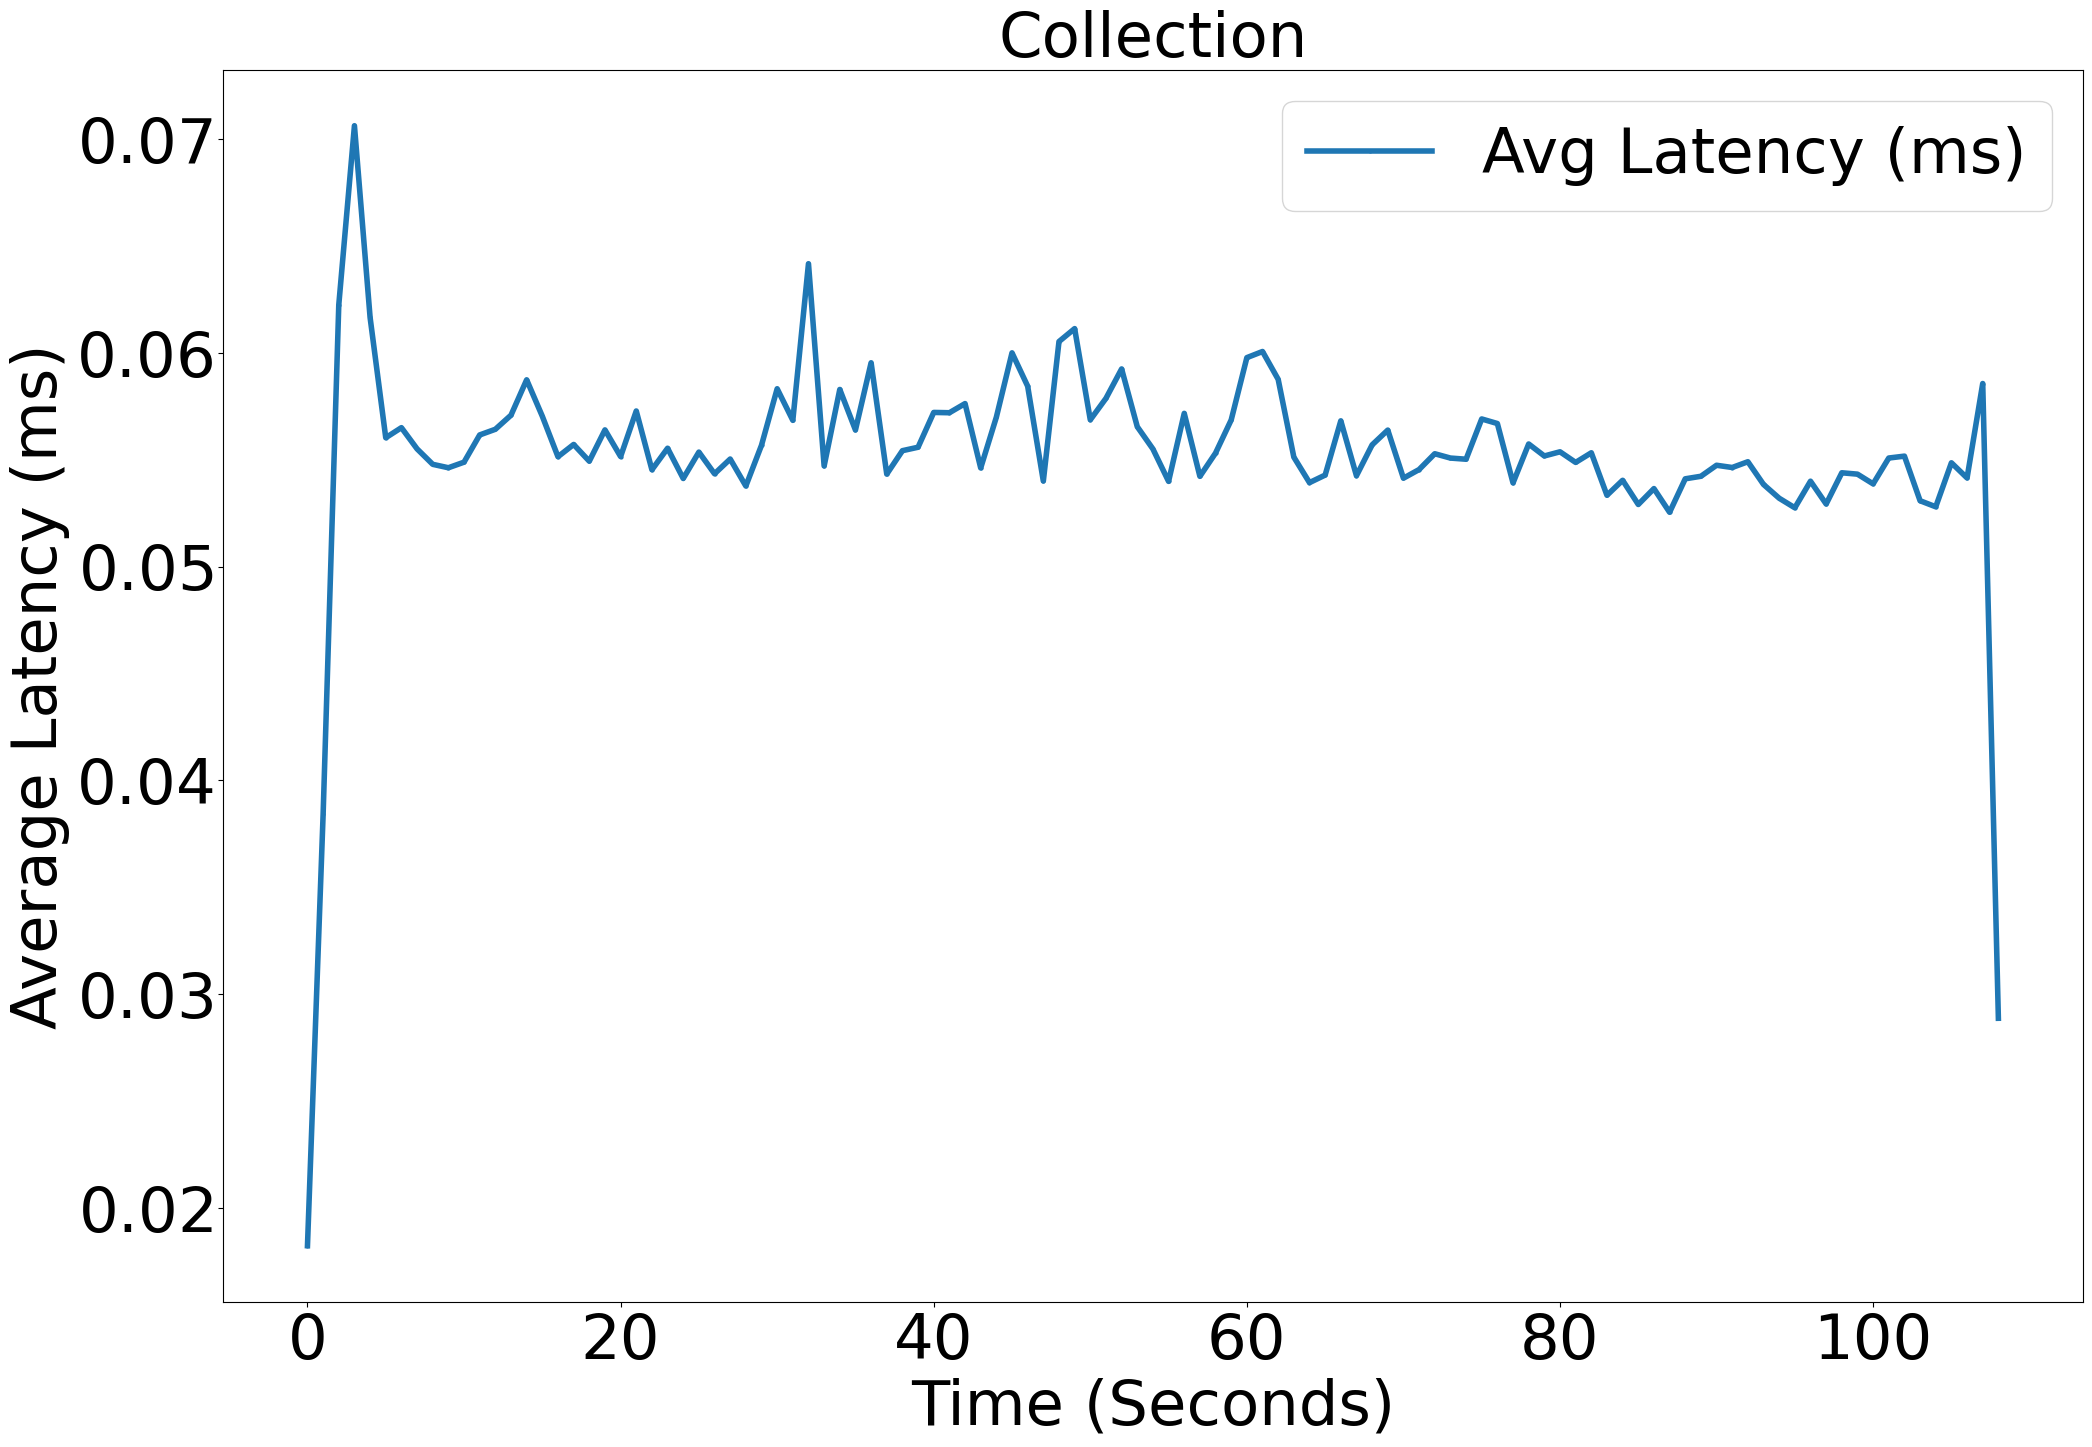

7217.236363636363 0.055271371776983325


In [13]:
for folder in os.listdir('../../../Experiments/'):
    if   'O2PRBC_b' in folder:
        
        
        
        experiment = '../../Experiments/' + folder 
        print(experiment)
        X,Y, lats, temp, Times = getThroughput(experiment)



#         cluster_number = 

        # Y = Y * cluster_number

        lats

        np.sum(Y)

        s1, s2 = X[:-2],Y[:-2]

        print(np.average(s2[-30:-5]))
        np.average(lats[-33:-3])

        len(lats)

        2*18923.433333333334


        experiment = folder
        print('folder is ', folder)

        if not os.path.exists('../../../Experiments/'+experiment):
            os.mkdir('../../../Experiments/'+experiment)


        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        fig.patch.set_facecolor('white')
        pl.plot(s1,s2, '-*', label = 'O2PRBC', linewidth = 4)
        ax.yaxis.set_major_formatter(formatter)

        pl.legend()
        pl.xlabel('Time')
        pl.ylabel('Throughput (txn/sec)')
        pl.title('Collection')

#         pl.ylim(8000,14000)
        pl.savefig('/home/tejas/Desktop/O2PRBC/collectthputsV2.png', dpi = 150, bbox_inches='tight' )
        pl.show()
        pl.clf()


        int_times = Times.astype(int)

        # Find the range of seconds
        min_time, max_time = int_times.min(), int_times.max()
        num_seconds = max_time - min_time + 1

        # Compute sum of latencies per second
        latency_sums = np.bincount(int_times - min_time, weights=lats, minlength=num_seconds)

        # Compute count per second
        counts = np.bincount(int_times - min_time, minlength=num_seconds)

        # Avoid division by zero and compute average latency per second
        avg_latency_per_sec = np.divide(latency_sums, counts, where=(counts > 0))

        # Generate second timestamps
        seconds = np.arange(min_time, max_time + 1)
        seconds = seconds - seconds[0]
        # Plot the results
        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        pl.plot(seconds, avg_latency_per_sec, marker='o', linestyle='-', markersize=2, \
                label="Avg Latency (ms)", linewidth = 4)
        
        ax.yaxis.set_major_formatter(formatter)

        pl.xlabel("Time (Seconds)")
        pl.ylabel("Average Latency (ms)")
#         pl.ylim(0,0.02)
        pl.title('Collection')
        pl.legend()
#         pl.savefig('/home/tejas/Desktop/O2PRBC/collectlatsV2.png', dpi = 150, bbox_inches='tight' )

        pl.show()
    
        print(np.average(s2[-60:-5]), np.average(avg_latency_per_sec[-60:-5]))
    

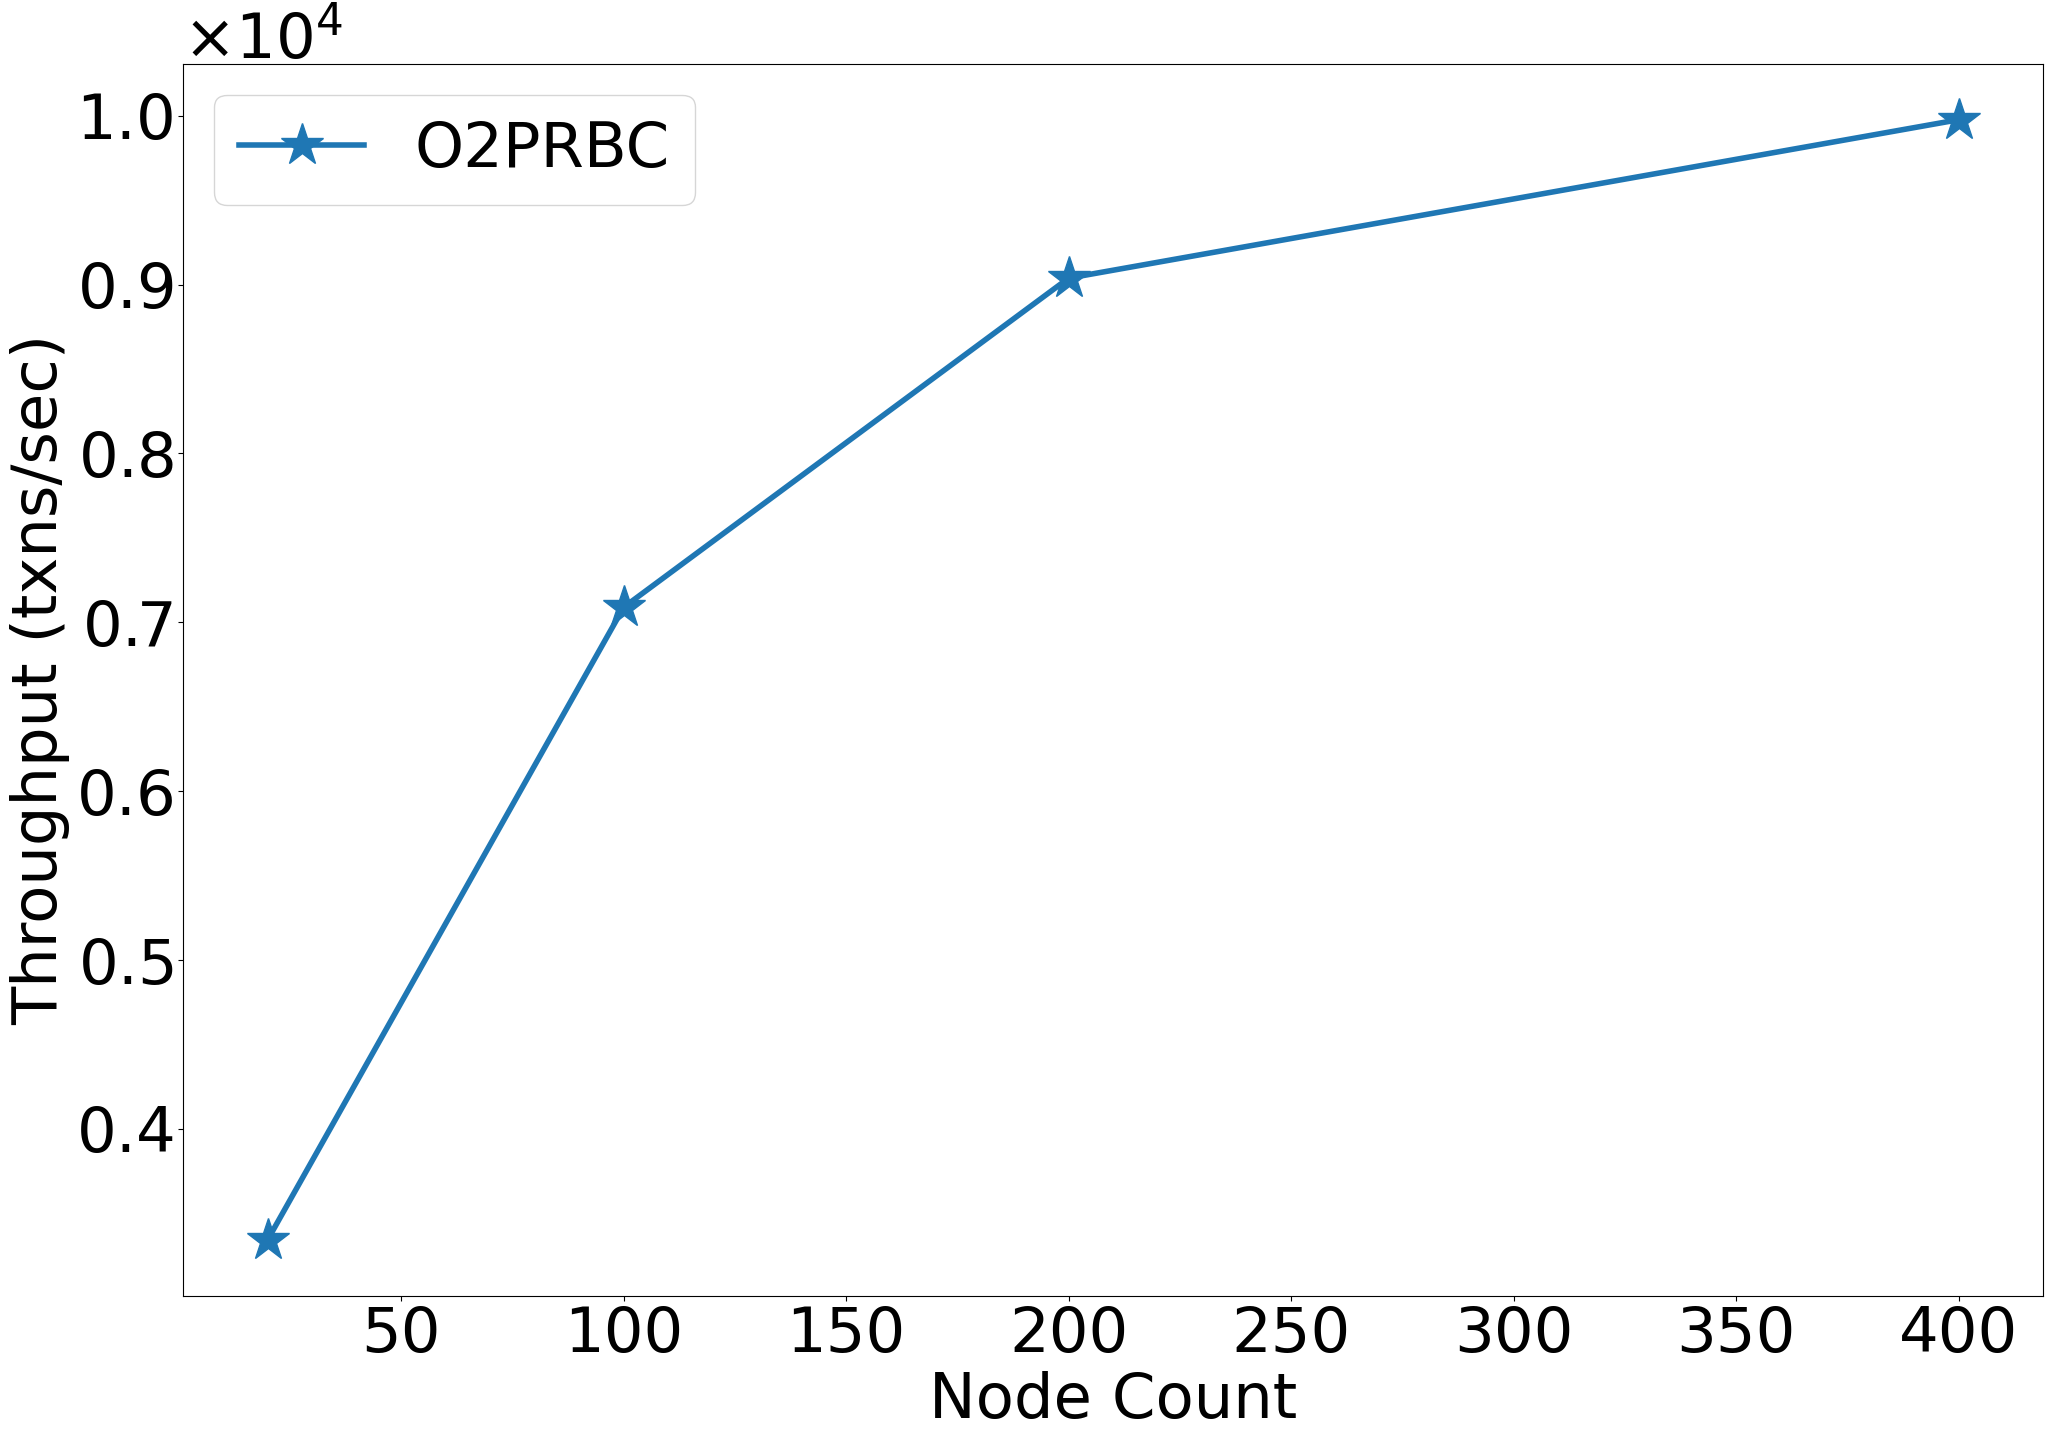

<Figure size 640x480 with 0 Axes>

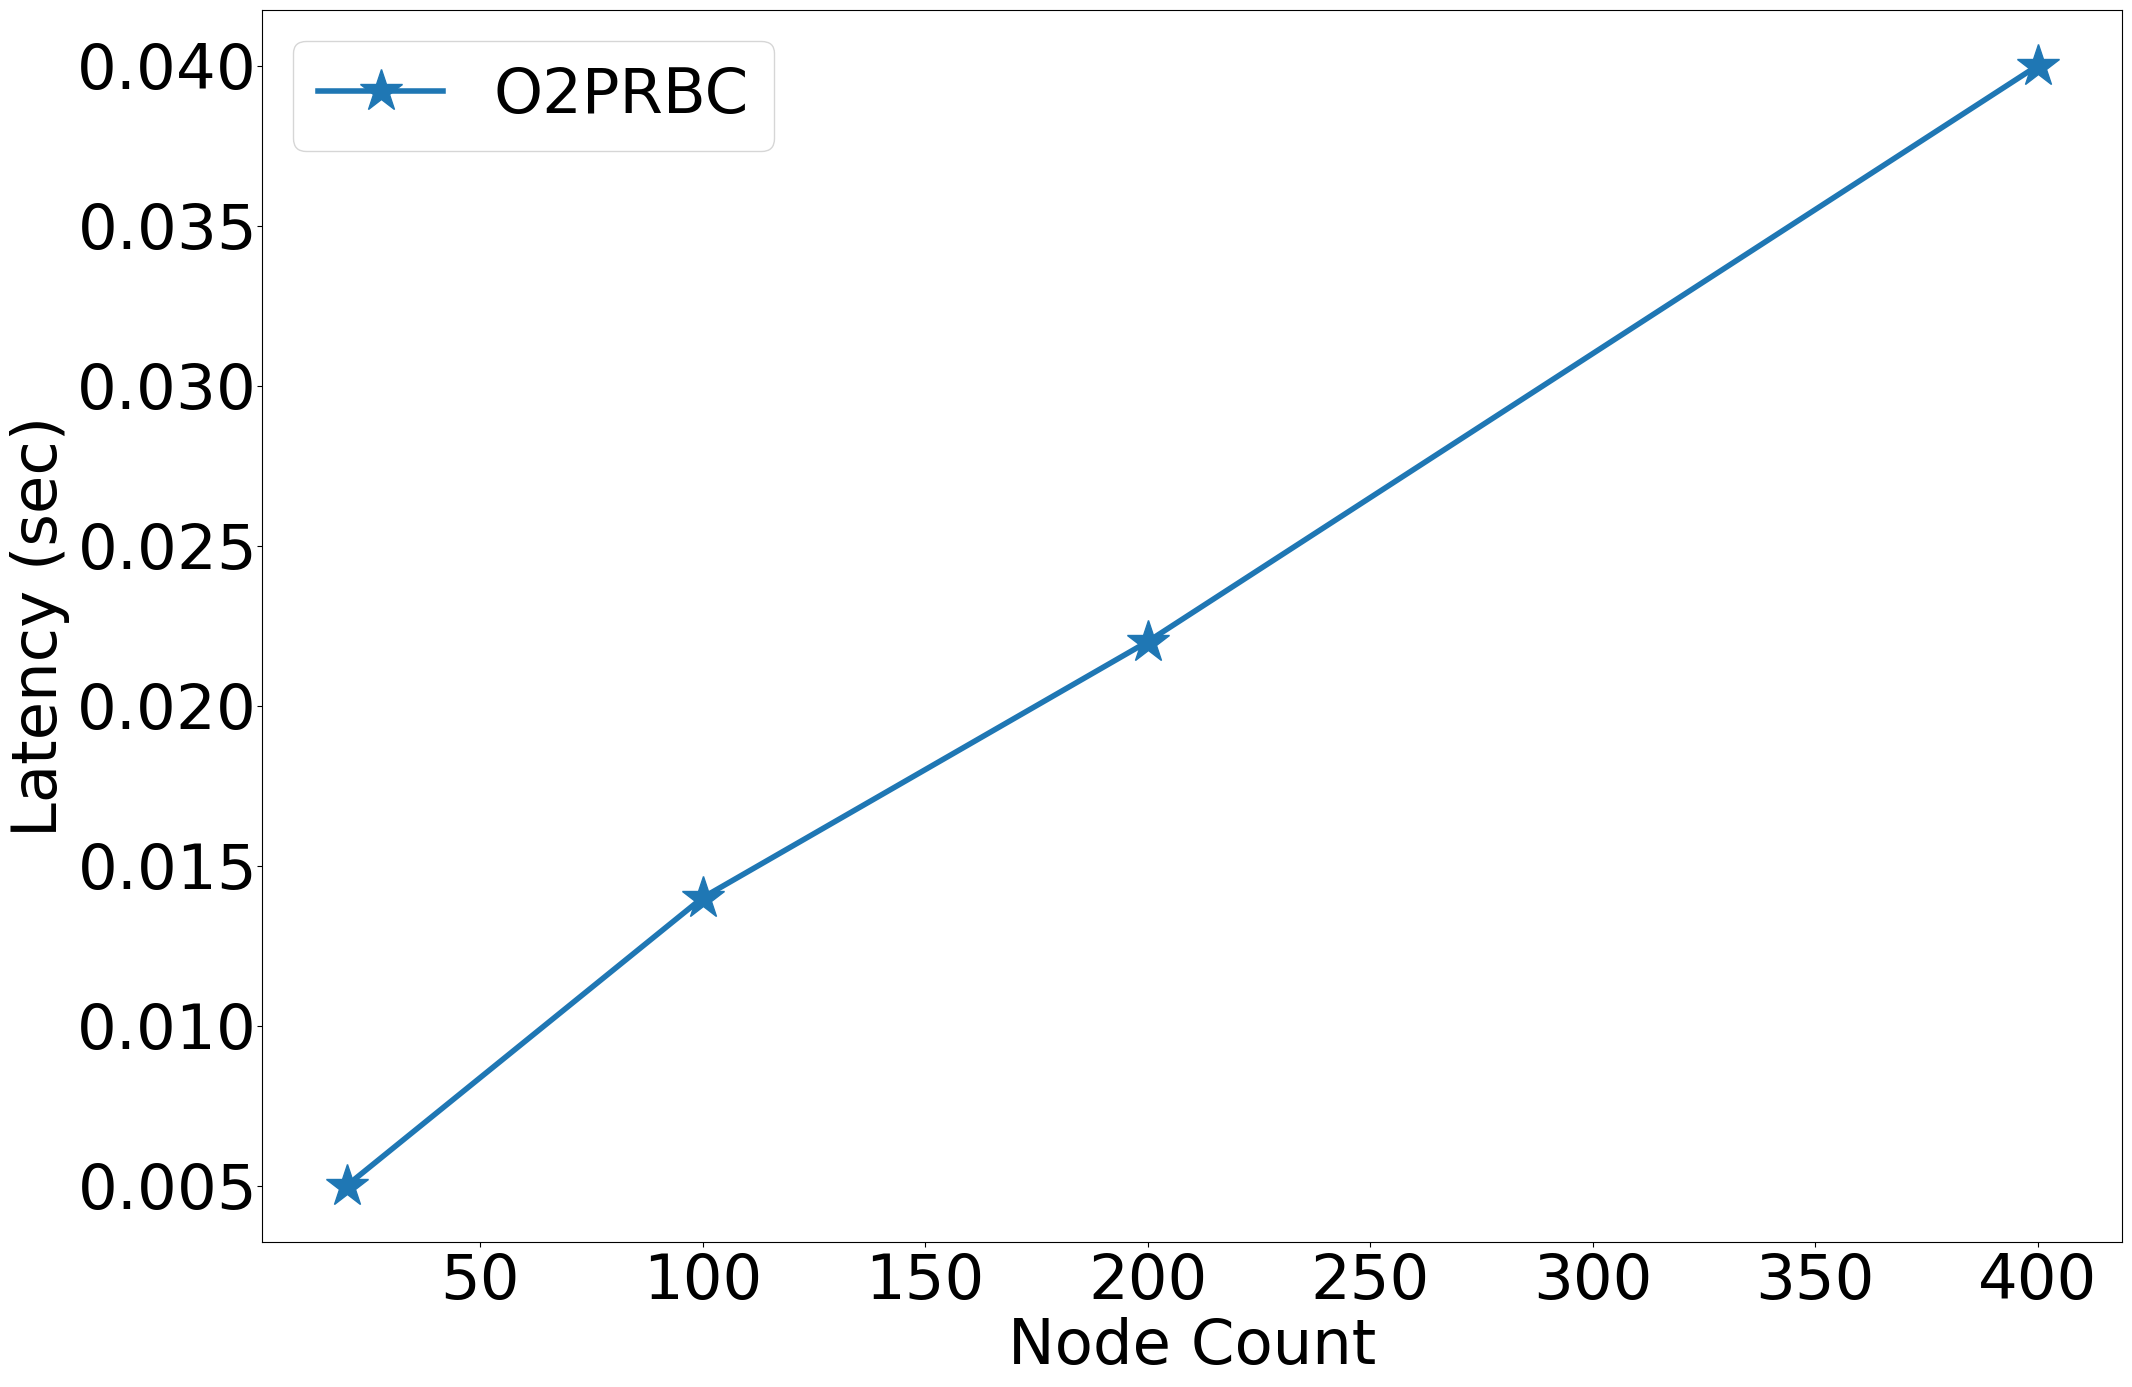

<Figure size 640x480 with 0 Axes>

In [8]:
batch_sizes = [20, 100, 200, 400]
thputs = [3344,7089,9038, 9976]
lats = [0.005,0.014, 0.022, 0.04]

fig,ax = pl.subplots(figsize = (24, 16))
pl.plot(batch_sizes, thputs, '-*', linewidth = 4, markersize = 32, label = 'O2PRBC')

ax.yaxis.set_major_formatter(formatter)
pl.ylabel('Throughput (txns/sec)')
pl.xlabel('Node Count')
pl.legend()

pl.savefig('/home/tejas/Desktop/O2PRBC/thputs_vs_batchsize.pdf', dpi = 150, bbox_inches='tight')
pl.show()
pl.clf()



fig,ax = pl.subplots(figsize = (24, 16))
pl.plot(batch_sizes, lats, '-*', linewidth = 4, markersize = 32, label = 'O2PRBC')

ax.yaxis.set_major_formatter(formatter)
pl.ylabel('Latency (sec)')
pl.xlabel('Node Count')
pl.legend()
pl.savefig('/home/tejas/Desktop/O2PRBC/lats_vs_batchsize.pdf', dpi = 150, bbox_inches='tight')

pl.show()
pl.clf()



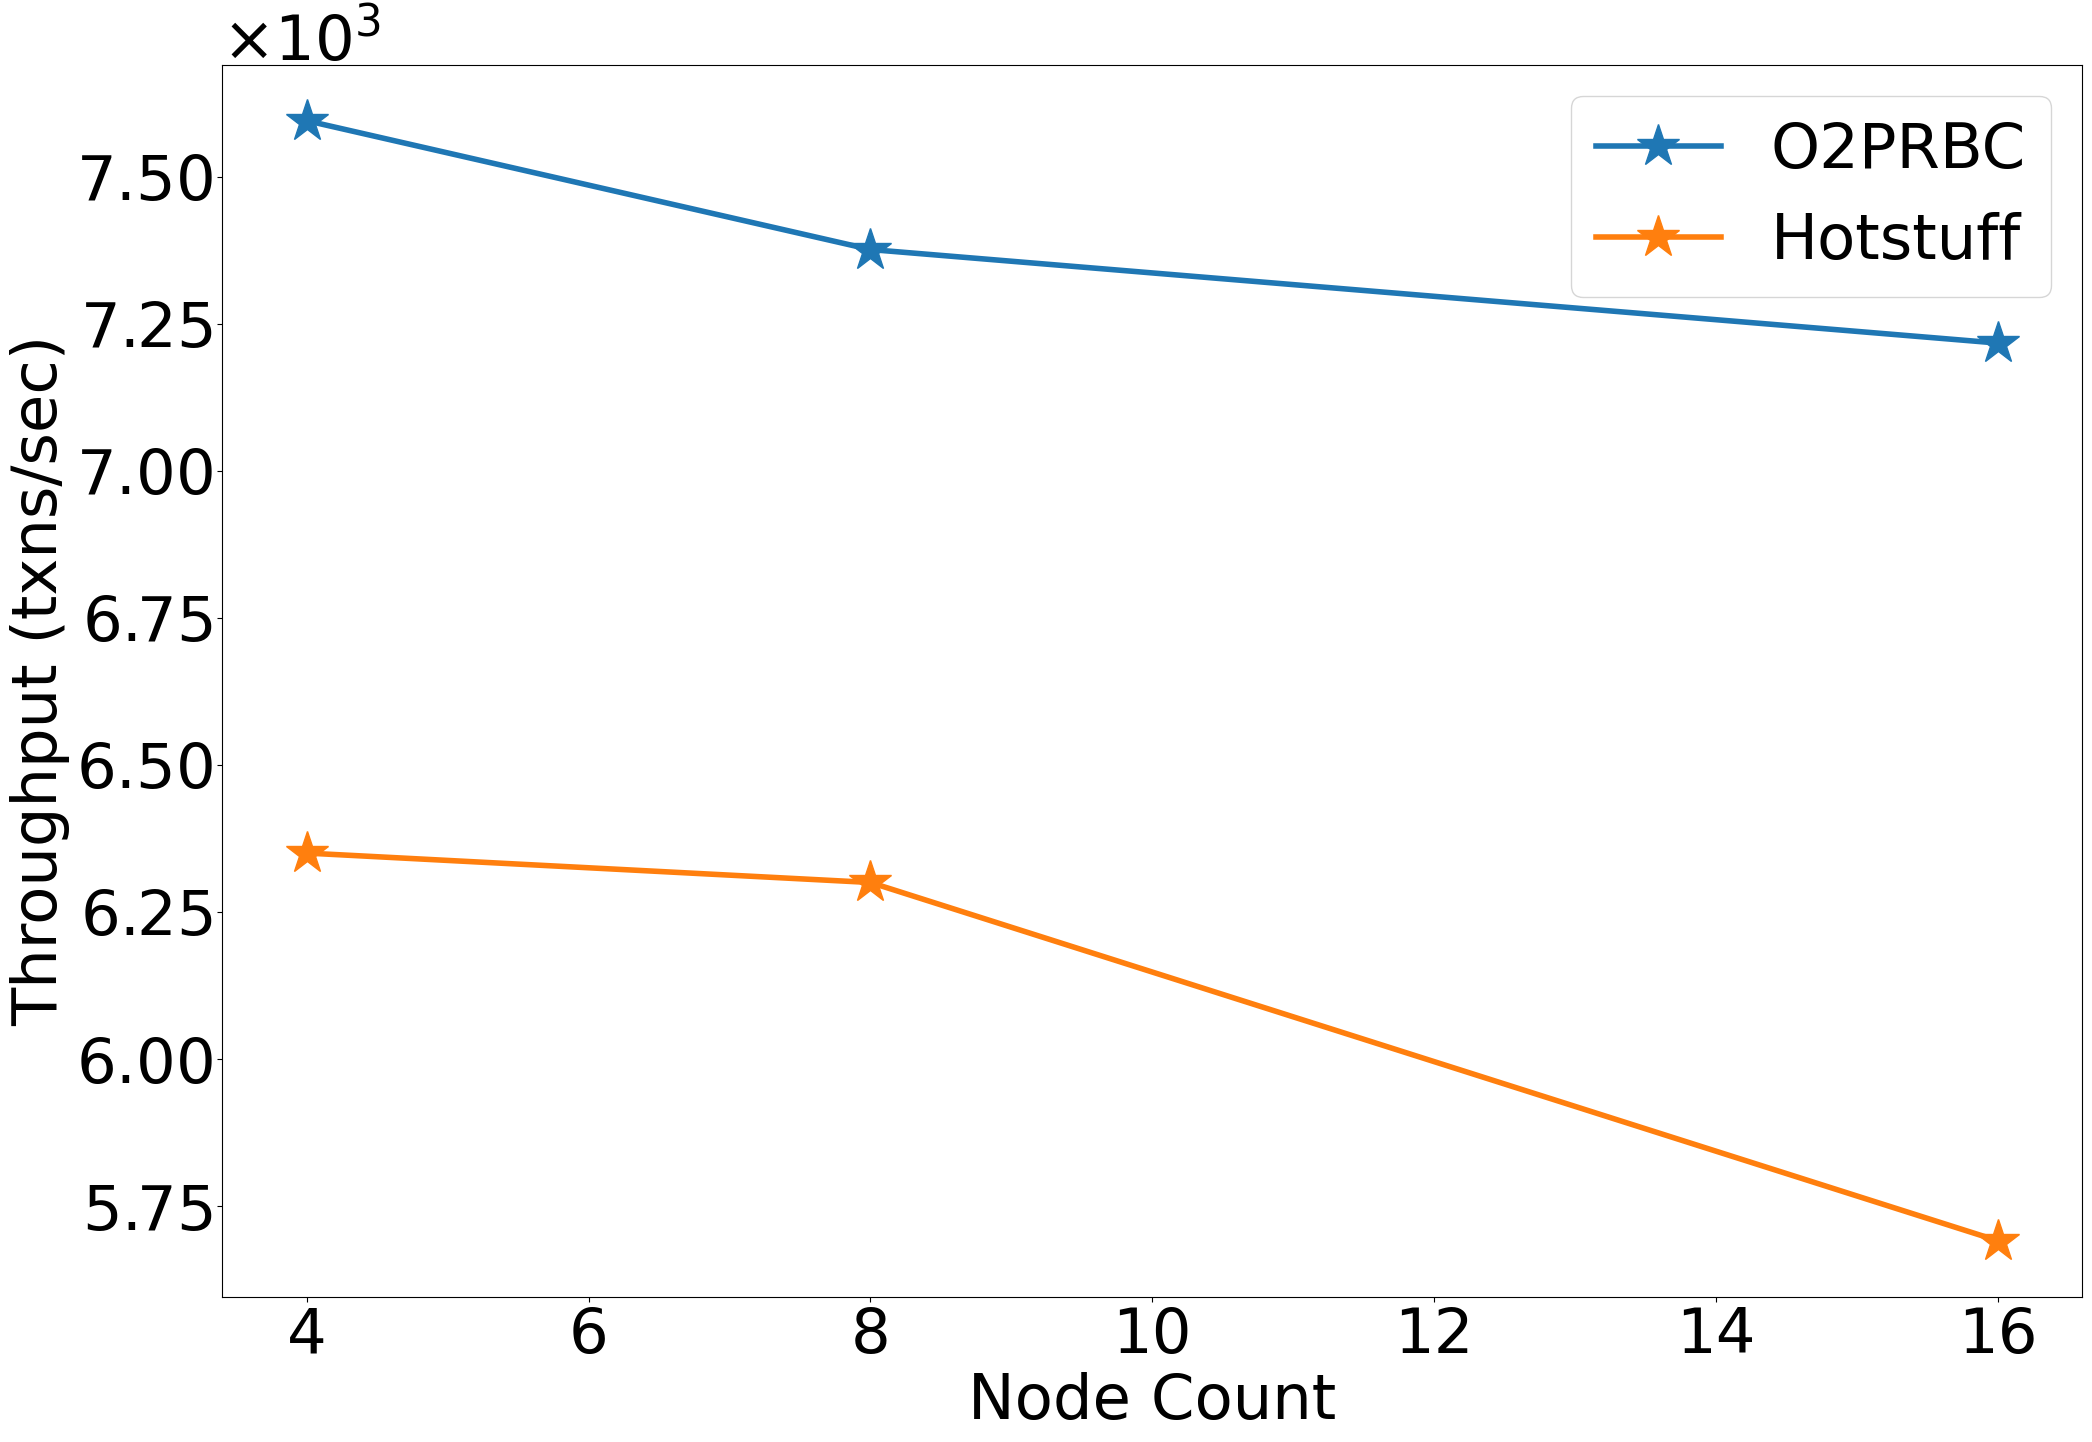

<Figure size 640x480 with 0 Axes>

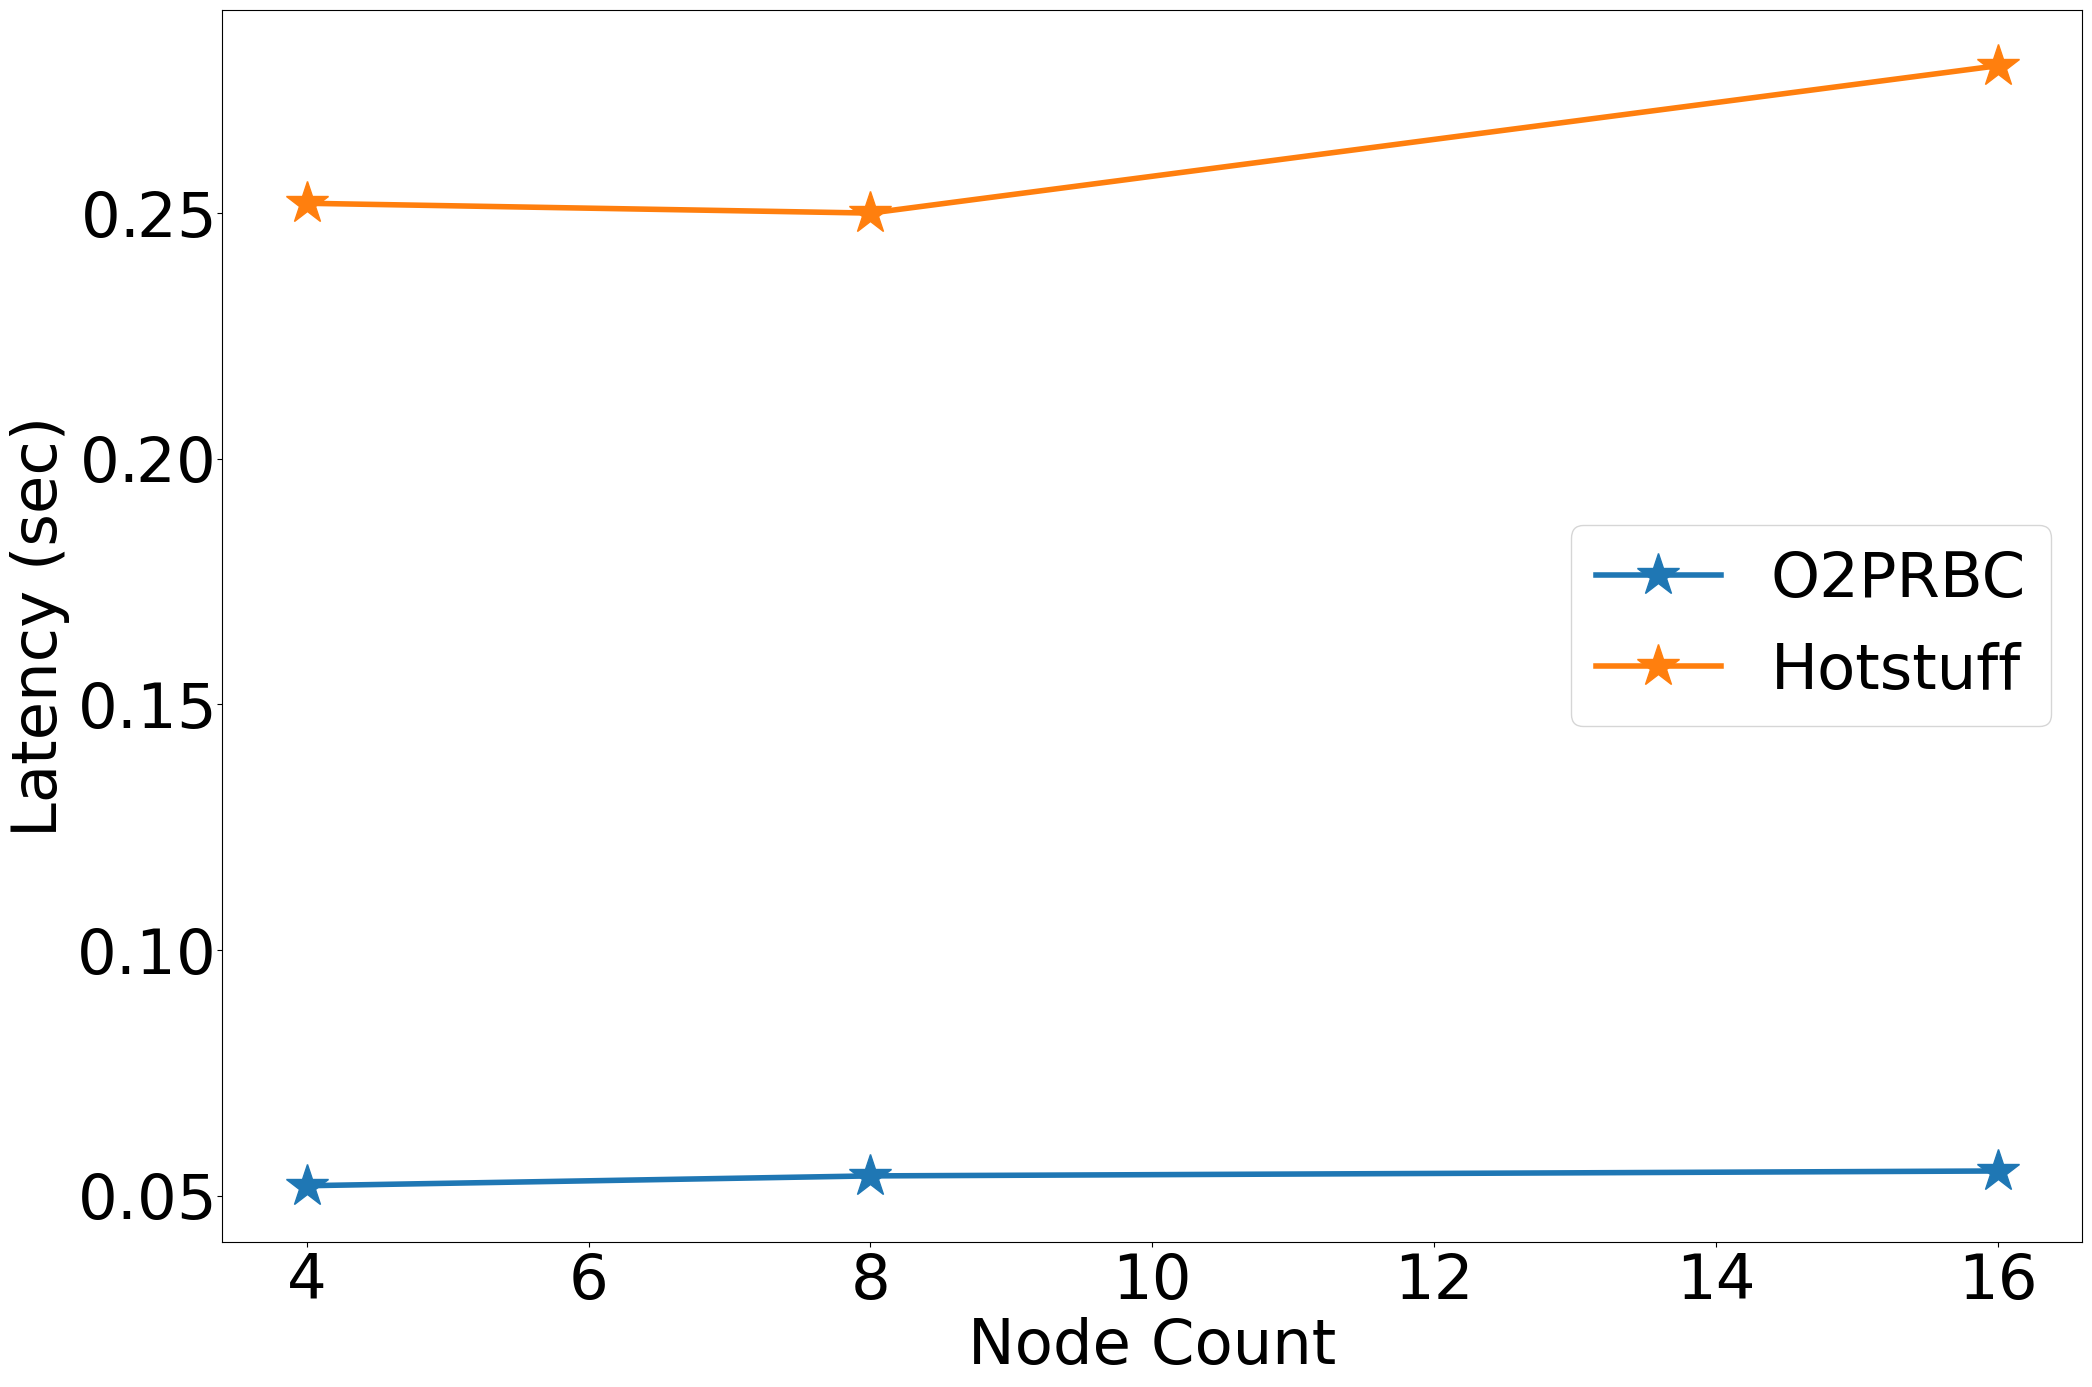

<Figure size 640x480 with 0 Axes>

In [15]:
node_count = [4, 8, 16]
thputs = [7595,7376,7217]
lats = [0.052,0.054, 0.055]
node_count_ho = [4,8, 16]
thputs_ho = [6350,6300, 5691]
lats_ho = [0.252, 0.25, 0.28]

fig,ax = pl.subplots(figsize = (24, 16))
pl.plot(node_count, thputs, '-*', linewidth = 4, markersize = 32, label = 'O2PRBC')
pl.plot(node_count_ho, thputs_ho, '-*', linewidth = 4, markersize = 32, label = 'Hotstuff')

ax.yaxis.set_major_formatter(formatter)
pl.ylabel('Throughput (txns/sec)')
pl.xlabel('Node Count')
pl.legend()

pl.savefig('/home/tejas/Desktop/O2PRBC/thputs_vs_nodecount.pdf', dpi = 150, bbox_inches='tight')
pl.show()
pl.clf()



fig,ax = pl.subplots(figsize = (24, 16))
pl.plot(node_count, lats, '-*', linewidth = 4, markersize = 32, label = 'O2PRBC')
pl.plot(node_count_ho, lats_ho, '-*', linewidth = 4, markersize = 32, label = 'Hotstuff')

ax.yaxis.set_major_formatter(formatter)
pl.ylabel('Latency (sec)')
pl.xlabel('Node Count')
pl.legend()
pl.savefig('/home/tejas/Desktop/O2PRBC/lats_vs_nodecount.pdf', dpi = 150, bbox_inches='tight')

pl.show()
pl.clf()



../../Experiments/O2PRBC_single_collect_test


/tmp/ipykernel_7093/2425067424.py:63: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Times = np.array(Times)[sorted_indices.astype(np.int)]
/tmp/ipykernel_7093/2425067424.py:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depre

10860.6
folder is  O2PRBC_single_collect_test


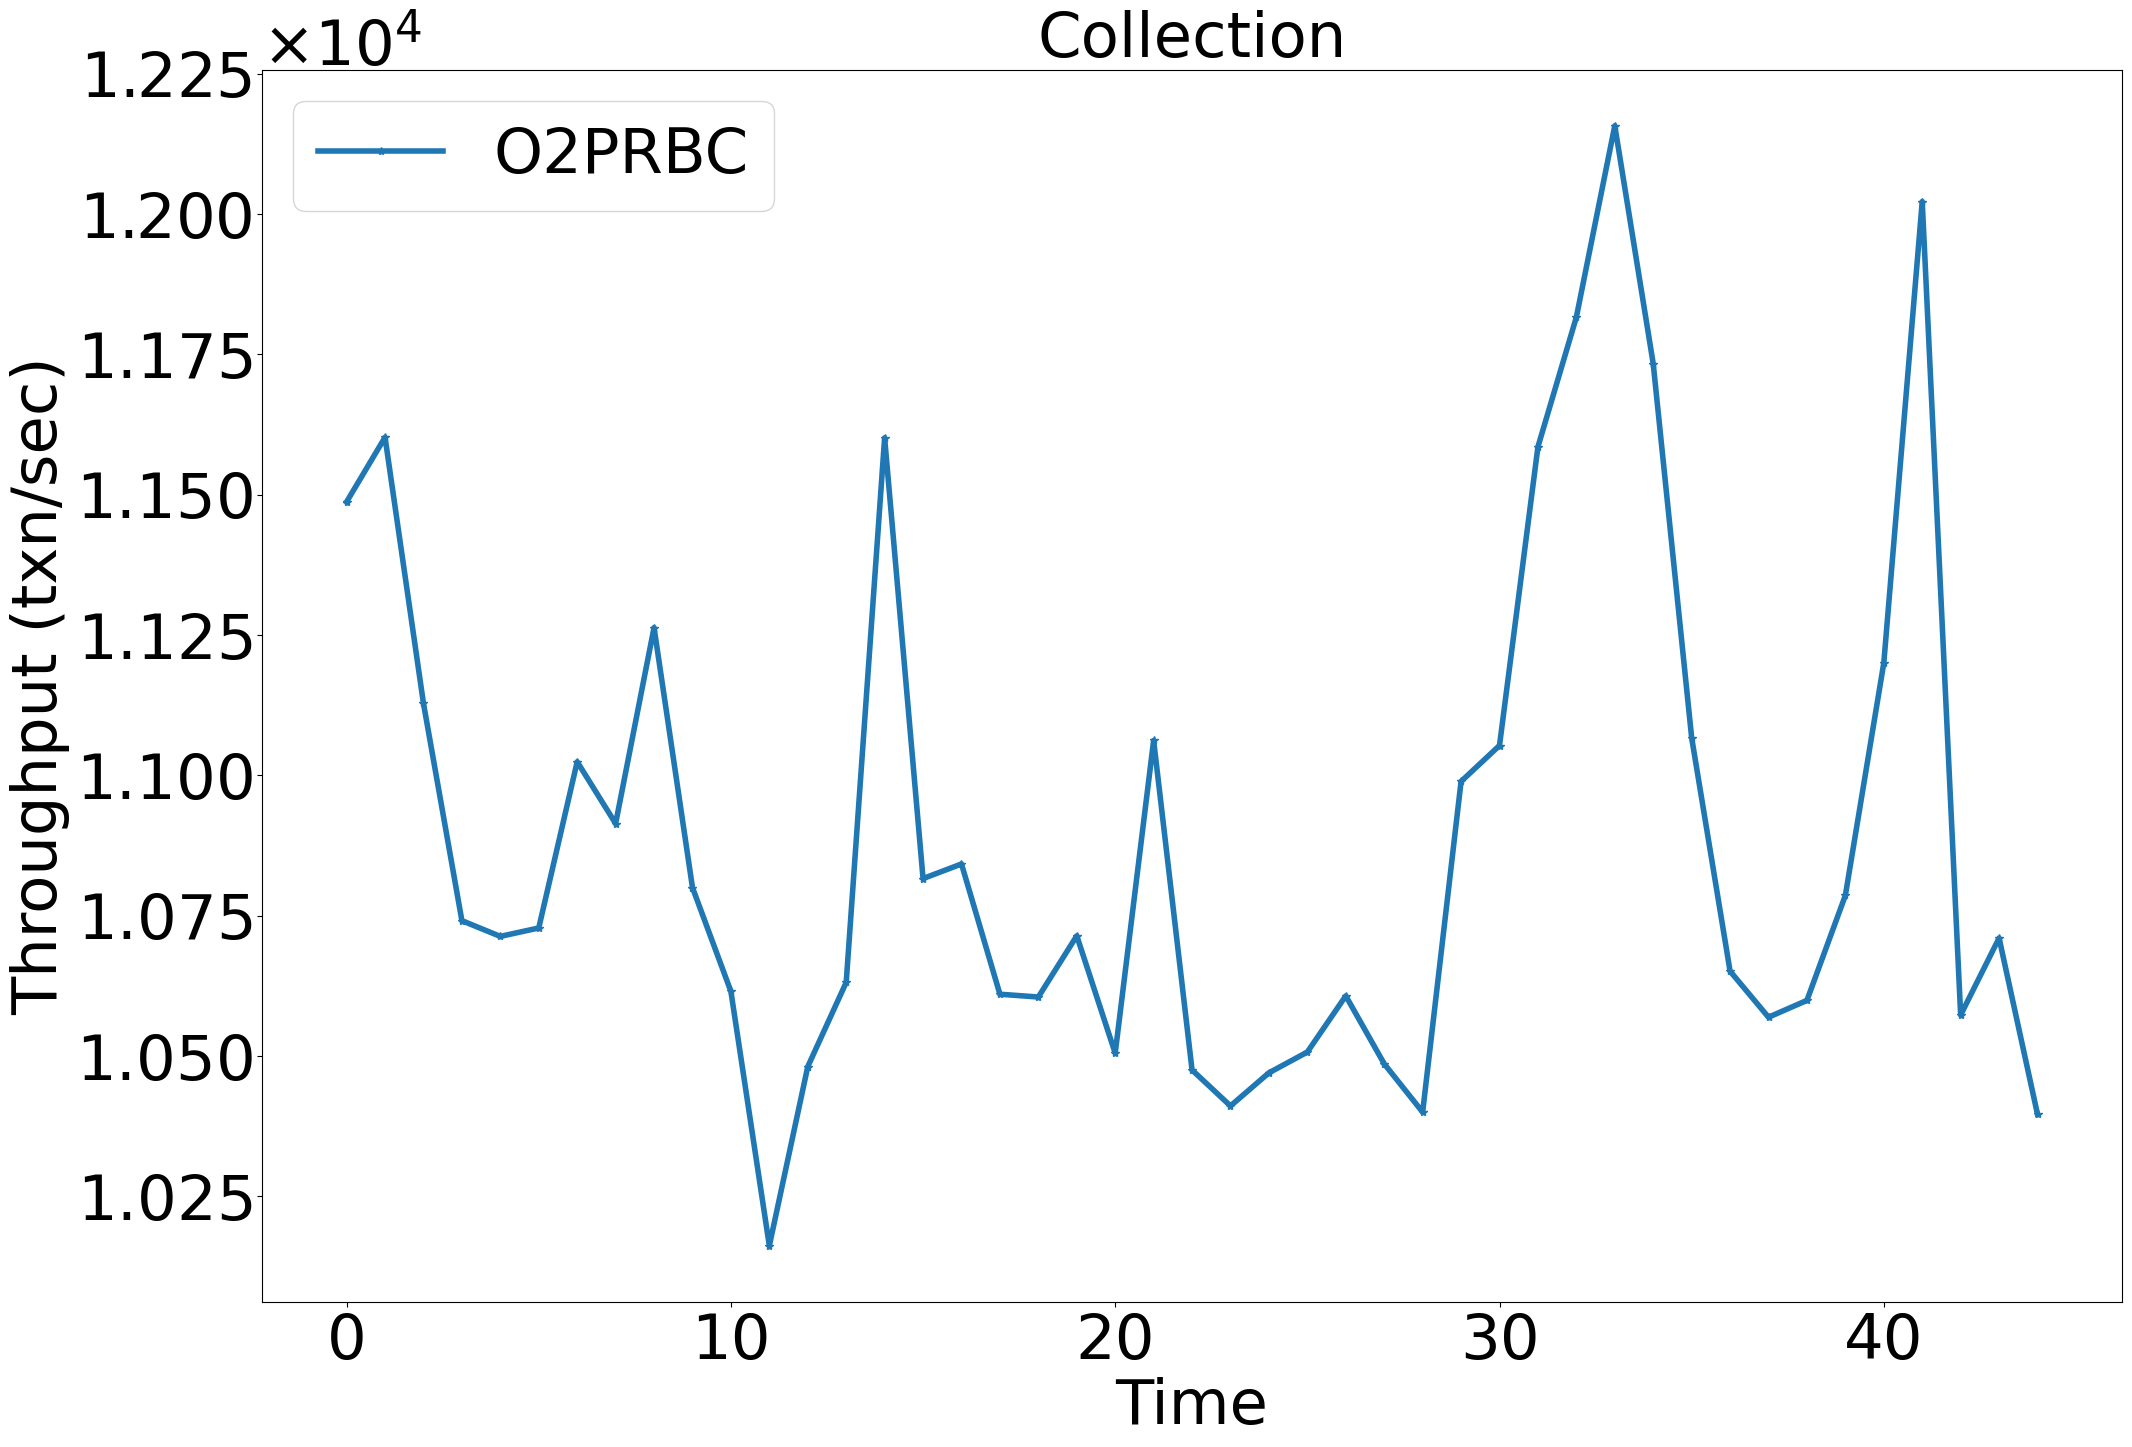

<Figure size 640x480 with 0 Axes>

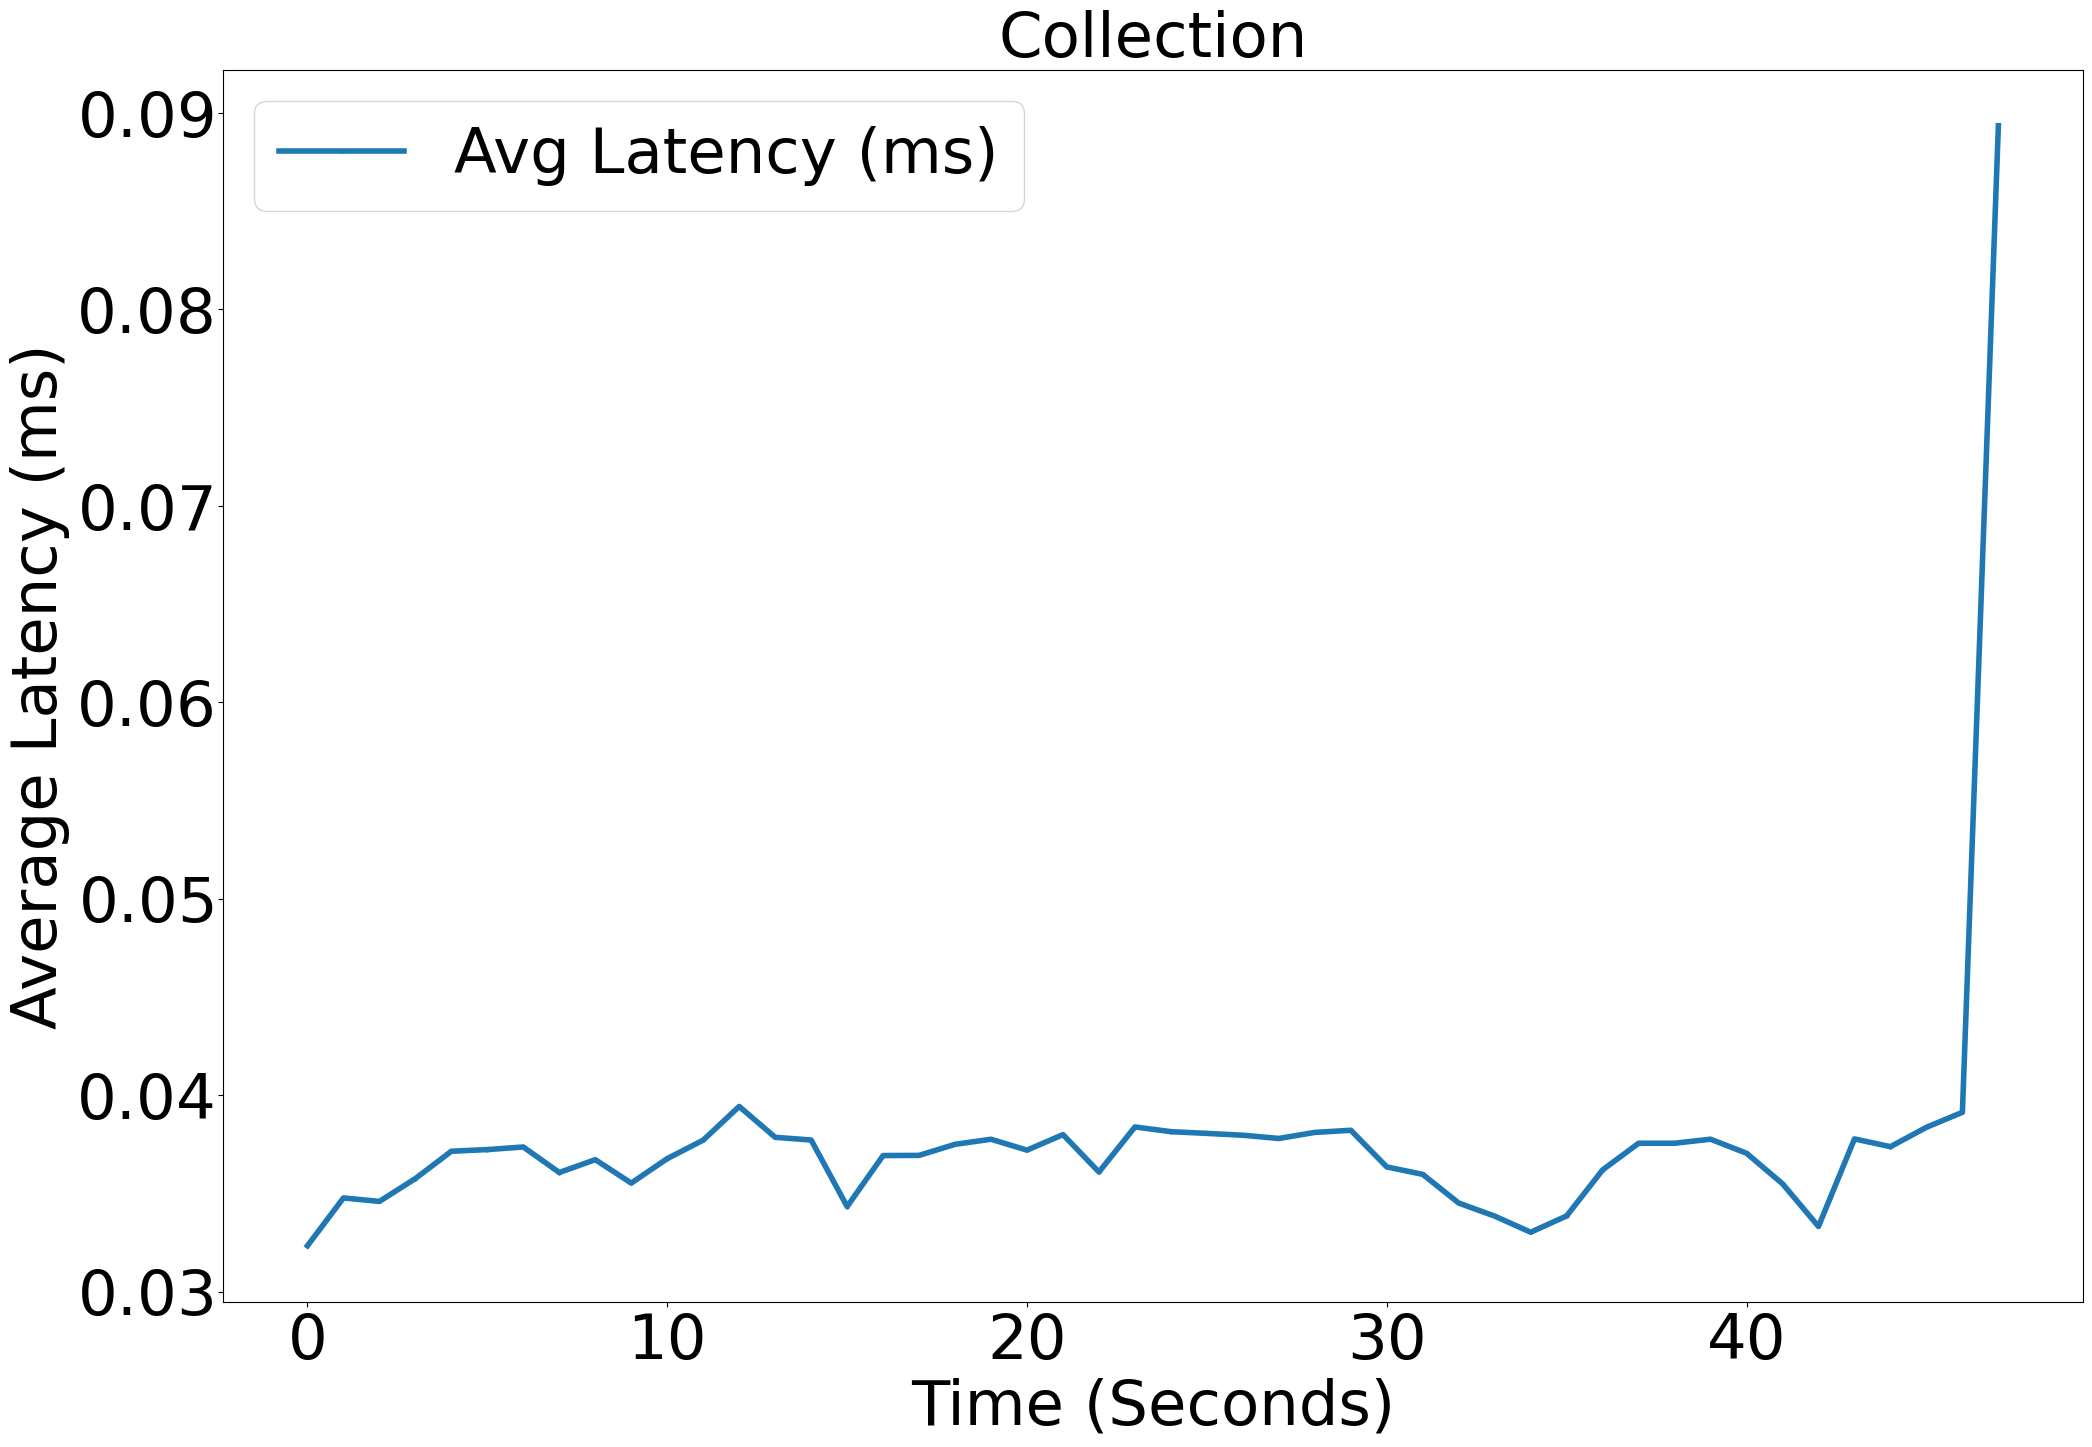

10885.125 0.03652920142639125


In [16]:
for folder in os.listdir('../../../Experiments/'):
    if   'O2PRBC_single_collect_test' in folder:
        
        
        
        experiment = '../../Experiments/' + folder 
        print(experiment)
        X,Y, lats, temp, Times = getThroughput(experiment)



#         cluster_number = 

        # Y = Y * cluster_number

        lats

        np.sum(Y)

        s1, s2 = X[:-2],Y[:-2]

        print(np.average(s2[-30:-5]))
        np.average(lats[-33:-3])

        len(lats)

        2*18923.433333333334


        experiment = folder
        print('folder is ', folder)

        if not os.path.exists('../../../Experiments/'+experiment):
            os.mkdir('../../../Experiments/'+experiment)


        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        fig.patch.set_facecolor('white')
        pl.plot(s1,s2, '-*', label = 'O2PRBC', linewidth = 4)
        ax.yaxis.set_major_formatter(formatter)

        pl.legend()
        pl.xlabel('Time')
        pl.ylabel('Throughput (txn/sec)')
        pl.title('Collection')

#         pl.ylim(8000,14000)
        pl.savefig('/home/tejas/Desktop/O2PRBC/collectthputsV2.png', dpi = 150, bbox_inches='tight' )
        pl.show()
        pl.clf()


        int_times = Times.astype(int)

        # Find the range of seconds
        min_time, max_time = int_times.min(), int_times.max()
        num_seconds = max_time - min_time + 1

        # Compute sum of latencies per second
        latency_sums = np.bincount(int_times - min_time, weights=lats, minlength=num_seconds)

        # Compute count per second
        counts = np.bincount(int_times - min_time, minlength=num_seconds)

        # Avoid division by zero and compute average latency per second
        avg_latency_per_sec = np.divide(latency_sums, counts, where=(counts > 0))

        # Generate second timestamps
        seconds = np.arange(min_time, max_time + 1)
        seconds = seconds - seconds[0]
        # Plot the results
        fig,ax = pl.subplots(figsize = (24, 16))
        fig.patch.set_facecolor('white')
        pl.plot(seconds, avg_latency_per_sec, marker='o', linestyle='-', markersize=2, \
                label="Avg Latency (ms)", linewidth = 4)
        
        ax.yaxis.set_major_formatter(formatter)

        pl.xlabel("Time (Seconds)")
        pl.ylabel("Average Latency (ms)")
#         pl.ylim(0,0.02)
        pl.title('Collection')
        pl.legend()
#         pl.savefig('/home/tejas/Desktop/O2PRBC/collectlatsV2.png', dpi = 150, bbox_inches='tight' )

        pl.show()
    
        print(np.average(s2[-60:-5]), np.average(avg_latency_per_sec[-60:-5]))
    